In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import Normalizer
from datetime import datetime
plt.rcParams["figure.figsize"] = (12, 7)
plt.rcParams.update({'font.size': 16})

In [2]:
# read clean dataset
df = pd.read_csv("1963_2019_new.csv")
display(df)

date  permno  sic2      eret       d/p       e/p       b/m  \
0       1963-07-01   10006  37.0 -0.045319  0.004978  0.013829  0.016331   
1       1963-07-01   10030  37.0 -0.063794  0.004978  0.013829  0.016331   
2       1963-07-01   10102  28.0 -0.016437  0.004978  0.013829  0.016331   
3       1963-07-01   10137  49.0 -0.000158  0.004978  0.013829  0.016331   
4       1963-07-01   10145  99.0  0.023038  0.004978  0.013829  0.016331   
...            ...     ...   ...       ...       ...       ...       ...   
675444  2019-10-01   93312  73.0  0.008732 -0.014295 -0.003882 -0.004796   
675445  2019-10-01   93330  63.0 -0.008053 -0.014295 -0.003882 -0.004796   
675446  2019-10-01   93374  63.0  0.047141 -0.014295 -0.003882 -0.004796   
675447  2019-10-01   93423  79.0 -0.169125 -0.014295 -0.003882 -0.004796   
675448  2019-10-01   93436  37.0  0.307627 -0.014295 -0.003882 -0.004796   

            ntis     tbl     dfy  ...   betaarb    season   indrrev  \
0      -0.008944  0.0006 -0.0003  ...  0.000072  0.002641  0.000660   
1      -0.008944  0.0006 -0.0003  ... -0.001466  0.001481  0.002035   
2      -0.008944  0.0006 -0.0003  ...  0.000063 -0.001232 -0.000264   
3      -0.008944  0.0006 -0.0003  ... -0.000021 -0.000772  0.001660   
4      -0.008944  0.0006 -0.0003  ...  0.001027  0.001663  0.000139   
...          ...     ...     ...  ...       ...       ...       ...   
675444 -0.002308 -0.0006  0.0003  ...  0.000694  0.000233  0.001953   
675445 -0.002308 -0.0006  0.0003  ...  0.001314  0.001310  0.001610   
675446 -0.002308 -0.0006  0.0003  ... -0.001520 -0.000035  0.000470   
675447 -0.002308 -0.0006  0.0003  ... -0.001446  0.001339 -0.001751   
675448 -0.002308 -0.0006  0.0003  ...  0.001557  0.000035  0.000193   

           indrrevlv  indmomrev      ciss     price       age     shvol  \
0       0.000000e+00   0.000000 -0.002300  0.002234  0.000775  0.001253   
1       0.000000e+00   0.000000 -0.001480  0.001489  0.000775  0.001013   
2       0.000000e+00   0.000000  0.001104  0.001443  0.000775  0.000953   
3       0.000000e+00   0.000000 -0.000043  0.001255  0.000775 -0.001672   
4       0.000000e+00   0.000000 -0.001548  0.001155  0.000775 -0.000408   
...              ...        ...       ...       ...       ...       ...   
675444 -1.500000e-13  -0.000015  0.002071 -0.000693 -0.001148  0.000448   
675445  2.510785e-03  -0.002688 -0.001988  0.001134 -0.001153 -0.000778   
675446  6.436651e-04  -0.001612 -0.000728 -0.000401 -0.001162 -0.000773   
675447 -2.933344e-03  -0.000462 -0.002242 -0.000724 -0.001162  0.001574   
675448 -1.500000e-13  -0.000015  0.002136  0.001850 -0.001162  0.002118   

        eret_future  
0          0.120964  
1          0.043572  
2          0.077897  
3          0.125190  
4          0.016508  
...             ...  
675444     0.157081  
675445     0.063493  
675446     0.029875  
675447     0.050341  
675448     0.047787  

[675449 rows x 191 columns]

In [4]:
def get_features_and_target(df, index_list, char_list):
    
    # appending Date, permno code, and sic2 as index
    df = df.set_index(index_list)
    
    # appending characteristics as index
    df = df.set_index(char_list, drop=False, append=True)
    
    # defining X - features, y - target
    X, y = df.drop(['eret', 'eret_future'], axis = 1), df['eret_future']
    
    # defining CPZ macro variables
    macro = X.iloc[:, :135]
    
    # defining firm characteristics
    firm_char = X.iloc[:, 135:]
        
    return macro, firm_char

In [5]:
macro, firm_char = get_features_and_target(df, ['date', 'permno', 'sic2'], ['size', 'value', 'betaarb'])

In [6]:
# Macro Timeseries
macro_ts = macro.reset_index()
macro_ts = macro_ts.drop(['permno', 'sic2', 'size', 'value', 'betaarb'], axis = 1)
macro_ts = macro_ts.drop_duplicates()
macro_ts = macro_ts.set_index(['date'])
display(macro_ts)

# Firm Characteristics Cross-Sectional
macro_fc_cs = firm_char
macro_fc_cs = macro_fc_cs.groupby(level = 0).median()
display(macro_fc_cs)

d/p       e/p       b/m      ntis     tbl     dfy      svar  \
date                                                                           
1963-07-01  0.004978  0.013829  0.016331 -0.008944  0.0006 -0.0003  0.707611   
1963-08-01 -0.046083 -0.037341 -0.047582  0.000201  0.0019 -0.0004 -0.482781   
1963-09-01  0.012604  0.021248 -0.004747  0.000793  0.0014 -0.0001  0.009052   
1963-10-01 -0.021208 -0.026672 -0.030163 -0.000033  0.0006 -0.0002  0.422915   
1963-11-01  0.020992  0.015608  0.006256 -0.004267  0.0007  0.0000  1.820761   
...              ...       ...       ...       ...     ...     ...       ...   
2019-06-01 -0.059857 -0.064487 -0.069460  0.007752 -0.0003  0.0008 -0.542433   
2019-07-01 -0.006276 -0.018900 -0.009887 -0.000054 -0.0018 -0.0005 -0.584409   
2019-08-01  0.024978  0.012365  0.017309  0.002458 -0.0007 -0.0010  1.984399   
2019-09-01 -0.010359 -0.022962 -0.019264 -0.000715 -0.0015 -0.0001 -1.964567   
2019-10-01 -0.014295 -0.003882 -0.004796 -0.002308 -0.0006  0.0003  0.914125   

                 RPI   W875RX1  DPCERA3M086SBEA  ...  DSERRG3M086SBEA  \
date                                             ...                    
1963-07-01  0.000558  0.000593         0.005141  ...         0.001847   
1963-08-01  0.003512  0.003585         0.003510  ...         0.002167   
1963-09-01  0.006739  0.006949        -0.001851  ...         0.002324   
1963-10-01  0.005525  0.005481        -0.000585  ...         0.003840   
1963-11-01  0.002087  0.002402         0.007437  ...         0.004154   
...              ...       ...              ...  ...              ...   
2019-06-01  0.002410  0.002197         0.002074  ...         0.003525   
2019-07-01 -0.002441 -0.003236         0.003094  ...         0.005094   
2019-08-01  0.003749  0.003882         0.002335  ...         0.004294   
2019-09-01  0.002213  0.002013         0.001762  ...         0.003063   
2019-10-01 -0.000033 -0.000397         0.000674  ...         0.003413   

            CES0600000008  CES2000000008  CES3000000008  UMCSENTx     MZMSL  \
date                                                                          
1963-07-01       0.008130       0.010084       0.008547  0.000000  0.011805   
1963-08-01       0.004057       0.010017       0.000000  0.000000  0.011186   
1963-09-01       0.004040       0.006667       0.004246  0.000000  0.009732   
1963-10-01       0.004040       0.003317       0.008511  0.000000  0.009135   
1963-11-01       0.004024       0.000000       0.004228  0.000000  0.013194   
...                   ...            ...            ...       ...       ...   
2019-06-01       0.005271       0.001756       0.008163 -0.018164  0.018479   
2019-07-01       0.002833      -0.001405       0.006783  0.002035  0.019217   
2019-08-01       0.004036       0.002803       0.003607 -0.091456  0.015570   
2019-09-01       0.006446       0.006307       0.003150  0.037163  0.014624   
2019-10-01       0.004821       0.003493       0.003594  0.024379  0.018254   

            DTCOLNVHFNM  DTCTHFNM    INVEST  VXOCLSx  
date                                                  
1963-07-01     0.034369  0.030520  0.002935  14.2966  
1963-08-01     0.024864  0.027796 -0.011596  11.4839  
1963-09-01     0.001602  0.019806 -0.007338  13.0301  
1963-10-01    -0.000733  0.016608  0.013107  13.8203  
1963-11-01     0.011506  0.019473  0.007289  28.6666  
...                 ...       ...       ...      ...  
2019-06-01     0.005715  0.003472  0.012824  16.8593  
2019-07-01     0.003443  0.003413  0.015219  12.9851  
2019-08-01     0.009001  0.006840  0.019393  21.0968  
2019-09-01     0.004529 -0.000344  0.028943  16.3081  
2019-10-01     0.002475 -0.001789  0.018987  15.9863  

[676 rows x 135 columns]

size         value  prof           dur   valprof    fscore  \
date                                                                         
1963-07-01  0.000289  0.000000e+00   0.0  0.000000e+00  0.000044  0.000332   
1963-08-01  0.000335  0.000000e+00   0.0 -5.000000e-11  0.000000  0.000327   
1963-09-01  0.000305  2.500000e-13   0.0  0.000000e+00  0.000053  0.000315   
1963-10-01  0.000252  0.000000e+00   0.0 -2.000000e-10  0.000046  0.000330   
1963-11-01  0.000239 -2.000000e-13   0.0 -2.500000e-10  0.000038  0.000310   
...              ...           ...   ...           ...       ...       ...   
2019-06-01  0.000038  0.000000e+00   0.0  0.000000e+00  0.000065  0.000151   
2019-07-01  0.000078  0.000000e+00   0.0  0.000000e+00 -0.000038 -0.000024   
2019-08-01  0.000084 -1.500000e-13   0.0  2.500000e-13 -0.000031 -0.000012   
2019-09-01  0.000096  0.000000e+00   0.0  0.000000e+00 -0.000020  0.000007   
2019-10-01  0.000101  0.000000e+00   0.0  0.000000e+00 -0.000040 -0.000030   

             debtiss   repurch         nissa      accruals  ...      ivol  \
date                                                        ...             
1963-07-01  0.000000  0.000000  5.862730e-05  2.500000e-10  ...  0.000000   
1963-08-01  0.000000  0.000000  0.000000e+00  2.500000e-10  ... -0.000120   
1963-09-01  0.000000  0.000000  0.000000e+00  0.000000e+00  ... -0.000097   
1963-10-01  0.000000  0.000000 -1.000000e-13  0.000000e+00  ... -0.000141   
1963-11-01  0.000000  0.000000  0.000000e+00  0.000000e+00  ... -0.000072   
...              ...       ...           ...           ...  ...       ...   
2019-06-01 -0.000781  0.000693 -1.962200e-05  0.000000e+00  ... -0.000069   
2019-07-01 -0.000776  0.000632 -7.076900e-05  0.000000e+00  ... -0.000098   
2019-08-01 -0.000784  0.000640 -2.817100e-05  0.000000e+00  ... -0.000106   
2019-09-01 -0.000800  0.000653 -3.654800e-05  0.000000e+00  ... -0.000090   
2019-10-01 -0.000801  0.000650 -6.051250e-05  0.000000e+00  ... -0.000083   

                 betaarb        season       indrrev     indrrevlv  indmomrev  \
date                                                                            
1963-07-01 -5.000000e-14  1.500000e-13 -5.000000e-14  0.000000e+00   0.000000   
1963-08-01 -2.000000e-13  2.000000e-13  5.000000e-14  0.000000e+00   0.000015   
1963-09-01 -2.000000e-13  0.000000e+00  5.668935e-05  0.000000e+00  -0.000023   
1963-10-01 -2.000000e-13 -1.500000e-13 -3.977700e-05  0.000000e+00   0.000015   
1963-11-01 -2.500000e-13 -1.500000e-13  4.556820e-05  0.000000e+00  -0.000030   
...                  ...           ...           ...           ...        ...   
2019-06-01  0.000000e+00  1.000000e-13  0.000000e+00 -2.000000e-13   0.000015   
2019-07-01 -2.513624e-06  0.000000e+00 -1.000000e-13  0.000000e+00  -0.000020   
2019-08-01  0.000000e+00 -2.500000e-13 -2.000000e-13  0.000000e+00   0.000005   
2019-09-01 -1.000000e-13 -2.500000e-13 -1.000000e-13  2.500000e-13  -0.000024   
2019-10-01  0.000000e+00  0.000000e+00  2.112855e-05 -1.500000e-13  -0.000015   

                    ciss     price       age     shvol  
date                                                    
1963-07-01 -1.000000e-13  0.000197  0.000775 -0.000025  
1963-08-01  2.500000e-13  0.000195  0.000782 -0.000005  
1963-09-01  0.000000e+00  0.000185  0.000787 -0.000065  
1963-10-01  0.000000e+00  0.000222  0.000792 -0.000074  
1963-11-01  2.000000e-13  0.000213  0.000796 -0.000068  
...                  ...       ...       ...       ...  
2019-06-01  0.000000e+00  0.000081  0.000117 -0.000039  
2019-07-01  0.000000e+00  0.000117  0.000117 -0.000083  
2019-08-01  1.000000e-13  0.000118  0.000135 -0.000075  
2019-09-01 -2.000000e-13  0.000102  0.000163 -0.000059  
2019-10-01  1.000000e-13  0.000107  0.000154 -0.000030  

[676 rows x 51 columns]

In [242]:
# df_1: anomaly

# df_2: result

def get_anomaly_low_high(df_1, df_2, anomaly_name): 
    
    df_1 = df_1.loc[df_1.index.get_level_values(0)>'1994-10-01']
    
    df_low  = df_1.loc[df_1[anomaly_name] <= df_1[anomaly_name].median()]

    df_high = df_1.loc[df_1[anomaly_name] > df_1[anomaly_name].median()]
    
    df_low, df_high = df_low.reset_index(), df_high.reset_index()
    
    df_low_date, df_high_date = df_low['date'].unique(), df_high['date'].unique()
        
    df_2_low, df_2_high  = df_2.loc[df_2.date.isin(df_low_date), ], df_2.loc[df_2.date.isin(df_high_date), ]
    
    return  df_2_low, df_2_high

In [ ]:
ml_df_list = [df_X_linear, df_firm_char_linear, df_ff3, df_ff5, df_ff6, df_firm_char_lasso_2, df_X_lasso, 
             df_firm_char_ElasticNet, df_X_ElasticNet, df_firm_char_PLS, df_X_PLS, df_firm_char_FNN, df_X_FNN, df_X_LSTM_FNN_2]

UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -2.7547659768098005e+24 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

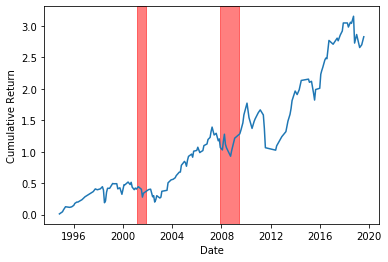

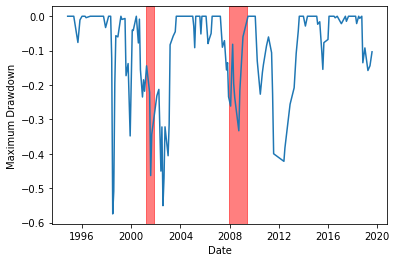

>> Average monthly return:  1.0 %
>> Monthly sharpe ratio:  0.22358905987592112
>> Annualised return:  5.52 %
>> Annualised Sharpe ratio:  0.356
>> Annualised Sharpe ratio 1:  0.775
>> Maxiumum drawdown:  [57.47822103]%
>> Maxiumum drawdown:  [57.47822103]%
>> One-month maxiumum drawdown:  [51.5763639]%
>> Skewness:  [-0.74616833]
>> Kurtosis:  [1.07014567]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -2.3851766006522e+24 %


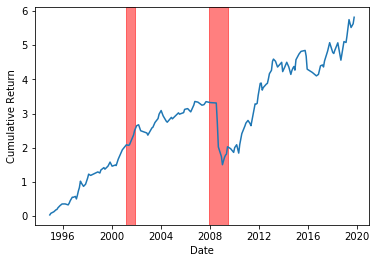

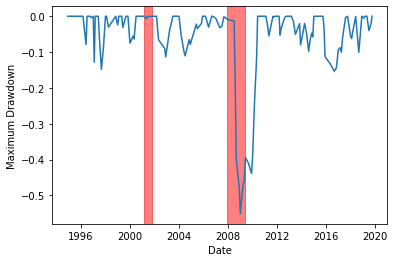

>> Average monthly return:  1.4 %
>> Monthly sharpe ratio:  0.3010928720115861
>> Annualised return:  7.98 %
>> Annualised Sharpe ratio:  0.497
>> Annualised Sharpe ratio 1:  1.043
>> Maxiumum drawdown:  [55.18758121]%
>> Maxiumum drawdown:  [55.18758121]%
>> One-month maxiumum drawdown:  [26.06486165]%
>> Skewness:  [-0.56200197]
>> Kurtosis:  [3.00892875]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -3.34754285950299e+24 %


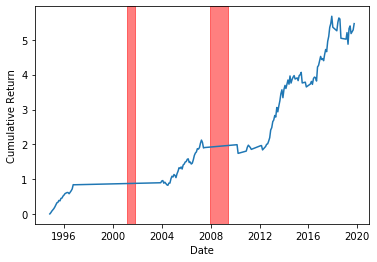

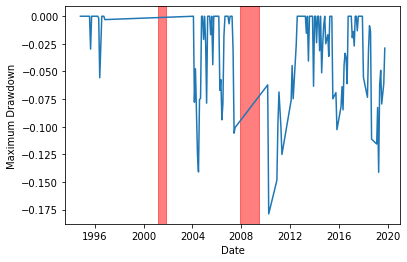

>> Average monthly return:  1.3 %
>> Monthly sharpe ratio:  0.41859958673356457
>> Annualised return:  7.75 %
>> Annualised Sharpe ratio:  0.721
>> Annualised Sharpe ratio 1:  1.45
>> Maxiumum drawdown:  [17.8955642]%
>> Maxiumum drawdown:  [17.8955642]%
>> One-month maxiumum drawdown:  [12.4547857]%
>> Skewness:  [-0.57156266]
>> Kurtosis:  [0.39380774]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -2.25489959470231e+24 %


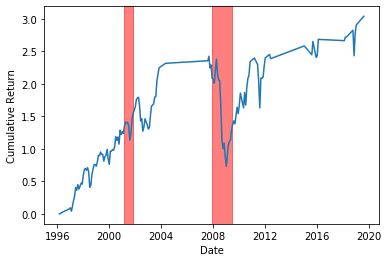

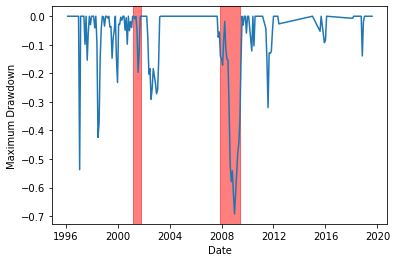

>> Average monthly return:  1.1 %
>> Monthly sharpe ratio:  0.1940142605304017
>> Annualised return:  5.74 %
>> Annualised Sharpe ratio:  0.294
>> Annualised Sharpe ratio 1:  0.672
>> Maxiumum drawdown:  [69.25109414]%
>> Maxiumum drawdown:  [69.25109414]%
>> One-month maxiumum drawdown:  [53.74312555]%
>> Skewness:  [-0.54276919]
>> Kurtosis:  [0.98286874]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -2.1437762381958273e+24 %


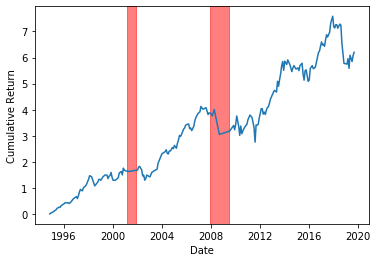

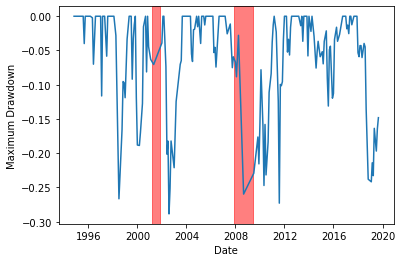

>> Average monthly return:  1.07 %
>> Monthly sharpe ratio:  0.2374682319751937
>> Annualised return:  8.22 %
>> Annualised Sharpe ratio:  0.526
>> Annualised Sharpe ratio 1:  0.823
>> Maxiumum drawdown:  [28.86165791]%
>> Maxiumum drawdown:  [28.86165791]%
>> One-month maxiumum drawdown:  [24.53748645]%
>> Skewness:  [-0.80192906]
>> Kurtosis:  [2.77017525]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -3.389304344136115e+24 %


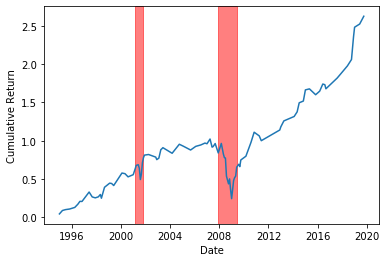

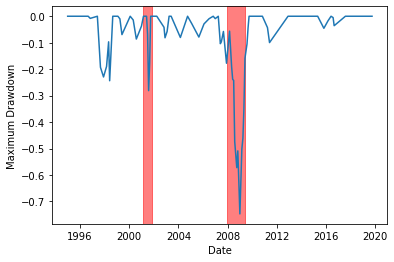

>> Average monthly return:  1.47 %
>> Monthly sharpe ratio:  0.31636269586384985
>> Annualised return:  5.28 %
>> Annualised Sharpe ratio:  0.328
>> Annualised Sharpe ratio 1:  1.096
>> Maxiumum drawdown:  [74.72507377]%
>> Maxiumum drawdown:  [74.72507377]%
>> One-month maxiumum drawdown:  [32.73904879]%
>> Skewness:  [-0.33939152]
>> Kurtosis:  [0.74003428]
>>>>>>>>>>done!>>>>>>>>>>>
UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.35 %


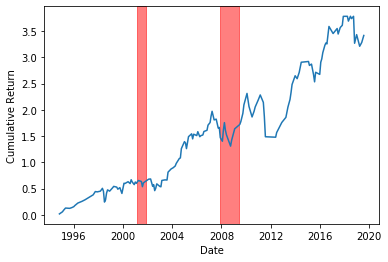

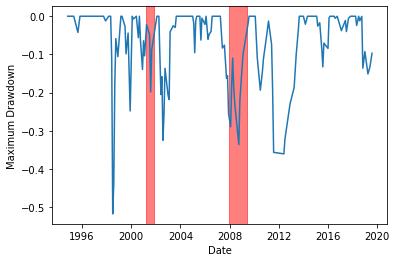

>> Average monthly return:  1.1 %
>> Monthly sharpe ratio:  0.24164360953419559
>> Annualised return:  6.12 %
>> Annualised Sharpe ratio:  0.388
>> Annualised Sharpe ratio 1:  0.837
>> Maxiumum drawdown:  [51.79716216]%
>> Maxiumum drawdown:  [51.79716216]%
>> One-month maxiumum drawdown:  [45.76029869]%
>> Skewness:  [-0.65349806]
>> Kurtosis:  [1.00882255]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  1.05 %


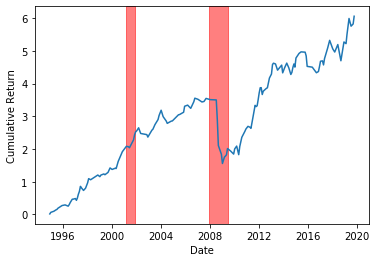

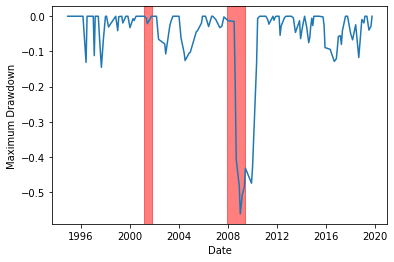

>> Average monthly return:  1.42 %
>> Monthly sharpe ratio:  0.30485417981931834
>> Annualised return:  8.13 %
>> Annualised Sharpe ratio:  0.504
>> Annualised Sharpe ratio 1:  1.056
>> Maxiumum drawdown:  [56.19414848]%
>> Maxiumum drawdown:  [56.19414848]%
>> One-month maxiumum drawdown:  [27.26009178]%
>> Skewness:  [-0.56303445]
>> Kurtosis:  [4.05187244]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  1.38 %


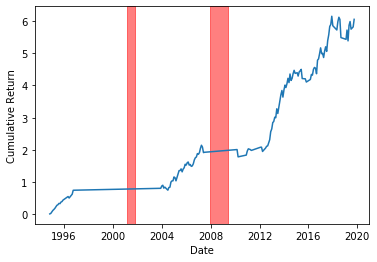

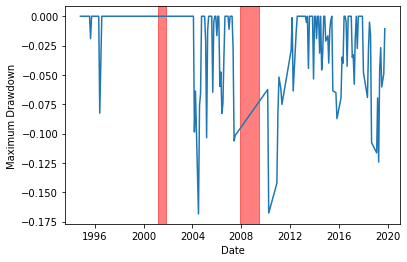

>> Average monthly return:  1.36 %
>> Monthly sharpe ratio:  0.4318326536651626
>> Annualised return:  8.13 %
>> Annualised Sharpe ratio:  0.745
>> Annualised Sharpe ratio 1:  1.496
>> Maxiumum drawdown:  [16.84710831]%
>> Maxiumum drawdown:  [16.84710831]%
>> One-month maxiumum drawdown:  [11.23403217]%
>> Skewness:  [-0.47428374]
>> Kurtosis:  [0.11516261]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.41 %


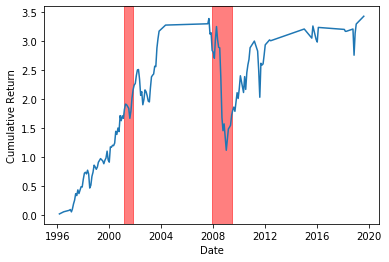

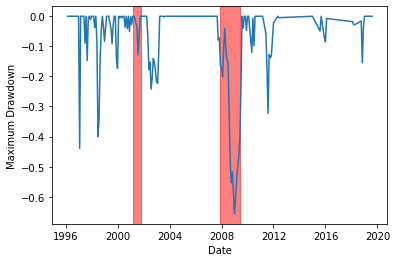

>> Average monthly return:  1.16 %
>> Monthly sharpe ratio:  0.20341011407001655
>> Annualised return:  6.13 %
>> Annualised Sharpe ratio:  0.31
>> Annualised Sharpe ratio 1:  0.705
>> Maxiumum drawdown:  [65.70639865]%
>> Maxiumum drawdown:  [65.70639865]%
>> One-month maxiumum drawdown:  [43.92804565]%
>> Skewness:  [-0.519237]
>> Kurtosis:  [1.43718565]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.55 %


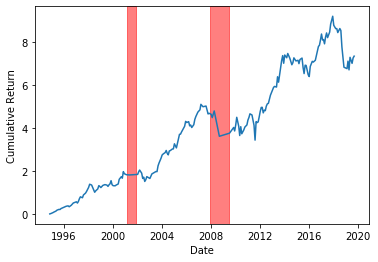

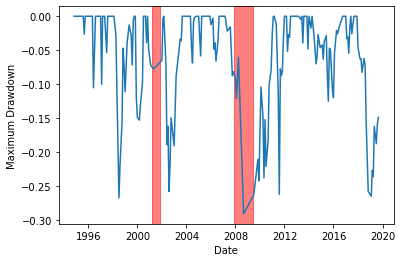

>> Average monthly return:  1.15 %
>> Monthly sharpe ratio:  0.2506288079605547
>> Annualised return:  8.85 %
>> Annualised Sharpe ratio:  0.559
>> Annualised Sharpe ratio 1:  0.868
>> Maxiumum drawdown:  [29.05196338]%
>> Maxiumum drawdown:  [29.05196338]%
>> One-month maxiumum drawdown:  [24.62597931]%
>> Skewness:  [-0.7271491]
>> Kurtosis:  [3.44858404]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.97 %


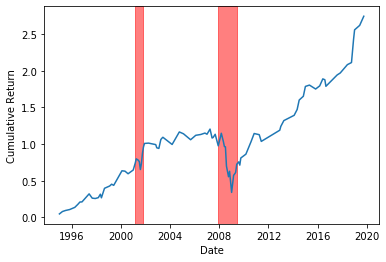

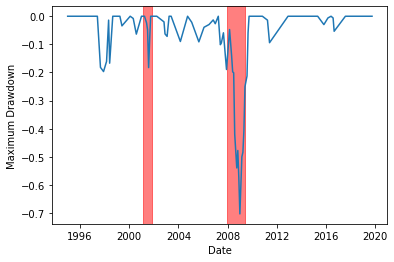

>> Average monthly return:  1.51 %
>> Monthly sharpe ratio:  0.32211266993135773
>> Annualised return:  5.42 %
>> Annualised Sharpe ratio:  0.334
>> Annualised Sharpe ratio 1:  1.116
>> Maxiumum drawdown:  [70.33037311]%
>> Maxiumum drawdown:  [70.33037311]%
>> One-month maxiumum drawdown:  [30.19867356]%
>> Skewness:  [-0.36004887]
>> Kurtosis:  [0.82779666]
>>>>>>>>>>done!>>>>>>>>>>>
UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.33 %


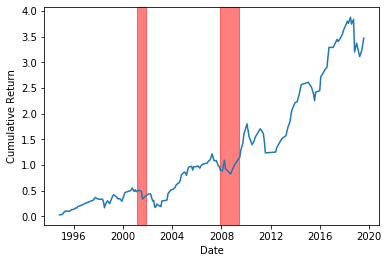

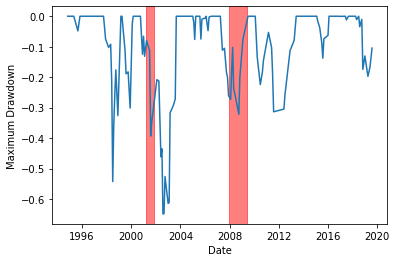

>> Average monthly return:  1.1 %
>> Monthly sharpe ratio:  0.2546588650414233
>> Annualised return:  6.17 %
>> Annualised Sharpe ratio:  0.414
>> Annualised Sharpe ratio 1:  0.882
>> Maxiumum drawdown:  [64.91399724]%
>> Maxiumum drawdown:  [64.91399724]%
>> One-month maxiumum drawdown:  [41.95560922]%
>> Skewness:  [-0.62905409]
>> Kurtosis:  [0.93001965]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  1.09 %


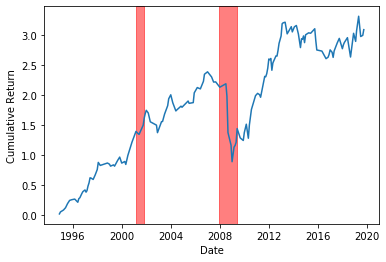

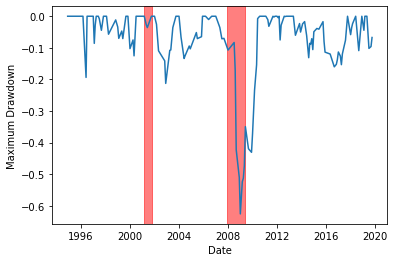

>> Average monthly return:  1.05 %
>> Monthly sharpe ratio:  0.22721855950894723
>> Annualised return:  5.8 %
>> Annualised Sharpe ratio:  0.362
>> Annualised Sharpe ratio 1:  0.787
>> Maxiumum drawdown:  [62.57777849]%
>> Maxiumum drawdown:  [62.57777849]%
>> One-month maxiumum drawdown:  [30.46209371]%
>> Skewness:  [-0.67441232]
>> Kurtosis:  [2.83808626]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  1.51 %


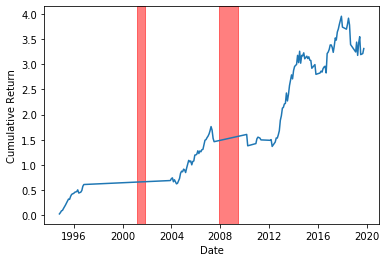

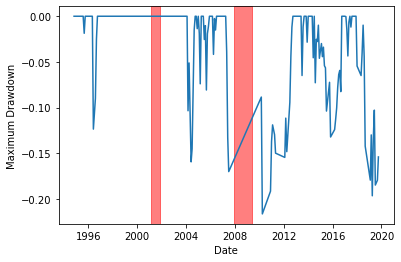

>> Average monthly return:  1.03 %
>> Monthly sharpe ratio:  0.3248833039949439
>> Annualised return:  6.02 %
>> Annualised Sharpe ratio:  0.549
>> Annualised Sharpe ratio 1:  1.125
>> Maxiumum drawdown:  [21.63572018]%
>> Maxiumum drawdown:  [21.63572018]%
>> One-month maxiumum drawdown:  [14.03101388]%
>> Skewness:  [-0.62663433]
>> Kurtosis:  [0.76537757]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.37 %


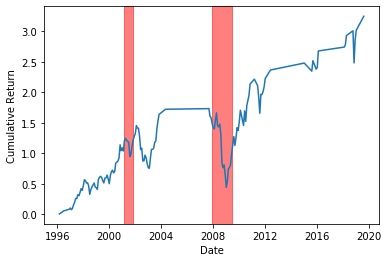

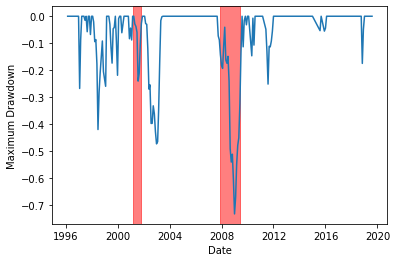

>> Average monthly return:  1.12 %
>> Monthly sharpe ratio:  0.20459484500836067
>> Annualised return:  5.95 %
>> Annualised Sharpe ratio:  0.314
>> Annualised Sharpe ratio 1:  0.709
>> Maxiumum drawdown:  [73.38718487]%
>> Maxiumum drawdown:  [73.38718487]%
>> One-month maxiumum drawdown:  [35.65932541]%
>> Skewness:  [-0.61147276]
>> Kurtosis:  [1.08187279]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.53 %


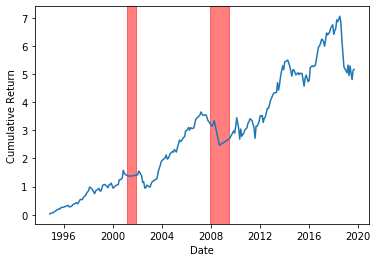

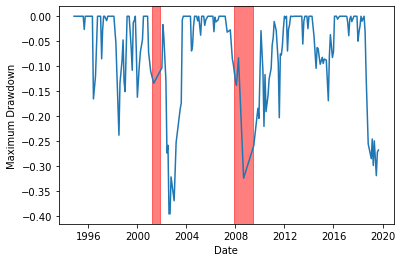

>> Average monthly return:  0.99 %
>> Monthly sharpe ratio:  0.2243475423788935
>> Annualised return:  7.55 %
>> Annualised Sharpe ratio:  0.494
>> Annualised Sharpe ratio 1:  0.777
>> Maxiumum drawdown:  [39.60554713]%
>> Maxiumum drawdown:  [39.60554713]%
>> One-month maxiumum drawdown:  [26.30360398]%
>> Skewness:  [-0.85693998]
>> Kurtosis:  [2.70792843]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  1.03 %


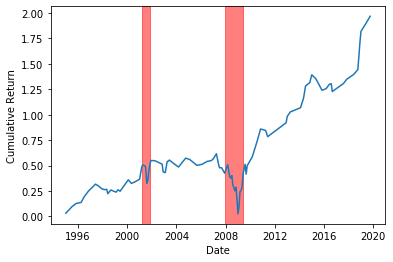

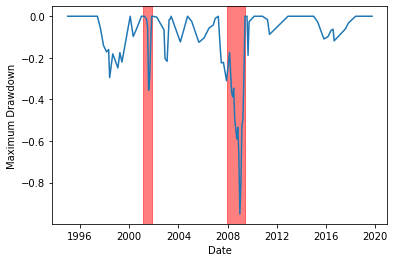

>> Average monthly return:  1.26 %
>> Monthly sharpe ratio:  0.27370517729540217
>> Annualised return:  4.45 %
>> Annualised Sharpe ratio:  0.28
>> Annualised Sharpe ratio 1:  0.948
>> Maxiumum drawdown:  [95.07911258]%
>> Maxiumum drawdown:  [95.07911258]%
>> One-month maxiumum drawdown:  [85.63277188]%
>> Skewness:  [-0.27565514]
>> Kurtosis:  [0.70562061]
>>>>>>>>>>done!>>>>>>>>>>>
UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.37 %


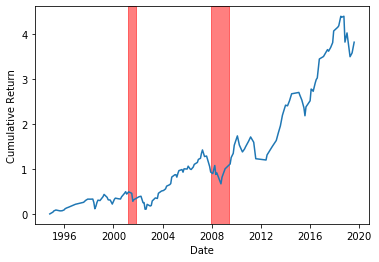

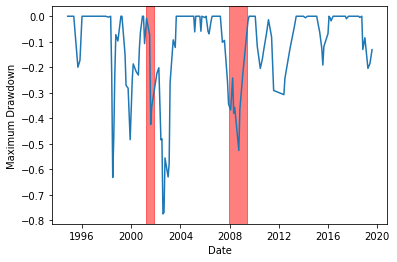

>> Average monthly return:  1.17 %
>> Monthly sharpe ratio:  0.24431446178532912
>> Annualised return:  6.49 %
>> Annualised Sharpe ratio:  0.391
>> Annualised Sharpe ratio 1:  0.846
>> Maxiumum drawdown:  [77.4646703]%
>> Maxiumum drawdown:  [77.4646703]%
>> One-month maxiumum drawdown:  [56.63957129]%
>> Skewness:  [-0.8152351]
>> Kurtosis:  [0.63584671]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  1.1 %


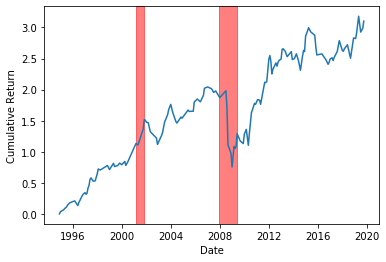

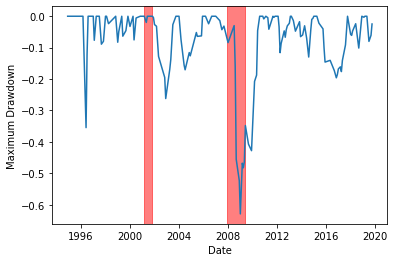

>> Average monthly return:  1.06 %
>> Monthly sharpe ratio:  0.2196457690411274
>> Annualised return:  5.81 %
>> Annualised Sharpe ratio:  0.346
>> Annualised Sharpe ratio 1:  0.761
>> Maxiumum drawdown:  [62.92718536]%
>> Maxiumum drawdown:  [62.92718536]%
>> One-month maxiumum drawdown:  [35.46240871]%
>> Skewness:  [-0.40669926]
>> Kurtosis:  [4.13708653]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  1.52 %


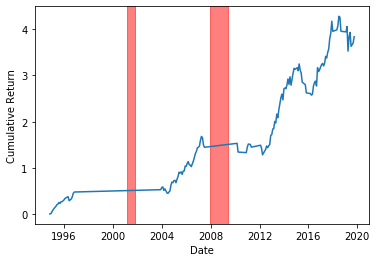

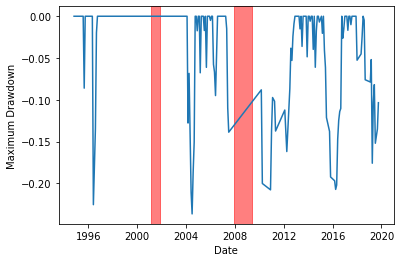

>> Average monthly return:  1.11 %
>> Monthly sharpe ratio:  0.3341639198122273
>> Annualised return:  6.5 %
>> Annualised Sharpe ratio:  0.565
>> Annualised Sharpe ratio 1:  1.158
>> Maxiumum drawdown:  [23.66136563]%
>> Maxiumum drawdown:  [23.66136563]%
>> One-month maxiumum drawdown:  [22.55650373]%
>> Skewness:  [-0.50883498]
>> Kurtosis:  [0.80422799]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.4 %


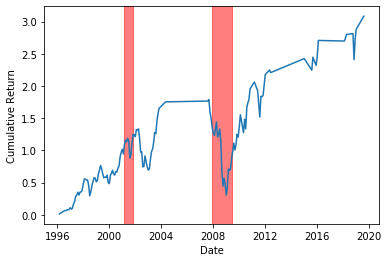

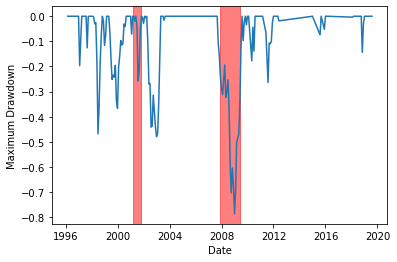

>> Average monthly return:  1.12 %
>> Monthly sharpe ratio:  0.18873650386785906
>> Annualised return:  5.79 %
>> Annualised Sharpe ratio:  0.282
>> Annualised Sharpe ratio 1:  0.654
>> Maxiumum drawdown:  [78.71333409]%
>> Maxiumum drawdown:  [78.71333409]%
>> One-month maxiumum drawdown:  [42.03898582]%
>> Skewness:  [-0.55935997]
>> Kurtosis:  [1.28698393]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.55 %


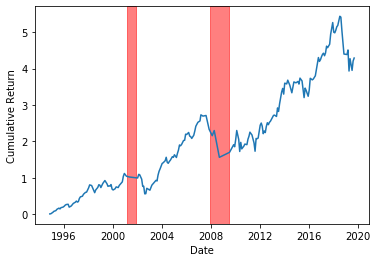

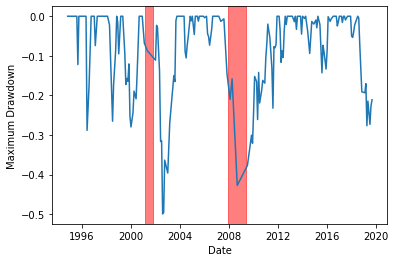

>> Average monthly return:  0.92 %
>> Monthly sharpe ratio:  0.2031857652244977
>> Annualised return:  6.89 %
>> Annualised Sharpe ratio:  0.439
>> Annualised Sharpe ratio 1:  0.704
>> Maxiumum drawdown:  [49.94233265]%
>> Maxiumum drawdown:  [49.94233265]%
>> One-month maxiumum drawdown:  [31.99202476]%
>> Skewness:  [-1.0309982]
>> Kurtosis:  [3.22776291]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  1.07 %


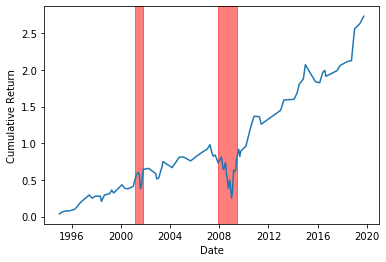

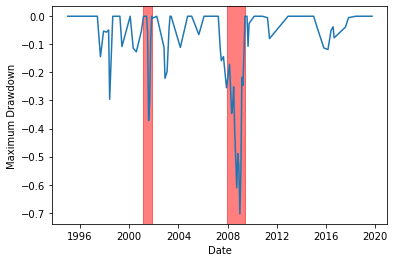

>> Average monthly return:  1.54 %
>> Monthly sharpe ratio:  0.2875079584770458
>> Annualised return:  5.41 %
>> Annualised Sharpe ratio:  0.292
>> Annualised Sharpe ratio 1:  0.996
>> Maxiumum drawdown:  [70.42172778]%
>> Maxiumum drawdown:  [70.42172778]%
>> One-month maxiumum drawdown:  [38.29352958]%
>> Skewness:  [-0.10349173]
>> Kurtosis:  [1.0715055]
>>>>>>>>>>done!>>>>>>>>>>>
UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.38 %


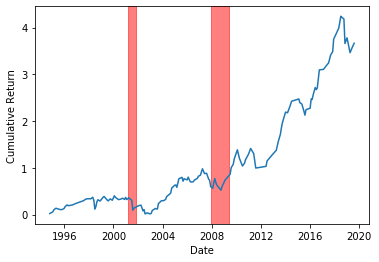

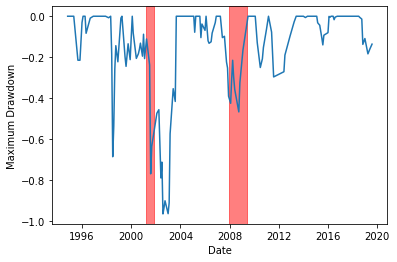

>> Average monthly return:  1.14 %
>> Monthly sharpe ratio:  0.24513962449639
>> Annualised return:  6.35 %
>> Annualised Sharpe ratio:  0.394
>> Annualised Sharpe ratio 1:  0.849
>> Maxiumum drawdown:  [96.57458997]%
>> Maxiumum drawdown:  [96.57458997]%
>> One-month maxiumum drawdown:  [88.07999141]%
>> Skewness:  [-0.87668732]
>> Kurtosis:  [1.22800946]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  1.11 %


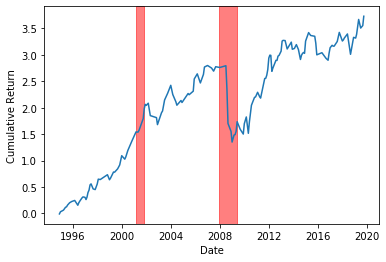

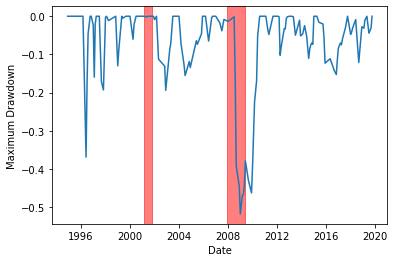

>> Average monthly return:  1.15 %
>> Monthly sharpe ratio:  0.2505915090727518
>> Annualised return:  6.41 %
>> Annualised Sharpe ratio:  0.404
>> Annualised Sharpe ratio 1:  0.868
>> Maxiumum drawdown:  [51.77350732]%
>> Maxiumum drawdown:  [51.77350732]%
>> One-month maxiumum drawdown:  [36.89787759]%
>> Skewness:  [-0.81617584]
>> Kurtosis:  [2.35172572]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  1.53 %


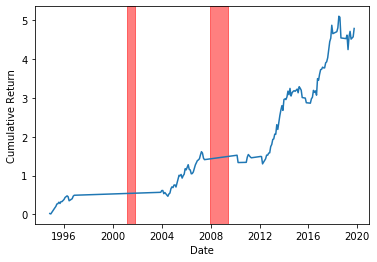

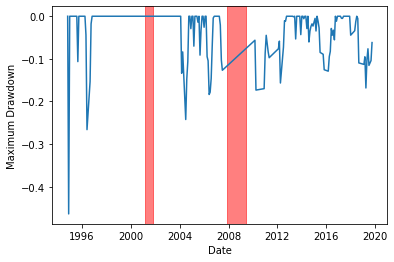

>> Average monthly return:  1.23 %
>> Monthly sharpe ratio:  0.3619410717289148
>> Annualised return:  7.27 %
>> Annualised Sharpe ratio:  0.615
>> Annualised Sharpe ratio 1:  1.254
>> Maxiumum drawdown:  [46.38986712]%
>> Maxiumum drawdown:  [46.38986712]%
>> One-month maxiumum drawdown:  [46.38986712]%
>> Skewness:  [-0.47069118]
>> Kurtosis:  [0.34663662]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.42 %


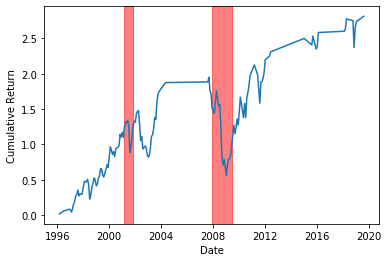

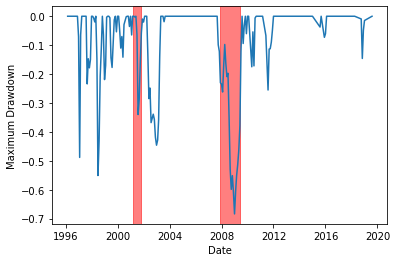

>> Average monthly return:  1.05 %
>> Monthly sharpe ratio:  0.18933125676583742
>> Annualised return:  5.5 %
>> Annualised Sharpe ratio:  0.285
>> Annualised Sharpe ratio 1:  0.656
>> Maxiumum drawdown:  [68.39121969]%
>> Maxiumum drawdown:  [68.39121969]%
>> One-month maxiumum drawdown:  [47.33588221]%
>> Skewness:  [-0.82803515]
>> Kurtosis:  [0.98456657]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.6 %


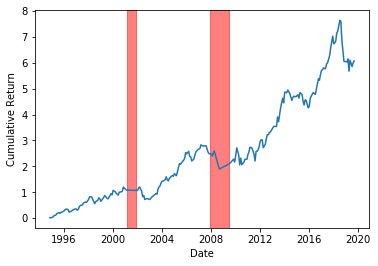

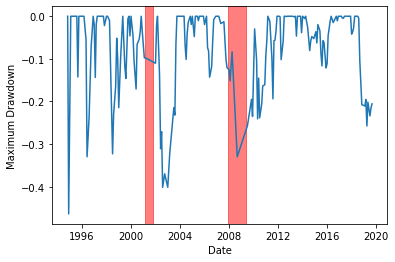

>> Average monthly return:  1.06 %
>> Monthly sharpe ratio:  0.2331842365546269
>> Annualised return:  8.14 %
>> Annualised Sharpe ratio:  0.515
>> Annualised Sharpe ratio 1:  0.808
>> Maxiumum drawdown:  [46.38986712]%
>> Maxiumum drawdown:  [46.38986712]%
>> One-month maxiumum drawdown:  [46.38986712]%
>> Skewness:  [-0.8818977]
>> Kurtosis:  [1.94338857]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  1.01 %


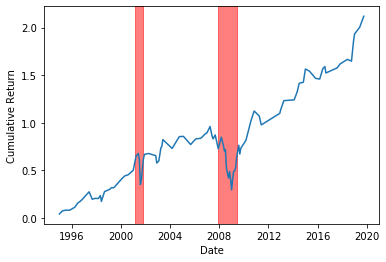

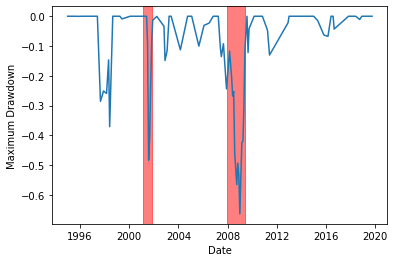

>> Average monthly return:  1.32 %
>> Monthly sharpe ratio:  0.2786892055627819
>> Annualised return:  4.66 %
>> Annualised Sharpe ratio:  0.284
>> Annualised Sharpe ratio 1:  0.965
>> Maxiumum drawdown:  [66.35317687]%
>> Maxiumum drawdown:  [66.35317687]%
>> One-month maxiumum drawdown:  [43.00380759]%
>> Skewness:  [-0.78787603]
>> Kurtosis:  [1.43498285]
>>>>>>>>>>done!>>>>>>>>>>>
UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.4 %


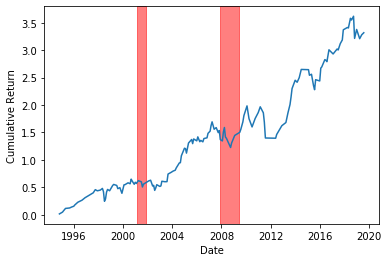

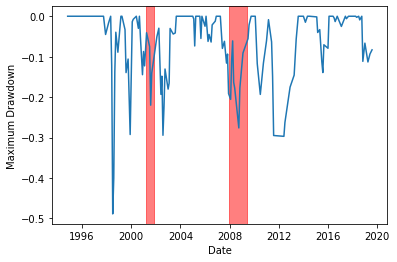

>> Average monthly return:  1.06 %
>> Monthly sharpe ratio:  0.266027493783342
>> Annualised return:  6.03 %
>> Annualised Sharpe ratio:  0.437
>> Annualised Sharpe ratio 1:  0.922
>> Maxiumum drawdown:  [48.89110493]%
>> Maxiumum drawdown:  [48.89110493]%
>> One-month maxiumum drawdown:  [41.75337629]%
>> Skewness:  [-0.65901925]
>> Kurtosis:  [0.74246741]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.95 %


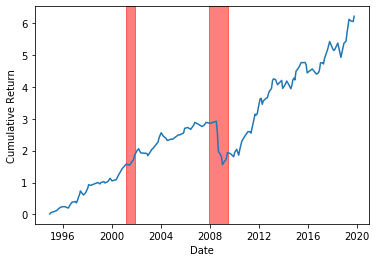

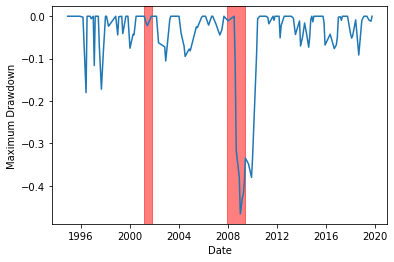

>> Average monthly return:  1.4 %
>> Monthly sharpe ratio:  0.3535168177760335
>> Annualised return:  8.22 %
>> Annualised Sharpe ratio:  0.598
>> Annualised Sharpe ratio 1:  1.225
>> Maxiumum drawdown:  [46.66495118]%
>> Maxiumum drawdown:  [46.66495118]%
>> One-month maxiumum drawdown:  [22.96340486]%
>> Skewness:  [-0.44963531]
>> Kurtosis:  [3.35416027]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  1.35 %


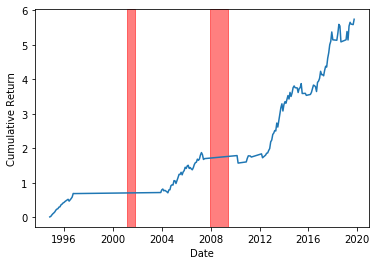

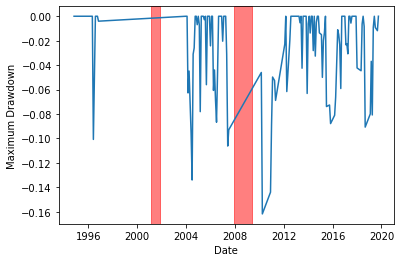

>> Average monthly return:  1.32 %
>> Monthly sharpe ratio:  0.4645302261584174
>> Annualised return:  7.93 %
>> Annualised Sharpe ratio:  0.806
>> Annualised Sharpe ratio 1:  1.609
>> Maxiumum drawdown:  [16.17813463]%
>> Maxiumum drawdown:  [16.17813463]%
>> One-month maxiumum drawdown:  [12.13397266]%
>> Skewness:  [-0.6004777]
>> Kurtosis:  [0.34413176]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.39 %


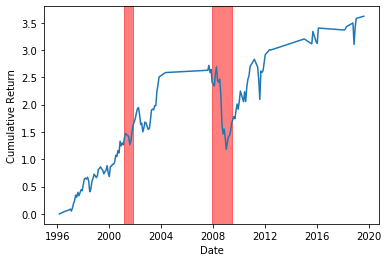

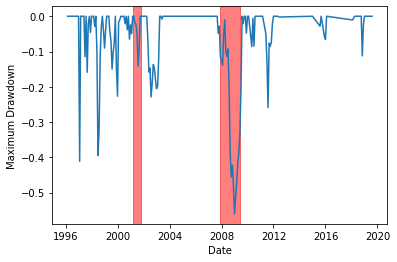

>> Average monthly return:  1.14 %
>> Monthly sharpe ratio:  0.23532459997955868
>> Annualised return:  6.31 %
>> Annualised Sharpe ratio:  0.375
>> Annualised Sharpe ratio 1:  0.815
>> Maxiumum drawdown:  [56.05761923]%
>> Maxiumum drawdown:  [56.05761923]%
>> One-month maxiumum drawdown:  [41.13082758]%
>> Skewness:  [-0.45240651]
>> Kurtosis:  [1.1241221]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.59 %


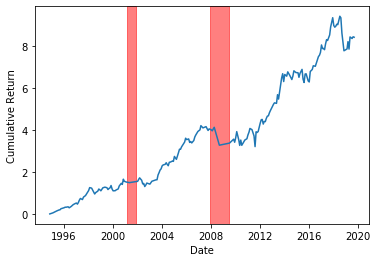

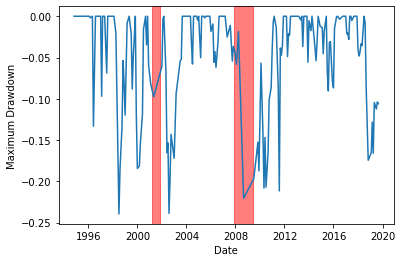

>> Average monthly return:  1.18 %
>> Monthly sharpe ratio:  0.2950013104766633
>> Annualised return:  9.38 %
>> Annualised Sharpe ratio:  0.677
>> Annualised Sharpe ratio 1:  1.022
>> Maxiumum drawdown:  [23.94768716]%
>> Maxiumum drawdown:  [23.94768716]%
>> One-month maxiumum drawdown:  [22.36790805]%
>> Skewness:  [-0.66244553]
>> Kurtosis:  [2.75093739]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.82 %


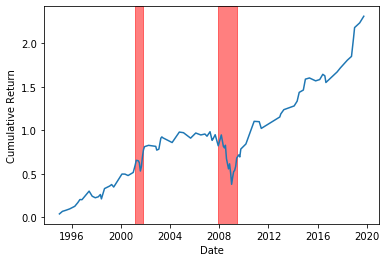

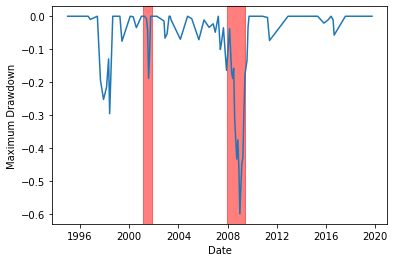

>> Average monthly return:  1.35 %
>> Monthly sharpe ratio:  0.3412039427459666
>> Annualised return:  4.91 %
>> Annualised Sharpe ratio:  0.359
>> Annualised Sharpe ratio 1:  1.182
>> Maxiumum drawdown:  [59.99848402]%
>> Maxiumum drawdown:  [59.99848402]%
>> One-month maxiumum drawdown:  [26.6225698]%
>> Skewness:  [-0.30186965]
>> Kurtosis:  [0.34376364]
>>>>>>>>>>done!>>>>>>>>>>>
UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.06 %


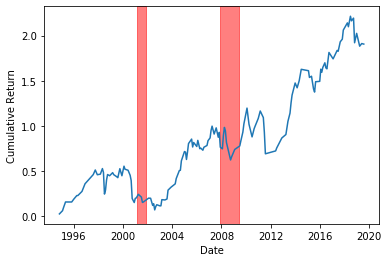

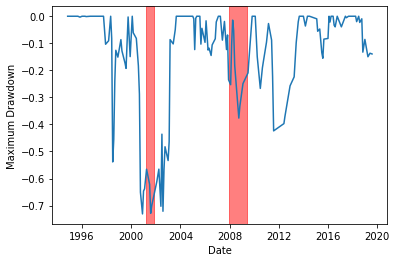

>> Average monthly return:  0.82 %
>> Monthly sharpe ratio:  0.17969396269037702
>> Annualised return:  4.36 %
>> Annualised Sharpe ratio:  0.276
>> Annualised Sharpe ratio 1:  0.622
>> Maxiumum drawdown:  [73.08992593]%
>> Maxiumum drawdown:  [73.08992593]%
>> One-month maxiumum drawdown:  [50.91593008]%
>> Skewness:  [-0.95375241]
>> Kurtosis:  [1.3592586]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.94 %


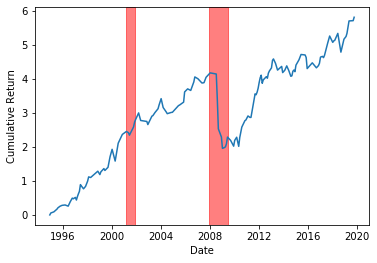

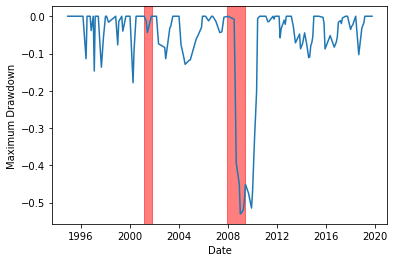

>> Average monthly return:  1.41 %
>> Monthly sharpe ratio:  0.29046661110448196
>> Annualised return:  7.98 %
>> Annualised Sharpe ratio:  0.476
>> Annualised Sharpe ratio 1:  1.006
>> Maxiumum drawdown:  [53.05667148]%
>> Maxiumum drawdown:  [53.05667148]%
>> One-month maxiumum drawdown:  [25.55962918]%
>> Skewness:  [-0.6007343]
>> Kurtosis:  [3.33559778]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  1.86 %


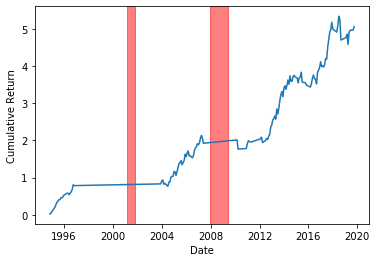

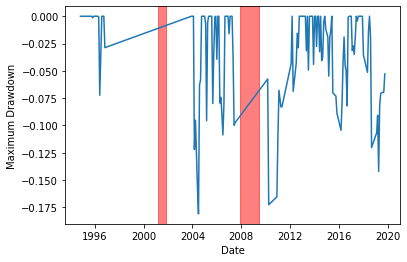

>> Average monthly return:  1.26 %
>> Monthly sharpe ratio:  0.39516465956888347
>> Annualised return:  7.47 %
>> Annualised Sharpe ratio:  0.677
>> Annualised Sharpe ratio 1:  1.369
>> Maxiumum drawdown:  [18.09561663]%
>> Maxiumum drawdown:  [18.09561663]%
>> One-month maxiumum drawdown:  [12.20962035]%
>> Skewness:  [-0.45839393]
>> Kurtosis:  [0.22695493]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -0.07 %


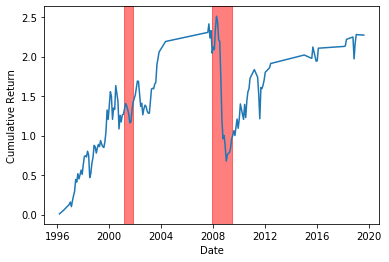

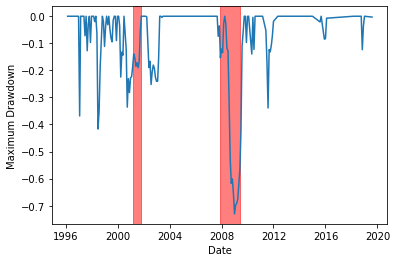

>> Average monthly return:  0.97 %
>> Monthly sharpe ratio:  0.165290613007584
>> Annualised return:  4.85 %
>> Annualised Sharpe ratio:  0.24
>> Annualised Sharpe ratio 1:  0.573
>> Maxiumum drawdown:  [73.04282807]%
>> Maxiumum drawdown:  [73.04282807]%
>> One-month maxiumum drawdown:  [37.70995186]%
>> Skewness:  [-0.65362705]
>> Kurtosis:  [1.26051884]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.44 %


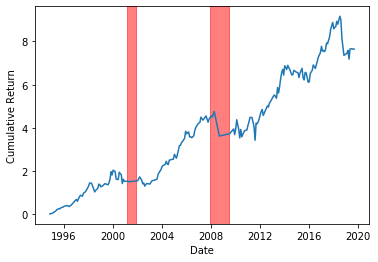

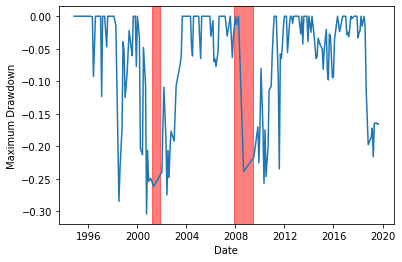

>> Average monthly return:  1.17 %
>> Monthly sharpe ratio:  0.24456862085610878
>> Annualised return:  9.01 %
>> Annualised Sharpe ratio:  0.541
>> Annualised Sharpe ratio 1:  0.847
>> Maxiumum drawdown:  [30.42633944]%
>> Maxiumum drawdown:  [30.42633944]%
>> One-month maxiumum drawdown:  [27.45428653]%
>> Skewness:  [-0.81096062]
>> Kurtosis:  [2.96469455]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.59 %


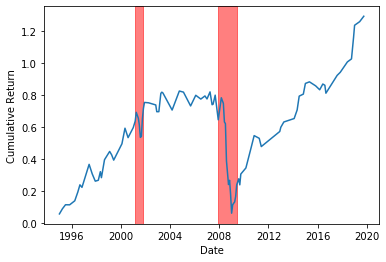

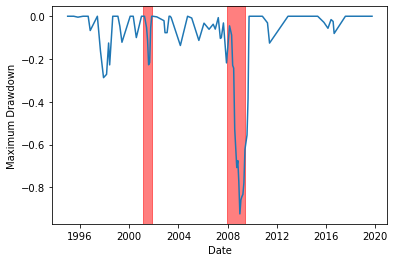

>> Average monthly return:  0.98 %
>> Monthly sharpe ratio:  0.21732032157453543
>> Annualised return:  3.37 %
>> Annualised Sharpe ratio:  0.216
>> Annualised Sharpe ratio 1:  0.753
>> Maxiumum drawdown:  [92.36052337]%
>> Maxiumum drawdown:  [92.36052337]%
>> One-month maxiumum drawdown:  [66.23060283]%
>> Skewness:  [-0.5865251]
>> Kurtosis:  [1.06316343]
>>>>>>>>>>done!>>>>>>>>>>>
UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.44 %


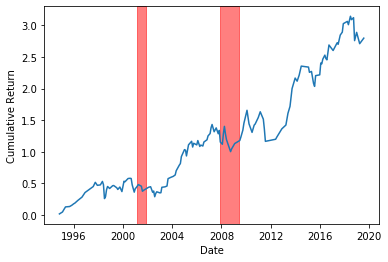

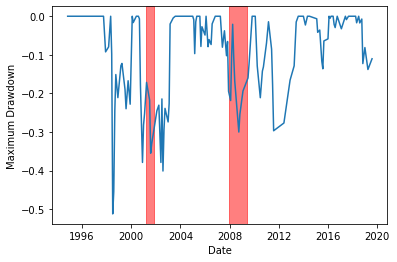

>> Average monthly return:  0.98 %
>> Monthly sharpe ratio:  0.23500372828217497
>> Annualised return:  5.48 %
>> Annualised Sharpe ratio:  0.379
>> Annualised Sharpe ratio 1:  0.814
>> Maxiumum drawdown:  [51.24936124]%
>> Maxiumum drawdown:  [51.24936124]%
>> One-month maxiumum drawdown:  [45.96744858]%
>> Skewness:  [-0.70320309]
>> Kurtosis:  [0.93563374]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  1.1 %


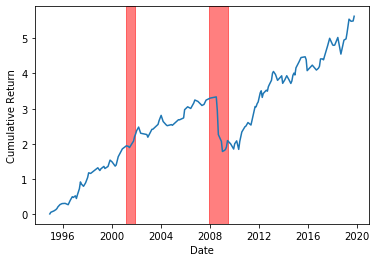

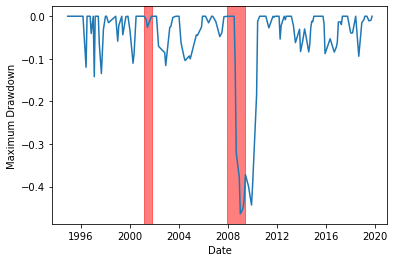

>> Average monthly return:  1.36 %
>> Monthly sharpe ratio:  0.3234337086518212
>> Annualised return:  7.85 %
>> Annualised Sharpe ratio:  0.541
>> Annualised Sharpe ratio 1:  1.12
>> Maxiumum drawdown:  [46.42616842]%
>> Maxiumum drawdown:  [46.42616842]%
>> One-month maxiumum drawdown:  [23.12582145]%
>> Skewness:  [-0.55049646]
>> Kurtosis:  [2.54492991]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  1.57 %


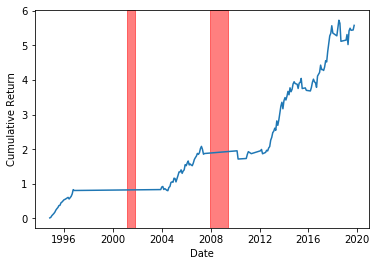

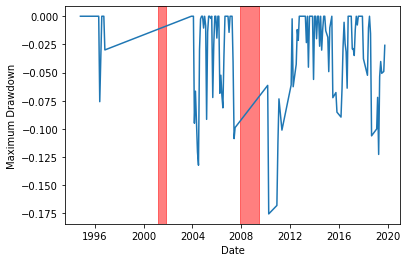

>> Average monthly return:  1.31 %
>> Monthly sharpe ratio:  0.4350187731967454
>> Annualised return:  7.83 %
>> Annualised Sharpe ratio:  0.751
>> Annualised Sharpe ratio 1:  1.507
>> Maxiumum drawdown:  [17.56091128]%
>> Maxiumum drawdown:  [17.56091128]%
>> One-month maxiumum drawdown:  [12.16578761]%
>> Skewness:  [-0.54908985]
>> Kurtosis:  [0.28465087]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.43 %


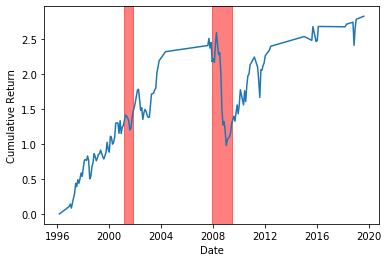

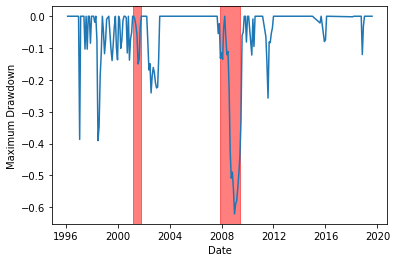

>> Average monthly return:  1.03 %
>> Monthly sharpe ratio:  0.20176235728305747
>> Annualised return:  5.51 %
>> Annualised Sharpe ratio:  0.312
>> Annualised Sharpe ratio 1:  0.699
>> Maxiumum drawdown:  [62.11861764]%
>> Maxiumum drawdown:  [62.11861764]%
>> One-month maxiumum drawdown:  [38.72684225]%
>> Skewness:  [-0.52451894]
>> Kurtosis:  [0.86559922]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.68 %


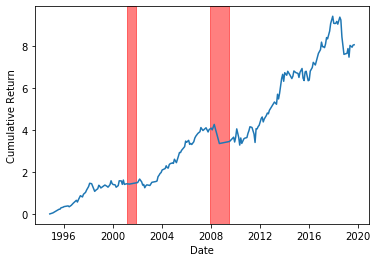

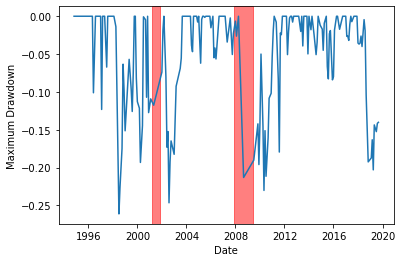

>> Average monthly return:  1.17 %
>> Monthly sharpe ratio:  0.2772804773015358
>> Annualised return:  9.22 %
>> Annualised Sharpe ratio:  0.63
>> Annualised Sharpe ratio 1:  0.961
>> Maxiumum drawdown:  [26.11747623]%
>> Maxiumum drawdown:  [26.11747623]%
>> One-month maxiumum drawdown:  [25.08387242]%
>> Skewness:  [-0.79400224]
>> Kurtosis:  [2.244927]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.92 %


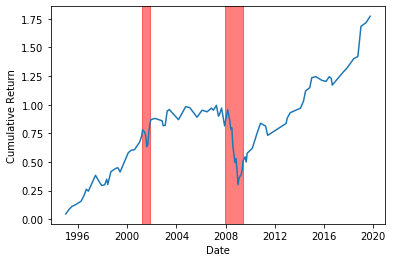

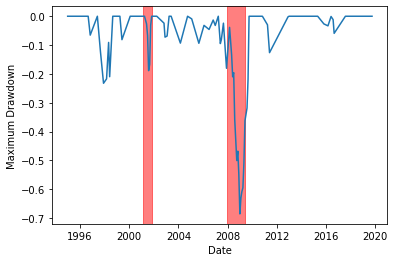

>> Average monthly return:  1.16 %
>> Monthly sharpe ratio:  0.28302362893457805
>> Annualised return:  4.16 %
>> Annualised Sharpe ratio:  0.293
>> Annualised Sharpe ratio 1:  0.98
>> Maxiumum drawdown:  [68.60071262]%
>> Maxiumum drawdown:  [68.60071262]%
>> One-month maxiumum drawdown:  [30.50288591]%
>> Skewness:  [-0.21643257]
>> Kurtosis:  [0.49842748]
>>>>>>>>>>done!>>>>>>>>>>>
UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -2.17 %


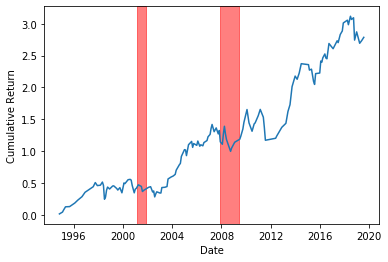

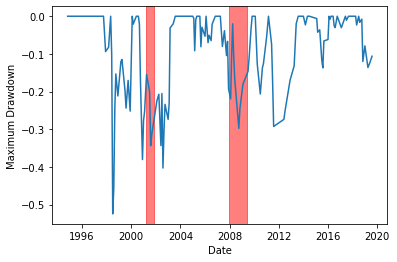

>> Average monthly return:  0.98 %
>> Monthly sharpe ratio:  0.23510936733579338
>> Annualised return:  5.47 %
>> Annualised Sharpe ratio:  0.379
>> Annualised Sharpe ratio 1:  0.814
>> Maxiumum drawdown:  [52.48810194]%
>> Maxiumum drawdown:  [52.48810194]%
>> One-month maxiumum drawdown:  [47.07683174]%
>> Skewness:  [-0.71377935]
>> Kurtosis:  [0.87513246]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -0.82 %


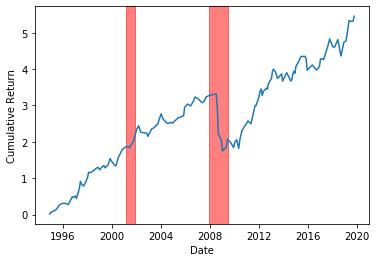

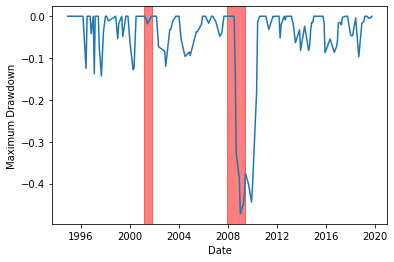

>> Average monthly return:  1.34 %
>> Monthly sharpe ratio:  0.31872959570932097
>> Annualised return:  7.74 %
>> Annualised Sharpe ratio:  0.532
>> Annualised Sharpe ratio 1:  1.104
>> Maxiumum drawdown:  [47.25415289]%
>> Maxiumum drawdown:  [47.25415289]%
>> One-month maxiumum drawdown:  [23.76416743]%
>> Skewness:  [-0.6099003]
>> Kurtosis:  [2.70662006]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  1.17 %


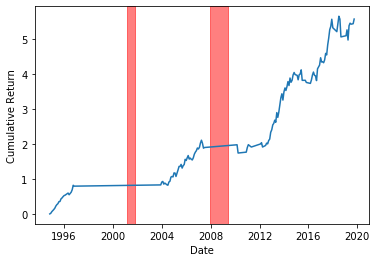

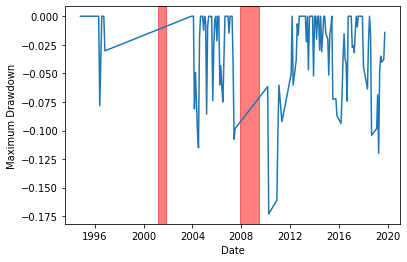

>> Average monthly return:  1.31 %
>> Monthly sharpe ratio:  0.4358128309528218
>> Annualised return:  7.82 %
>> Annualised Sharpe ratio:  0.752
>> Annualised Sharpe ratio 1:  1.51
>> Maxiumum drawdown:  [17.29770504]%
>> Maxiumum drawdown:  [17.29770504]%
>> One-month maxiumum drawdown:  [11.87409885]%
>> Skewness:  [-0.51876311]
>> Kurtosis:  [0.22895354]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -2.6 %


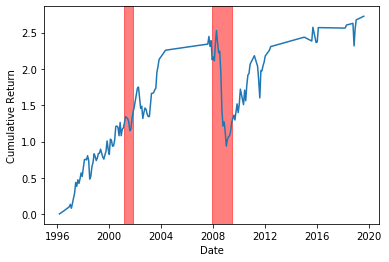

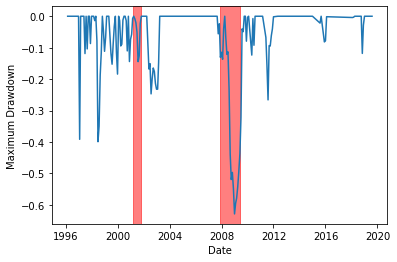

>> Average monthly return:  1.01 %
>> Monthly sharpe ratio:  0.19825656559888152
>> Annualised return:  5.4 %
>> Annualised Sharpe ratio:  0.306
>> Annualised Sharpe ratio 1:  0.687
>> Maxiumum drawdown:  [62.90390521]%
>> Maxiumum drawdown:  [62.90390521]%
>> One-month maxiumum drawdown:  [39.16933319]%
>> Skewness:  [-0.56472172]
>> Kurtosis:  [0.90367818]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -0.52 %


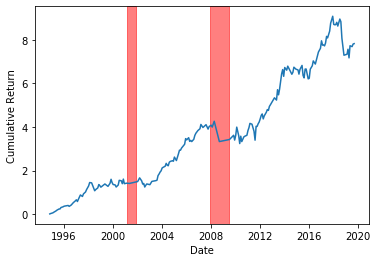

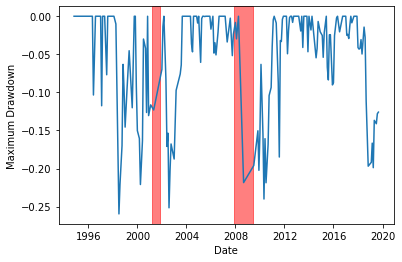

>> Average monthly return:  1.16 %
>> Monthly sharpe ratio:  0.27375453855527226
>> Annualised return:  9.1 %
>> Annualised Sharpe ratio:  0.621
>> Annualised Sharpe ratio 1:  0.948
>> Maxiumum drawdown:  [25.96072227]%
>> Maxiumum drawdown:  [25.96072227]%
>> One-month maxiumum drawdown:  [25.20099393]%
>> Skewness:  [-0.82643014]
>> Kurtosis:  [2.30162457]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -3.39 %


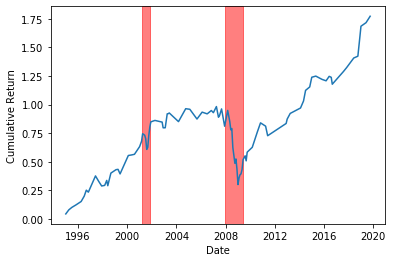

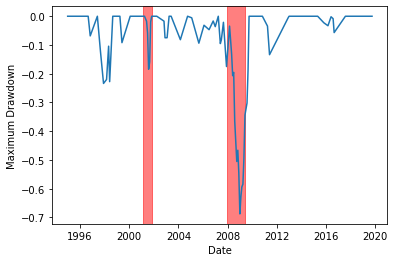

>> Average monthly return:  1.16 %
>> Monthly sharpe ratio:  0.283884340355677
>> Annualised return:  4.16 %
>> Annualised Sharpe ratio:  0.294
>> Annualised Sharpe ratio 1:  0.983
>> Maxiumum drawdown:  [68.76970426]%
>> Maxiumum drawdown:  [68.76970426]%
>> One-month maxiumum drawdown:  [31.17844589]%
>> Skewness:  [-0.24848901]
>> Kurtosis:  [0.51361763]
>>>>>>>>>>done!>>>>>>>>>>>
UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.34 %


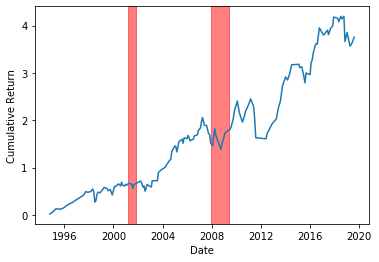

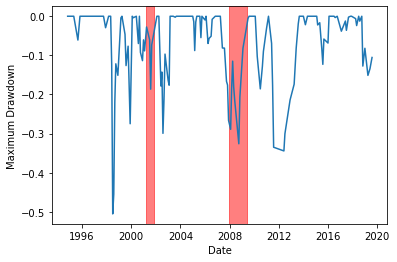

>> Average monthly return:  1.15 %
>> Monthly sharpe ratio:  0.25418440403623016
>> Annualised return:  6.44 %
>> Annualised Sharpe ratio:  0.412
>> Annualised Sharpe ratio 1:  0.881
>> Maxiumum drawdown:  [50.52888709]%
>> Maxiumum drawdown:  [50.52888709]%
>> One-month maxiumum drawdown:  [43.50832451]%
>> Skewness:  [-0.63341479]
>> Kurtosis:  [0.81387552]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  1.05 %


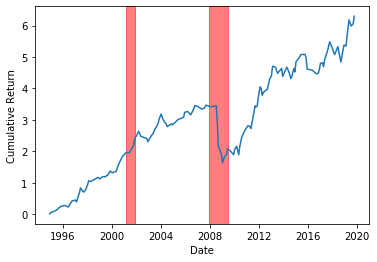

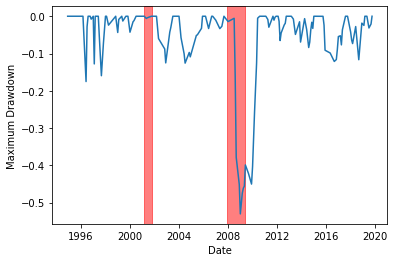

>> Average monthly return:  1.44 %
>> Monthly sharpe ratio:  0.3118197839631421
>> Annualised return:  8.27 %
>> Annualised Sharpe ratio:  0.517
>> Annualised Sharpe ratio 1:  1.08
>> Maxiumum drawdown:  [53.02479758]%
>> Maxiumum drawdown:  [53.02479758]%
>> One-month maxiumum drawdown:  [25.95726834]%
>> Skewness:  [-0.4467623]
>> Kurtosis:  [3.39320052]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  1.37 %


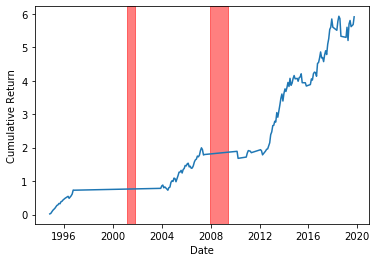

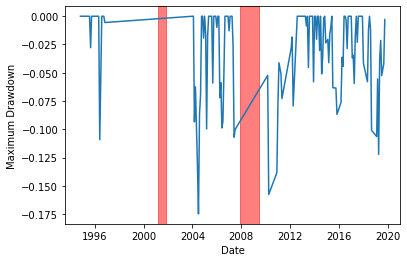

>> Average monthly return:  1.35 %
>> Monthly sharpe ratio:  0.42666042892613637
>> Annualised return:  8.04 %
>> Annualised Sharpe ratio:  0.735
>> Annualised Sharpe ratio 1:  1.478
>> Maxiumum drawdown:  [17.49065624]%
>> Maxiumum drawdown:  [17.49065624]%
>> One-month maxiumum drawdown:  [11.12144666]%
>> Skewness:  [-0.46682438]
>> Kurtosis:  [0.01290176]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.41 %


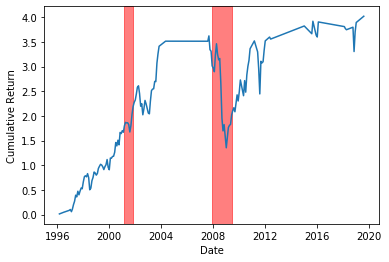

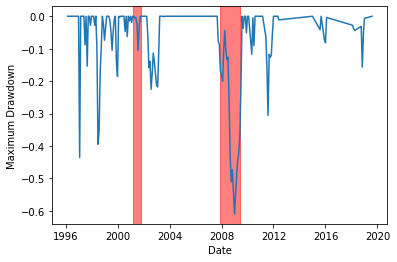

>> Average monthly return:  1.24 %
>> Monthly sharpe ratio:  0.22017209070067023
>> Annualised return:  6.67 %
>> Annualised Sharpe ratio:  0.341
>> Annualised Sharpe ratio 1:  0.763
>> Maxiumum drawdown:  [60.92808287]%
>> Maxiumum drawdown:  [60.92808287]%
>> One-month maxiumum drawdown:  [43.51846656]%
>> Skewness:  [-0.466974]
>> Kurtosis:  [1.13437815]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.54 %


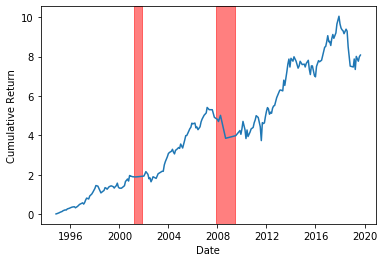

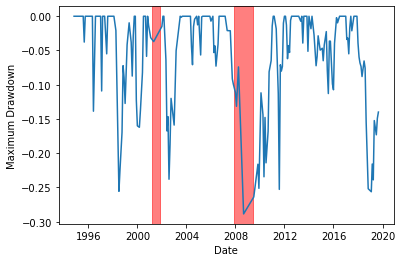

>> Average monthly return:  1.19 %
>> Monthly sharpe ratio:  0.2597446096380737
>> Annualised return:  9.22 %
>> Annualised Sharpe ratio:  0.583
>> Annualised Sharpe ratio 1:  0.9
>> Maxiumum drawdown:  [28.85760373]%
>> Maxiumum drawdown:  [28.85760373]%
>> One-month maxiumum drawdown:  [23.97899914]%
>> Skewness:  [-0.63374298]
>> Kurtosis:  [2.89580038]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.98 %


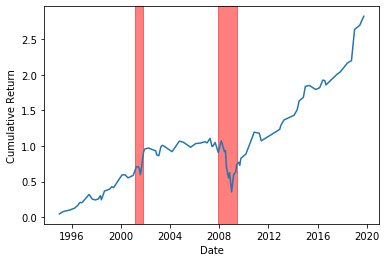

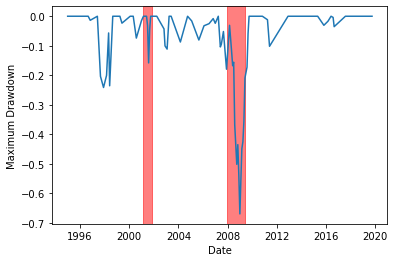

>> Average monthly return:  1.52 %
>> Monthly sharpe ratio:  0.33437668370521856
>> Annualised return:  5.51 %
>> Annualised Sharpe ratio:  0.349
>> Annualised Sharpe ratio 1:  1.158
>> Maxiumum drawdown:  [66.93873011]%
>> Maxiumum drawdown:  [66.93873011]%
>> One-month maxiumum drawdown:  [28.44832021]%
>> Skewness:  [-0.31449947]
>> Kurtosis:  [0.47115928]
>>>>>>>>>>done!>>>>>>>>>>>
UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -88.45 %


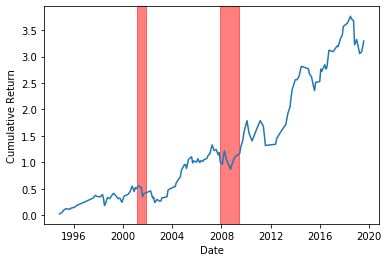

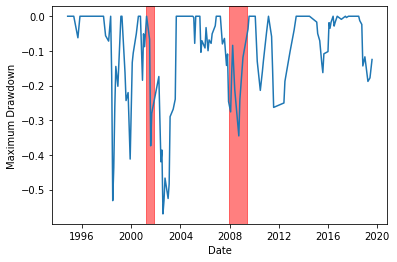

>> Average monthly return:  1.07 %
>> Monthly sharpe ratio:  0.24971611941446473
>> Annualised return:  6.0 %
>> Annualised Sharpe ratio:  0.405
>> Annualised Sharpe ratio 1:  0.865
>> Maxiumum drawdown:  [57.00009546]%
>> Maxiumum drawdown:  [57.00009546]%
>> One-month maxiumum drawdown:  [43.3496814]%
>> Skewness:  [-0.7352222]
>> Kurtosis:  [0.31455113]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -66.12 %


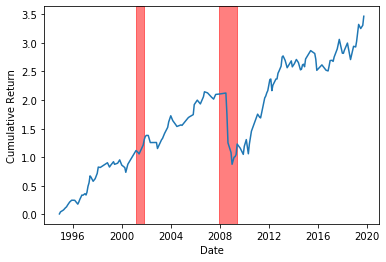

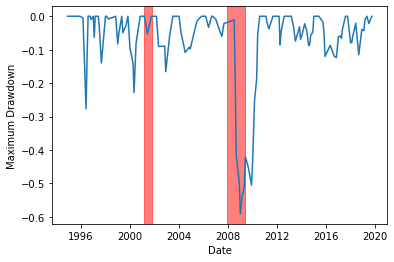

>> Average monthly return:  1.1 %
>> Monthly sharpe ratio:  0.2535734153537133
>> Annualised return:  6.17 %
>> Annualised Sharpe ratio:  0.412
>> Annualised Sharpe ratio 1:  0.878
>> Maxiumum drawdown:  [59.11628554]%
>> Maxiumum drawdown:  [59.11628554]%
>> One-month maxiumum drawdown:  [28.39395173]%
>> Skewness:  [-0.83341078]
>> Kurtosis:  [2.56553755]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  1.62 %


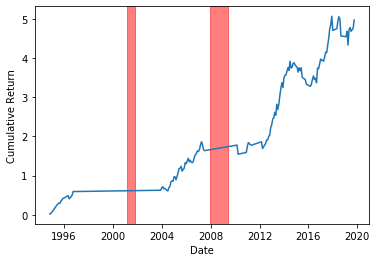

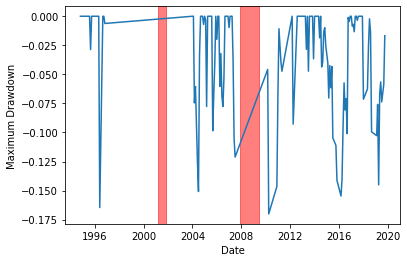

>> Average monthly return:  1.25 %
>> Monthly sharpe ratio:  0.39663663451518893
>> Annualised return:  7.41 %
>> Annualised Sharpe ratio:  0.68
>> Annualised Sharpe ratio 1:  1.374
>> Maxiumum drawdown:  [17.00989852]%
>> Maxiumum drawdown:  [17.00989852]%
>> One-month maxiumum drawdown:  [16.46220694]%
>> Skewness:  [-0.49694652]
>> Kurtosis:  [0.31660124]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -109.98 %


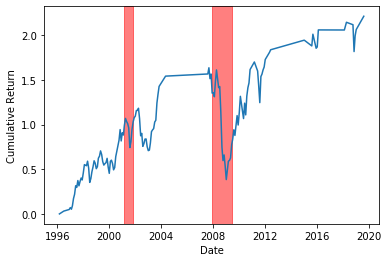

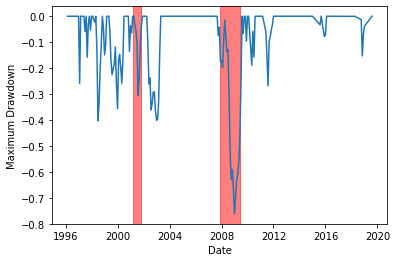

>> Average monthly return:  0.92 %
>> Monthly sharpe ratio:  0.1764439507800486
>> Annualised return:  4.78 %
>> Annualised Sharpe ratio:  0.265
>> Annualised Sharpe ratio 1:  0.611
>> Maxiumum drawdown:  [76.20283142]%
>> Maxiumum drawdown:  [76.20283142]%
>> One-month maxiumum drawdown:  [33.99310127]%
>> Skewness:  [-0.71674882]
>> Kurtosis:  [0.63218872]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -51.11 %


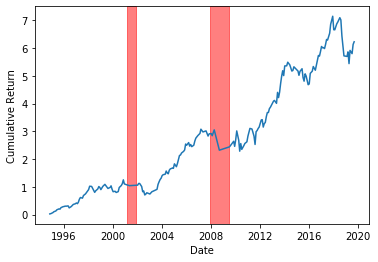

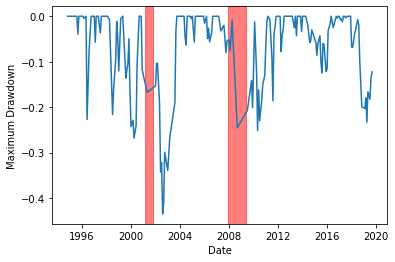

>> Average monthly return:  1.06 %
>> Monthly sharpe ratio:  0.25276909042469714
>> Annualised return:  8.23 %
>> Annualised Sharpe ratio:  0.568
>> Annualised Sharpe ratio 1:  0.876
>> Maxiumum drawdown:  [43.51347808]%
>> Maxiumum drawdown:  [43.51347808]%
>> One-month maxiumum drawdown:  [23.97518378]%
>> Skewness:  [-0.87773859]
>> Kurtosis:  [2.07764992]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -127.59 %


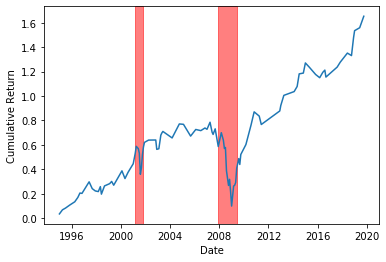

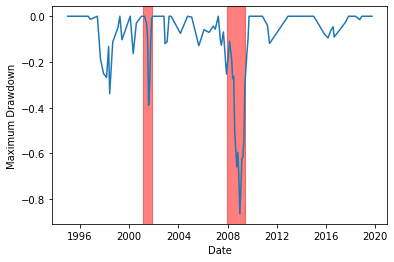

>> Average monthly return:  1.14 %
>> Monthly sharpe ratio:  0.24993282155995686
>> Annualised return:  3.98 %
>> Annualised Sharpe ratio:  0.253
>> Annualised Sharpe ratio 1:  0.866
>> Maxiumum drawdown:  [86.47340456]%
>> Maxiumum drawdown:  [86.47340456]%
>> One-month maxiumum drawdown:  [54.94405754]%
>> Skewness:  [-0.62780981]
>> Kurtosis:  [0.41956474]
>>>>>>>>>>done!>>>>>>>>>>>
UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -0.36 %


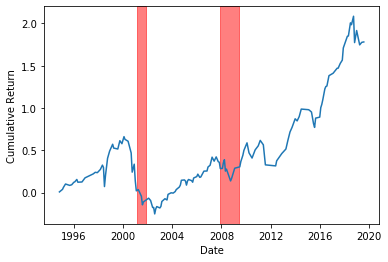

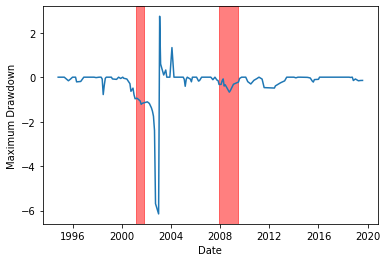

>> Average monthly return:  0.81 %
>> Monthly sharpe ratio:  0.1623376721640047
>> Annualised return:  4.18 %
>> Annualised Sharpe ratio:  0.241
>> Annualised Sharpe ratio 1:  0.562
>> Maxiumum drawdown:  [614.81460891]%
>> Maxiumum drawdown:  [614.81460891]%
>> One-month maxiumum drawdown:  [223.89200712]%
>> Skewness:  [-1.0932272]
>> Kurtosis:  [1.70479914]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.87 %


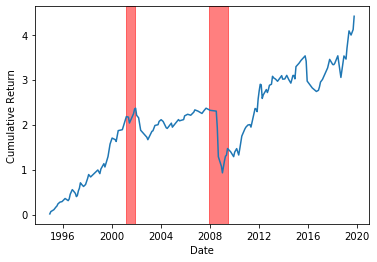

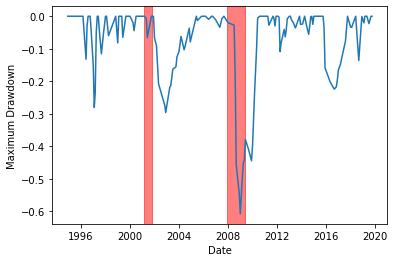

>> Average monthly return:  1.26 %
>> Monthly sharpe ratio:  0.25024346975115114
>> Annualised return:  6.99 %
>> Annualised Sharpe ratio:  0.401
>> Annualised Sharpe ratio 1:  0.867
>> Maxiumum drawdown:  [60.78780007]%
>> Maxiumum drawdown:  [60.78780007]%
>> One-month maxiumum drawdown:  [33.14097455]%
>> Skewness:  [-0.54276574]
>> Kurtosis:  [2.70068016]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.93 %


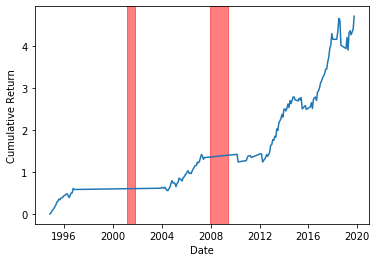

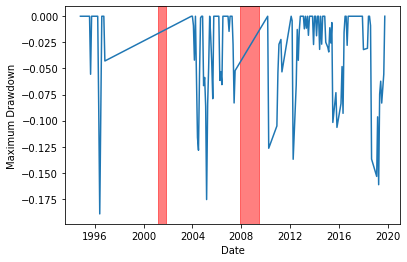

>> Average monthly return:  1.22 %
>> Monthly sharpe ratio:  0.39045206253068804
>> Annualised return:  7.22 %
>> Annualised Sharpe ratio:  0.669
>> Annualised Sharpe ratio 1:  1.353
>> Maxiumum drawdown:  [18.93472166]%
>> Maxiumum drawdown:  [18.93472166]%
>> One-month maxiumum drawdown:  [13.31982109]%
>> Skewness:  [-0.63601395]
>> Kurtosis:  [1.26567179]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -0.04 %


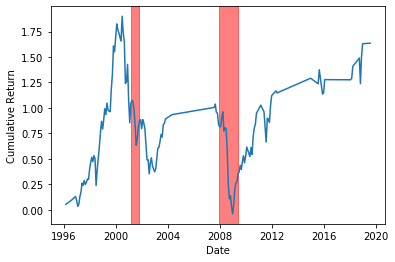

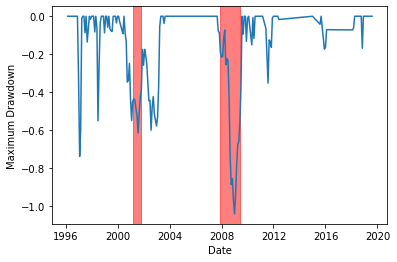

>> Average monthly return:  0.86 %
>> Monthly sharpe ratio:  0.13405837223828085
>> Annualised return:  3.95 %
>> Annualised Sharpe ratio:  0.179
>> Annualised Sharpe ratio 1:  0.464
>> Maxiumum drawdown:  [104.27299516]%
>> Maxiumum drawdown:  [104.27299516]%
>> One-month maxiumum drawdown:  [231.39218615]%
>> Skewness:  [-0.65429618]
>> Kurtosis:  [0.70095487]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -0.06 %


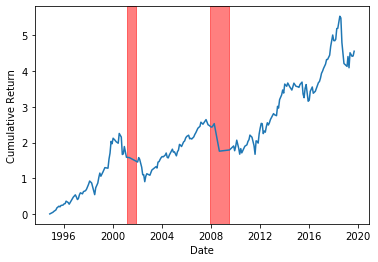

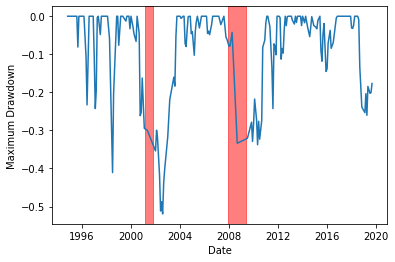

>> Average monthly return:  0.96 %
>> Monthly sharpe ratio:  0.19566256543439234
>> Annualised return:  7.1 %
>> Annualised Sharpe ratio:  0.416
>> Annualised Sharpe ratio 1:  0.678
>> Maxiumum drawdown:  [51.94142569]%
>> Maxiumum drawdown:  [51.94142569]%
>> One-month maxiumum drawdown:  [37.41737476]%
>> Skewness:  [-0.97744981]
>> Kurtosis:  [3.05840858]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.82 %


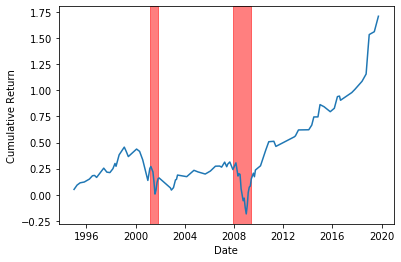

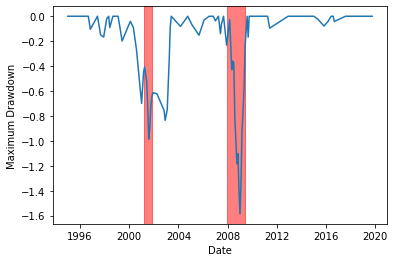

>> Average monthly return:  1.19 %
>> Monthly sharpe ratio:  0.22791916421268632
>> Annualised return:  4.07 %
>> Annualised Sharpe ratio:  0.225
>> Annualised Sharpe ratio 1:  0.79
>> Maxiumum drawdown:  [158.64204991]%
>> Maxiumum drawdown:  [158.64204991]%
>> One-month maxiumum drawdown:  [199.40172988]%
>> Skewness:  [-0.52113722]
>> Kurtosis:  [0.75229361]
>>>>>>>>>>done!>>>>>>>>>>>
UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.13 %


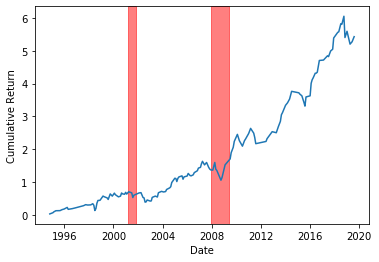

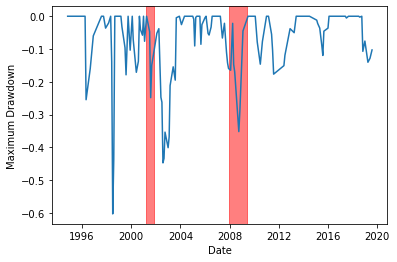

>> Average monthly return:  1.35 %
>> Monthly sharpe ratio:  0.2972620504882446
>> Annualised return:  7.73 %
>> Annualised Sharpe ratio:  0.491
>> Annualised Sharpe ratio 1:  1.03
>> Maxiumum drawdown:  [60.2889259]%
>> Maxiumum drawdown:  [60.2889259]%
>> One-month maxiumum drawdown:  [53.89330674]%
>> Skewness:  [-0.17548785]
>> Kurtosis:  [1.62857731]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -1.15 %


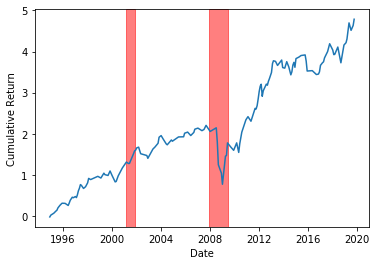

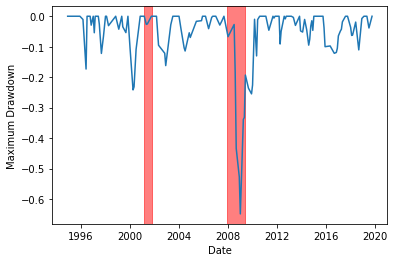

>> Average monthly return:  1.3 %
>> Monthly sharpe ratio:  0.2607389795325518
>> Annualised return:  7.27 %
>> Annualised Sharpe ratio:  0.421
>> Annualised Sharpe ratio 1:  0.903
>> Maxiumum drawdown:  [64.88907583]%
>> Maxiumum drawdown:  [64.88907583]%
>> One-month maxiumum drawdown:  [30.57203861]%
>> Skewness:  [0.02880899]
>> Kurtosis:  [4.89112665]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  1.45 %


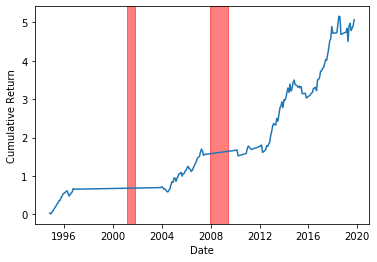

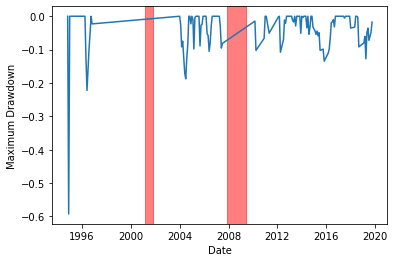

>> Average monthly return:  1.25 %
>> Monthly sharpe ratio:  0.41891925658795387
>> Annualised return:  7.48 %
>> Annualised Sharpe ratio:  0.721
>> Annualised Sharpe ratio 1:  1.451
>> Maxiumum drawdown:  [59.23538139]%
>> Maxiumum drawdown:  [59.23538139]%
>> One-month maxiumum drawdown:  [59.23538139]%
>> Skewness:  [-0.5519546]
>> Kurtosis:  [0.05993434]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -1.3 %


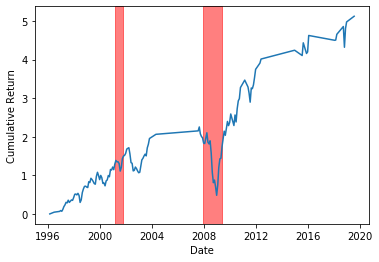

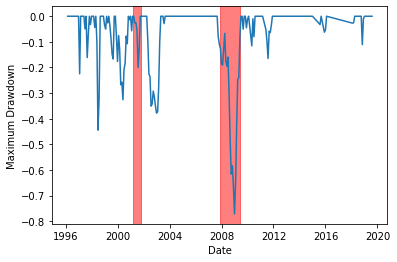

>> Average monthly return:  1.4 %
>> Monthly sharpe ratio:  0.23100577180639162
>> Annualised return:  7.52 %
>> Annualised Sharpe ratio:  0.359
>> Annualised Sharpe ratio 1:  0.8
>> Maxiumum drawdown:  [77.15922859]%
>> Maxiumum drawdown:  [77.15922859]%
>> One-month maxiumum drawdown:  [38.12707299]%
>> Skewness:  [-0.01955095]
>> Kurtosis:  [1.92852905]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -1.05 %


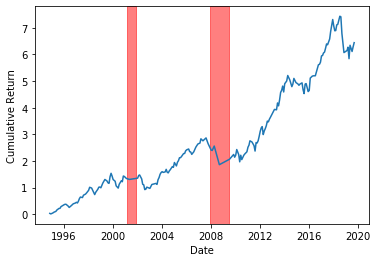

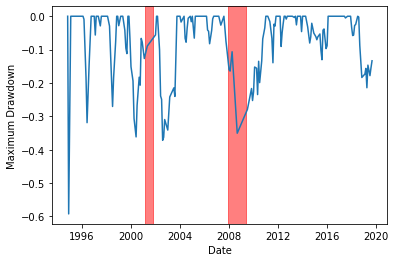

>> Average monthly return:  1.08 %
>> Monthly sharpe ratio:  0.2518711037971892
>> Annualised return:  8.36 %
>> Annualised Sharpe ratio:  0.565
>> Annualised Sharpe ratio 1:  0.873
>> Maxiumum drawdown:  [59.23538139]%
>> Maxiumum drawdown:  [59.23538139]%
>> One-month maxiumum drawdown:  [59.23538139]%
>> Skewness:  [-0.85950983]
>> Kurtosis:  [2.29362264]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.54 %


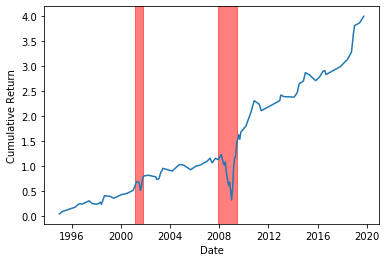

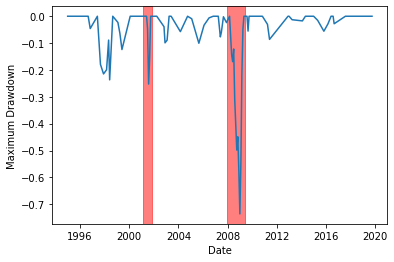

>> Average monthly return:  1.86 %
>> Monthly sharpe ratio:  0.32887734040855293
>> Annualised return:  6.65 %
>> Annualised Sharpe ratio:  0.339
>> Annualised Sharpe ratio 1:  1.139
>> Maxiumum drawdown:  [73.61464884]%
>> Maxiumum drawdown:  [73.61464884]%
>> One-month maxiumum drawdown:  [38.19063355]%
>> Skewness:  [0.5715696]
>> Kurtosis:  [3.47985702]
>>>>>>>>>>done!>>>>>>>>>>>
UMCSENTx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -0.17 %


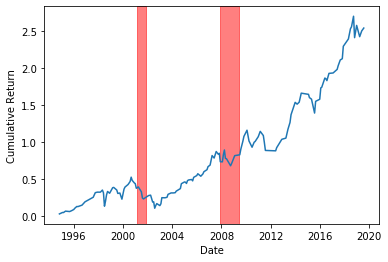

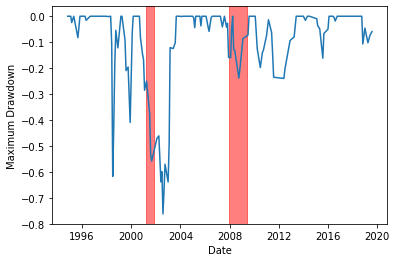

>> Average monthly return:  0.91 %
>> Monthly sharpe ratio:  0.2561465868382339
>> Annualised return:  5.18 %
>> Annualised Sharpe ratio:  0.422
>> Annualised Sharpe ratio 1:  0.887
>> Maxiumum drawdown:  [76.23533214]%
>> Maxiumum drawdown:  [76.23533214]%
>> One-month maxiumum drawdown:  [57.18951051]%
>> Skewness:  [-0.75882552]
>> Kurtosis:  [1.62242914]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.97 %


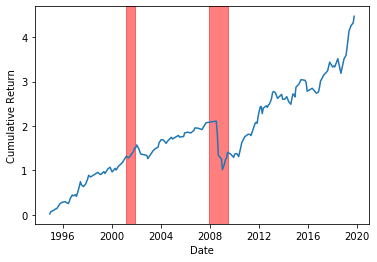

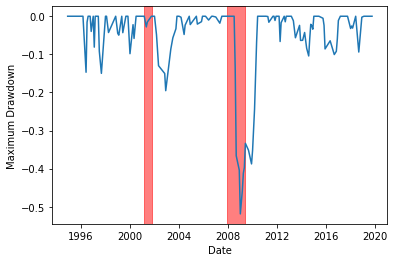

>> Average monthly return:  1.21 %
>> Monthly sharpe ratio:  0.32536468244210975
>> Annualised return:  7.04 %
>> Annualised Sharpe ratio:  0.546
>> Annualised Sharpe ratio 1:  1.127
>> Maxiumum drawdown:  [51.89369148]%
>> Maxiumum drawdown:  [51.89369148]%
>> One-month maxiumum drawdown:  [26.75043347]%
>> Skewness:  [-1.09429597]
>> Kurtosis:  [3.83335725]
>>>>>>>>>>done!>>>>>>>>>>>
VXOCLSx
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  1.15 %


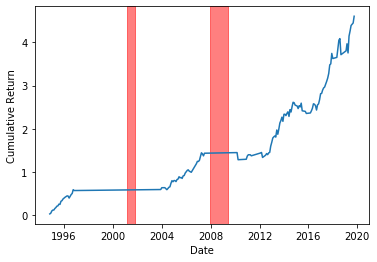

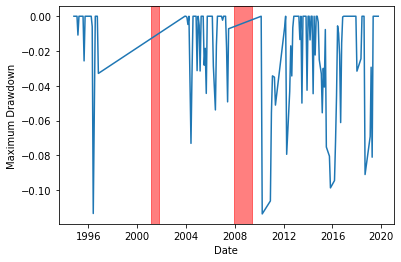

>> Average monthly return:  1.19 %
>> Monthly sharpe ratio:  0.4785745210786264
>> Annualised return:  7.14 %
>> Annualised Sharpe ratio:  0.831
>> Annualised Sharpe ratio 1:  1.658
>> Maxiumum drawdown:  [11.37375045]%
>> Maxiumum drawdown:  [11.37375045]%
>> One-month maxiumum drawdown:  [11.37375045]%
>> Skewness:  [-0.45710514]
>> Kurtosis:  [1.08952449]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.08 %


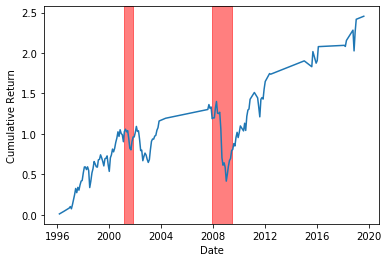

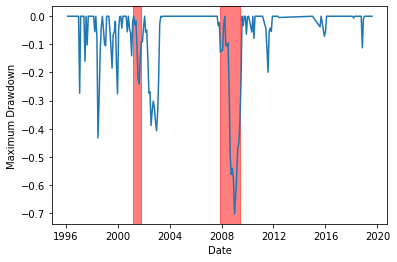

>> Average monthly return:  0.93 %
>> Monthly sharpe ratio:  0.207019149962615
>> Annualised return:  5.08 %
>> Annualised Sharpe ratio:  0.326
>> Annualised Sharpe ratio 1:  0.717
>> Maxiumum drawdown:  [70.33156261]%
>> Maxiumum drawdown:  [70.33156261]%
>> One-month maxiumum drawdown:  [38.65842034]%
>> Skewness:  [-0.84459813]
>> Kurtosis:  [1.44390527]
>>>>>>>>>>done!>>>>>>>>>>>
UNRATE
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.12 %


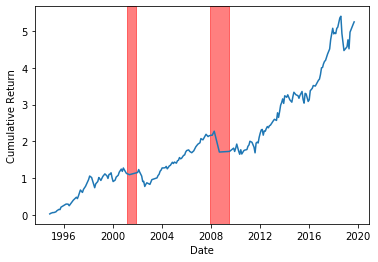

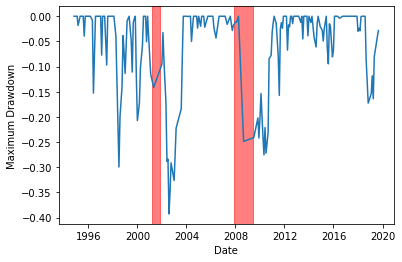

>> Average monthly return:  0.96 %
>> Monthly sharpe ratio:  0.269031697554358
>> Annualised return:  7.6 %
>> Annualised Sharpe ratio:  0.613
>> Annualised Sharpe ratio 1:  0.932
>> Maxiumum drawdown:  [39.28147271]%
>> Maxiumum drawdown:  [39.28147271]%
>> One-month maxiumum drawdown:  [27.11240128]%
>> Skewness:  [-1.2205218]
>> Kurtosis:  [3.75839754]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.91 %


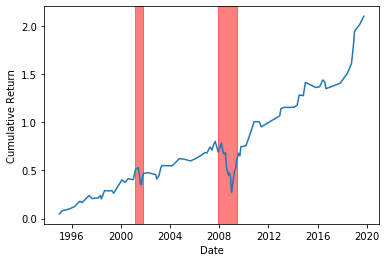

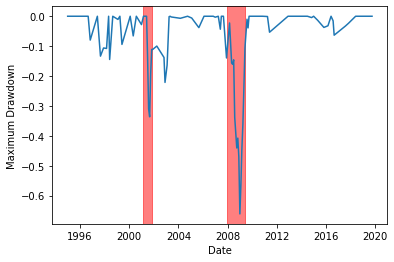

>> Average monthly return:  1.27 %
>> Monthly sharpe ratio:  0.33774071854233473
>> Annualised return:  4.63 %
>> Annualised Sharpe ratio:  0.356
>> Annualised Sharpe ratio 1:  1.17
>> Maxiumum drawdown:  [66.11053166]%
>> Maxiumum drawdown:  [66.11053166]%
>> One-month maxiumum drawdown:  [36.03503907]%
>> Skewness:  [-0.39946906]
>> Kurtosis:  [0.85250251]
>>>>>>>>>>done!>>>>>>>>>>>


In [243]:
for df in ml_df_list:
    for anomaly in anomalies_list:
        print(anomaly)
        df_2_low, df_2_high = get_anomaly_low_high(macro_ts, df, anomaly)
        print('>>>>>>>>>>low>>>>>>>>>>>')
        get_oos_rquared(df_2_low)
        get_cumulative_return(df_2_low, 10, value_weighted = True)
        print('>>>>>>>>>>high>>>>>>>>>>>')
        get_oos_rquared(df_2_high)
        get_cumulative_return(df_2_high, 10, value_weighted = True)
        print('>>>>>>>>>>done!>>>>>>>>>>>')

>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -2.9481522828534376e+24 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

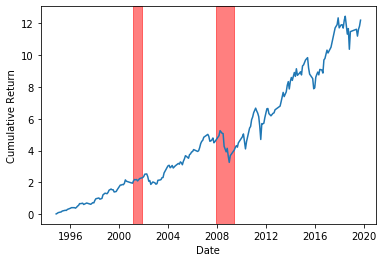

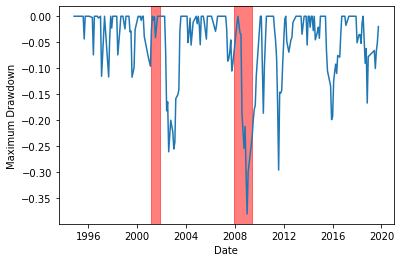

>> Average monthly return:  1.27 %
>> Monthly sharpe ratio:  0.2899115568586758
>> Annualised return:  10.87 %
>> Annualised Sharpe ratio:  0.716
>> Annualised Sharpe ratio 1:  1.004
>> Maxiumum drawdown:  [38.00418803]%
>> Maxiumum drawdown:  [38.00418803]%
>> One-month maxiumum drawdown:  [15.94840442]%
>> Skewness:  [-0.36146004]
>> Kurtosis:  [1.36980916]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -1.7141233566788653e+24 %


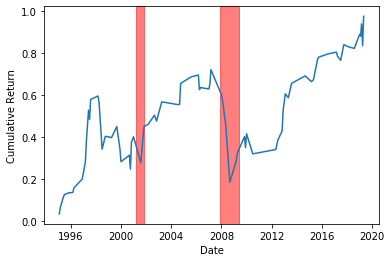

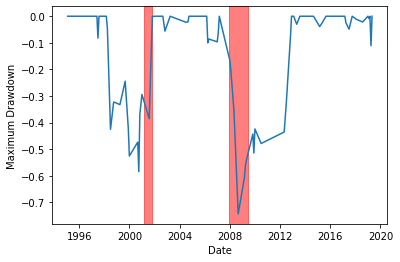

>> Average monthly return:  1.0 %
>> Monthly sharpe ratio:  0.1982551848857102
>> Annualised return:  2.76 %
>> Annualised Sharpe ratio:  0.159
>> Annualised Sharpe ratio 1:  0.687
>> Maxiumum drawdown:  [74.34735587]%
>> Maxiumum drawdown:  [74.34735587]%
>> One-month maxiumum drawdown:  [60.13020394]%
>> Skewness:  [-1.14404209]
>> Kurtosis:  [3.08825056]
>>>>>>>>>>done!>>>>>>>>>>>
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.75 %


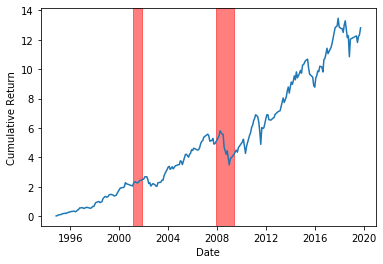

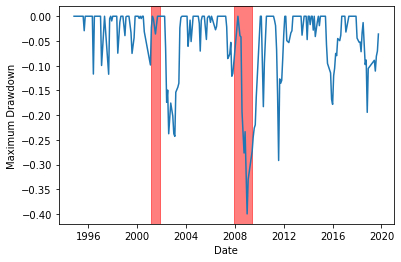

>> Average monthly return:  1.29 %
>> Monthly sharpe ratio:  0.289510450073699
>> Annualised return:  11.07 %
>> Annualised Sharpe ratio:  0.715
>> Annualised Sharpe ratio 1:  1.003
>> Maxiumum drawdown:  [39.98845816]%
>> Maxiumum drawdown:  [39.98845816]%
>> One-month maxiumum drawdown:  [15.82163673]%
>> Skewness:  [-0.26139134]
>> Kurtosis:  [1.71268719]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.57 %


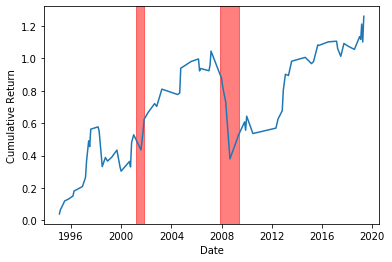

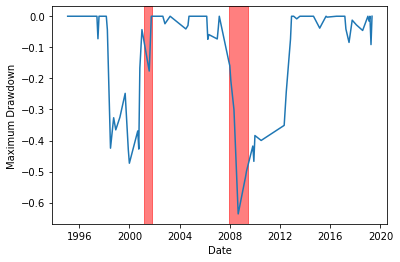

>> Average monthly return:  1.16 %
>> Monthly sharpe ratio:  0.23402231692442568
>> Annualised return:  3.31 %
>> Annualised Sharpe ratio:  0.192
>> Annualised Sharpe ratio 1:  0.811
>> Maxiumum drawdown:  [63.63037996]%
>> Maxiumum drawdown:  [63.63037996]%
>> One-month maxiumum drawdown:  [48.02338456]%
>> Skewness:  [-1.30088271]
>> Kurtosis:  [4.13814928]
>>>>>>>>>>done!>>>>>>>>>>>
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.79 %


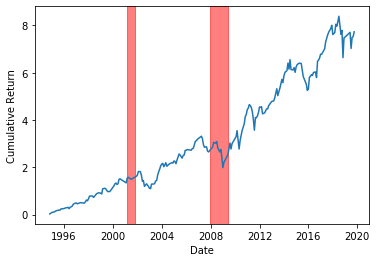

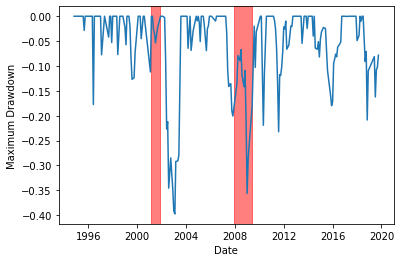

>> Average monthly return:  1.08 %
>> Monthly sharpe ratio:  0.24880563953397403
>> Annualised return:  9.05 %
>> Annualised Sharpe ratio:  0.603
>> Annualised Sharpe ratio 1:  0.862
>> Maxiumum drawdown:  [39.76042723]%
>> Maxiumum drawdown:  [39.76042723]%
>> One-month maxiumum drawdown:  [17.96579886]%
>> Skewness:  [-0.39732131]
>> Kurtosis:  [0.80746902]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.49 %


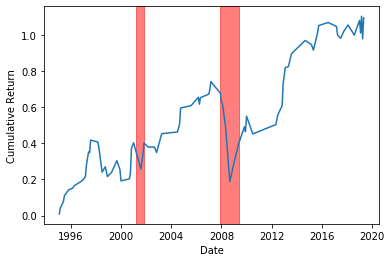

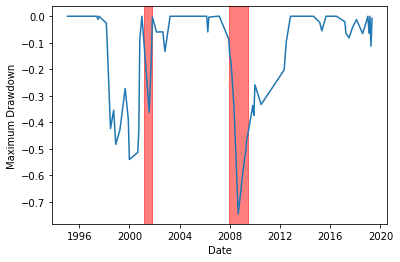

>> Average monthly return:  1.06 %
>> Monthly sharpe ratio:  0.21966543912641548
>> Annualised return:  3.0 %
>> Annualised Sharpe ratio:  0.18
>> Annualised Sharpe ratio 1:  0.761
>> Maxiumum drawdown:  [74.58525442]%
>> Maxiumum drawdown:  [74.58525442]%
>> One-month maxiumum drawdown:  [61.5282887]%
>> Skewness:  [-1.18943237]
>> Kurtosis:  [4.34369855]
>>>>>>>>>>done!>>>>>>>>>>>
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.83 %


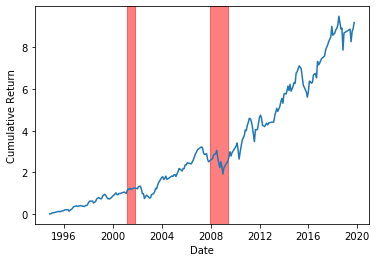

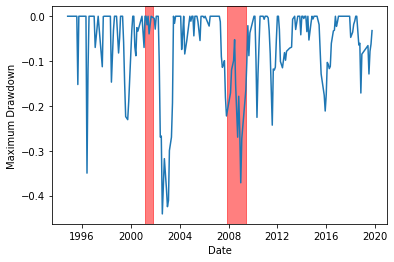

>> Average monthly return:  1.16 %
>> Monthly sharpe ratio:  0.25555534806803204
>> Annualised return:  9.73 %
>> Annualised Sharpe ratio:  0.62
>> Annualised Sharpe ratio 1:  0.885
>> Maxiumum drawdown:  [44.09479699]%
>> Maxiumum drawdown:  [44.09479699]%
>> One-month maxiumum drawdown:  [34.99736656]%
>> Skewness:  [-0.39837971]
>> Kurtosis:  [0.58642687]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.5 %


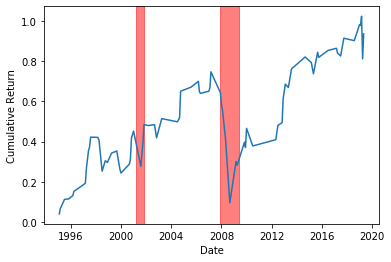

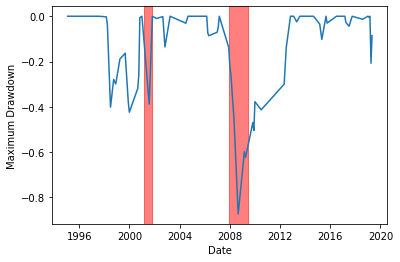

>> Average monthly return:  1.0 %
>> Monthly sharpe ratio:  0.18045079823728266
>> Annualised return:  2.68 %
>> Annualised Sharpe ratio:  0.14
>> Annualised Sharpe ratio 1:  0.625
>> Maxiumum drawdown:  [87.2580119]%
>> Maxiumum drawdown:  [87.2580119]%
>> One-month maxiumum drawdown:  [76.73210724]%
>> Skewness:  [-0.90328435]
>> Kurtosis:  [4.46634425]
>>>>>>>>>>done!>>>>>>>>>>>
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.82 %


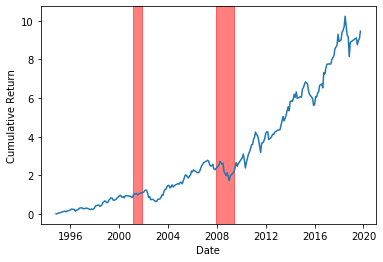

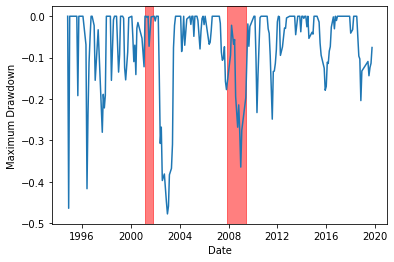

>> Average monthly return:  1.17 %
>> Monthly sharpe ratio:  0.2628892458068575
>> Annualised return:  9.84 %
>> Annualised Sharpe ratio:  0.641
>> Annualised Sharpe ratio 1:  0.911
>> Maxiumum drawdown:  [47.74930076]%
>> Maxiumum drawdown:  [47.74930076]%
>> One-month maxiumum drawdown:  [46.38986712]%
>> Skewness:  [-0.42826875]
>> Kurtosis:  [0.07031261]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.55 %


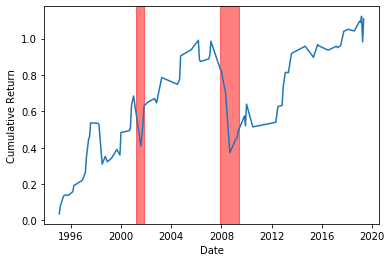

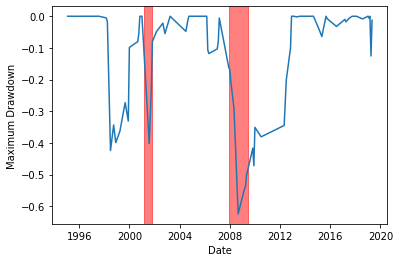

>> Average monthly return:  1.08 %
>> Monthly sharpe ratio:  0.212699863600037
>> Annualised return:  3.03 %
>> Annualised Sharpe ratio:  0.172
>> Annualised Sharpe ratio 1:  0.737
>> Maxiumum drawdown:  [62.41282966]%
>> Maxiumum drawdown:  [62.41282966]%
>> One-month maxiumum drawdown:  [47.04023105]%
>> Skewness:  [-1.61949148]
>> Kurtosis:  [4.43405072]
>>>>>>>>>>done!>>>>>>>>>>>
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.72 %


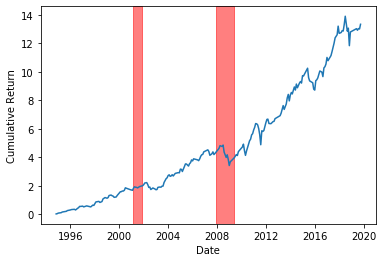

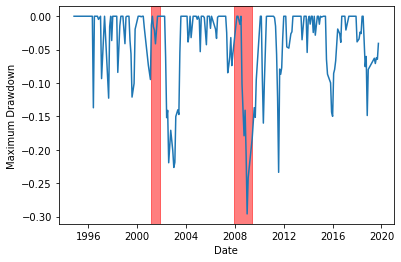

>> Average monthly return:  1.28 %
>> Monthly sharpe ratio:  0.33741021117485553
>> Annualised return:  11.24 %
>> Annualised Sharpe ratio:  0.853
>> Annualised Sharpe ratio 1:  1.169
>> Maxiumum drawdown:  [29.60445075]%
>> Maxiumum drawdown:  [29.60445075]%
>> One-month maxiumum drawdown:  [13.70960272]%
>> Skewness:  [-0.21295281]
>> Kurtosis:  [1.31977825]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.56 %


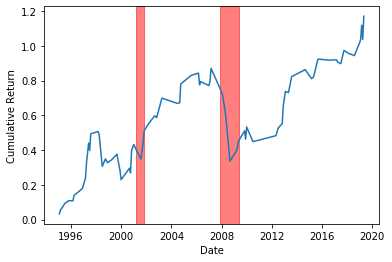

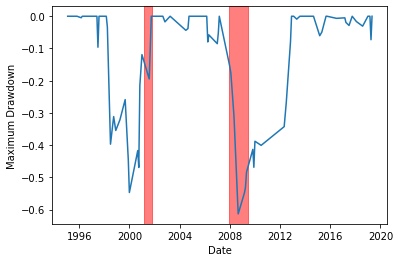

>> Average monthly return:  1.09 %
>> Monthly sharpe ratio:  0.24477891943914357
>> Annualised return:  3.15 %
>> Annualised Sharpe ratio:  0.205
>> Annualised Sharpe ratio 1:  0.848
>> Maxiumum drawdown:  [61.36367409]%
>> Maxiumum drawdown:  [61.36367409]%
>> One-month maxiumum drawdown:  [44.08244417]%
>> Skewness:  [-1.13628002]
>> Kurtosis:  [2.88413849]
>>>>>>>>>>done!>>>>>>>>>>>
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.71 %


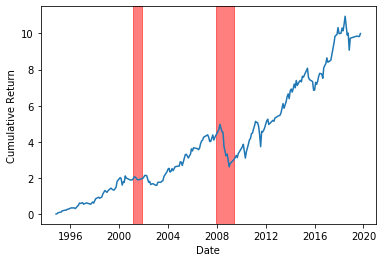

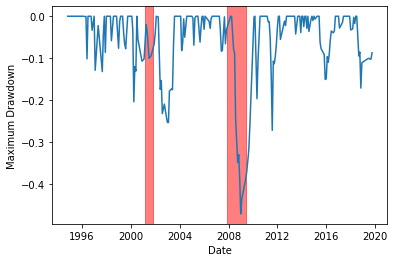

>> Average monthly return:  1.19 %
>> Monthly sharpe ratio:  0.26375384424305554
>> Annualised return:  10.06 %
>> Annualised Sharpe ratio:  0.642
>> Annualised Sharpe ratio 1:  0.914
>> Maxiumum drawdown:  [47.16915893]%
>> Maxiumum drawdown:  [47.16915893]%
>> One-month maxiumum drawdown:  [17.74430163]%
>> Skewness:  [-0.34824856]
>> Kurtosis:  [1.41128477]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.0 %


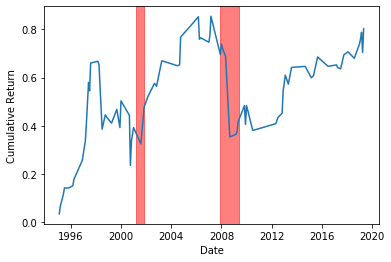

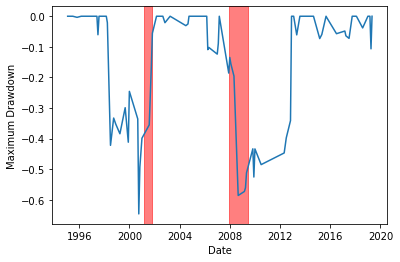

>> Average monthly return:  0.89 %
>> Monthly sharpe ratio:  0.17078307093933687
>> Annualised return:  2.38 %
>> Annualised Sharpe ratio:  0.132
>> Annualised Sharpe ratio 1:  0.592
>> Maxiumum drawdown:  [64.61876682]%
>> Maxiumum drawdown:  [64.61876682]%
>> One-month maxiumum drawdown:  [48.527477]%
>> Skewness:  [-1.45965108]
>> Kurtosis:  [3.91655898]
>>>>>>>>>>done!>>>>>>>>>>>
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.85 %


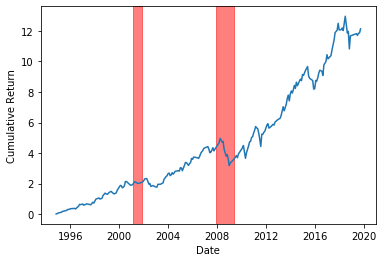

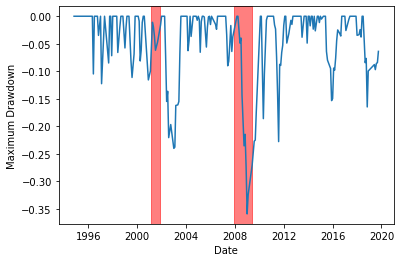

>> Average monthly return:  1.25 %
>> Monthly sharpe ratio:  0.31102896404853314
>> Annualised return:  10.85 %
>> Annualised Sharpe ratio:  0.778
>> Annualised Sharpe ratio 1:  1.077
>> Maxiumum drawdown:  [35.91738859]%
>> Maxiumum drawdown:  [35.91738859]%
>> One-month maxiumum drawdown:  [12.25650222]%
>> Skewness:  [-0.27822938]
>> Kurtosis:  [0.53649997]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.56 %


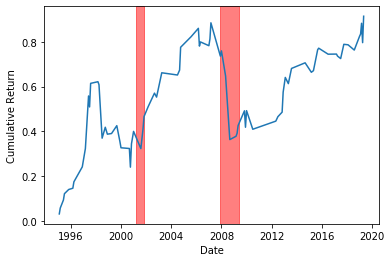

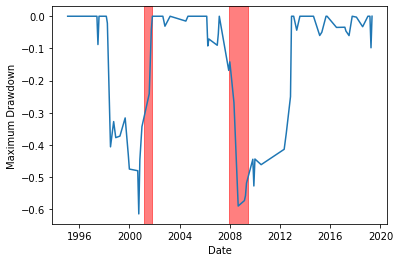

>> Average monthly return:  0.93 %
>> Monthly sharpe ratio:  0.20280339948887016
>> Annualised return:  2.63 %
>> Annualised Sharpe ratio:  0.165
>> Annualised Sharpe ratio 1:  0.703
>> Maxiumum drawdown:  [61.45481446]%
>> Maxiumum drawdown:  [61.45481446]%
>> One-month maxiumum drawdown:  [43.94273311]%
>> Skewness:  [-1.24713242]
>> Kurtosis:  [3.49521475]
>>>>>>>>>>done!>>>>>>>>>>>
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -1.42 %


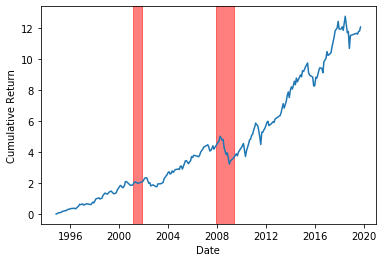

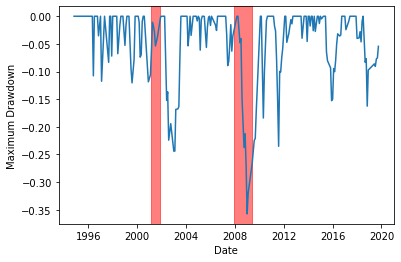

>> Average monthly return:  1.25 %
>> Monthly sharpe ratio:  0.3114866114988569
>> Annualised return:  10.83 %
>> Annualised Sharpe ratio:  0.779
>> Annualised Sharpe ratio 1:  1.079
>> Maxiumum drawdown:  [35.76051933]%
>> Maxiumum drawdown:  [35.76051933]%
>> One-month maxiumum drawdown:  [12.05200235]%
>> Skewness:  [-0.31775342]
>> Kurtosis:  [0.47211513]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -1.71 %


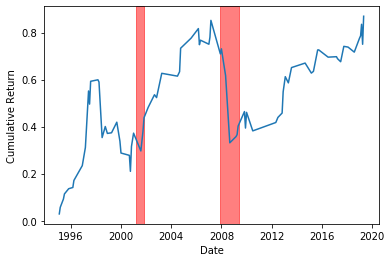

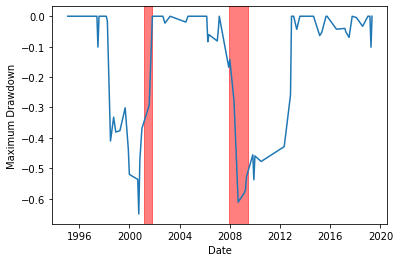

>> Average monthly return:  0.9 %
>> Monthly sharpe ratio:  0.19532372465644587
>> Annualised return:  2.53 %
>> Annualised Sharpe ratio:  0.158
>> Annualised Sharpe ratio 1:  0.677
>> Maxiumum drawdown:  [64.98622352]%
>> Maxiumum drawdown:  [64.98622352]%
>> One-month maxiumum drawdown:  [46.34898905]%
>> Skewness:  [-1.24542475]
>> Kurtosis:  [3.63027651]
>>>>>>>>>>done!>>>>>>>>>>>
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.76 %


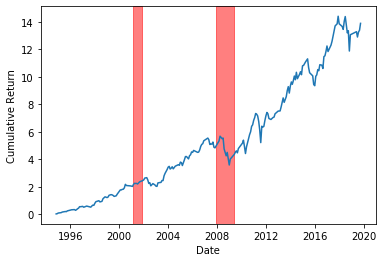

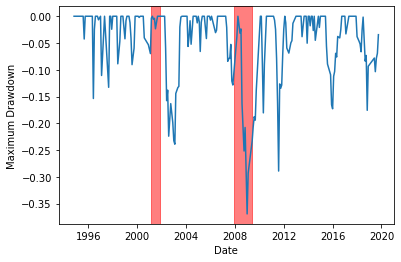

>> Average monthly return:  1.33 %
>> Monthly sharpe ratio:  0.30037089829084107
>> Annualised return:  11.4 %
>> Annualised Sharpe ratio:  0.746
>> Annualised Sharpe ratio 1:  1.041
>> Maxiumum drawdown:  [36.91816248]%
>> Maxiumum drawdown:  [36.91816248]%
>> One-month maxiumum drawdown:  [15.36271429]%
>> Skewness:  [-0.20542373]
>> Kurtosis:  [1.43110603]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.53 %


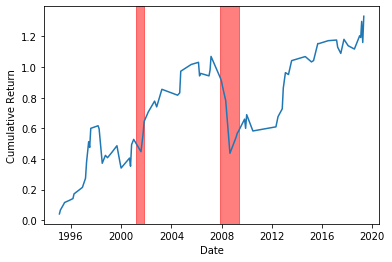

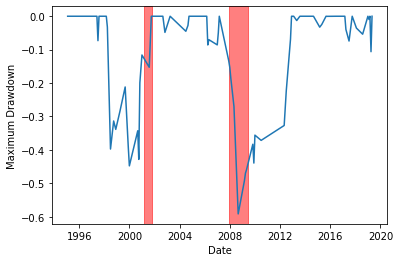

>> Average monthly return:  1.2 %
>> Monthly sharpe ratio:  0.2418335612976366
>> Annualised return:  3.44 %
>> Annualised Sharpe ratio:  0.2
>> Annualised Sharpe ratio 1:  0.838
>> Maxiumum drawdown:  [59.17094723]%
>> Maxiumum drawdown:  [59.17094723]%
>> One-month maxiumum drawdown:  [44.07049028]%
>> Skewness:  [-1.17384308]
>> Kurtosis:  [3.31779866]
>>>>>>>>>>done!>>>>>>>>>>>
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  -0.76 %


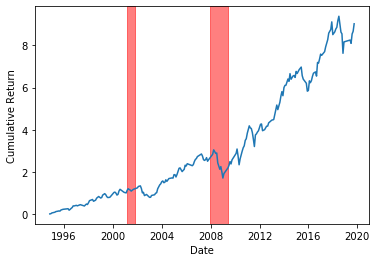

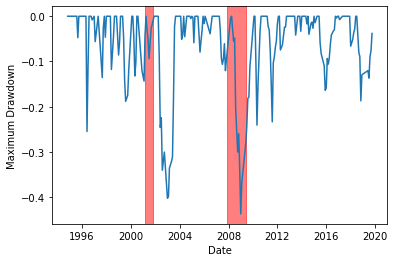

>> Average monthly return:  1.14 %
>> Monthly sharpe ratio:  0.2713515906954555
>> Annualised return:  9.66 %
>> Annualised Sharpe ratio:  0.666
>> Annualised Sharpe ratio 1:  0.94
>> Maxiumum drawdown:  [43.69550929]%
>> Maxiumum drawdown:  [43.69550929]%
>> One-month maxiumum drawdown:  [25.47387546]%
>> Skewness:  [-0.53542607]
>> Kurtosis:  [0.52360254]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -253.19 %


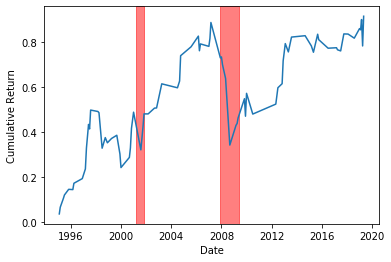

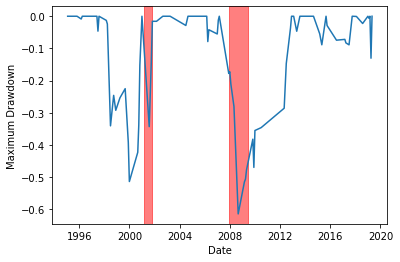

>> Average monthly return:  0.93 %
>> Monthly sharpe ratio:  0.20246528581157675
>> Annualised return:  2.63 %
>> Annualised Sharpe ratio:  0.165
>> Annualised Sharpe ratio 1:  0.701
>> Maxiumum drawdown:  [61.43813621]%
>> Maxiumum drawdown:  [61.43813621]%
>> One-month maxiumum drawdown:  [46.40680416]%
>> Skewness:  [-1.30195198]
>> Kurtosis:  [3.17874102]
>>>>>>>>>>done!>>>>>>>>>>>
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.39 %


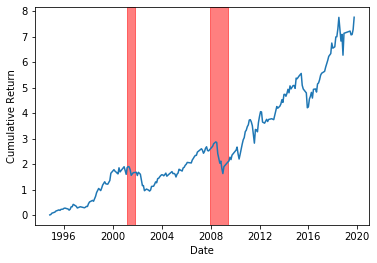

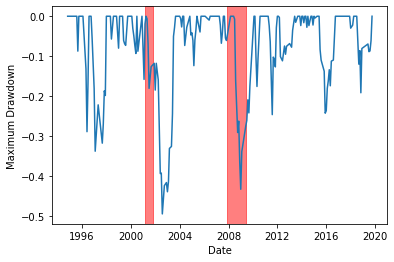

>> Average monthly return:  1.09 %
>> Monthly sharpe ratio:  0.23696824310442147
>> Annualised return:  9.07 %
>> Annualised Sharpe ratio:  0.568
>> Annualised Sharpe ratio 1:  0.821
>> Maxiumum drawdown:  [49.39832283]%
>> Maxiumum drawdown:  [49.39832283]%
>> One-month maxiumum drawdown:  [19.07873522]%
>> Skewness:  [-0.29444514]
>> Kurtosis:  [0.57563411]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -0.08 %


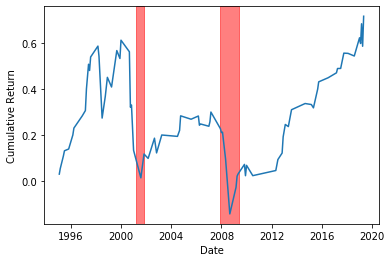

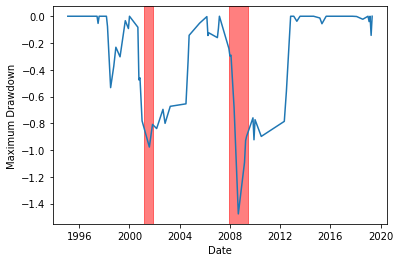

>> Average monthly return:  0.88 %
>> Monthly sharpe ratio:  0.14532803967351282
>> Annualised return:  2.19 %
>> Annualised Sharpe ratio:  0.105
>> Annualised Sharpe ratio 1:  0.503
>> Maxiumum drawdown:  [147.77799567]%
>> Maxiumum drawdown:  [147.77799567]%
>> One-month maxiumum drawdown:  [250.64555567]%
>> Skewness:  [-1.40329728]
>> Kurtosis:  [3.18276357]
>>>>>>>>>>done!>>>>>>>>>>>
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.31 %


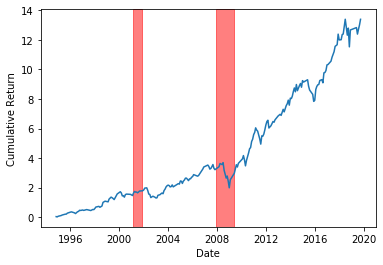

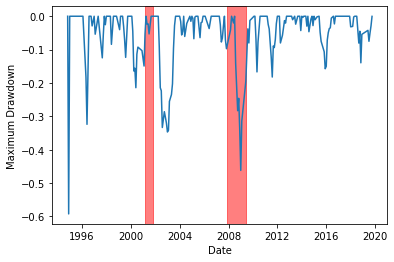

>> Average monthly return:  1.31 %
>> Monthly sharpe ratio:  0.29235015405122766
>> Annualised return:  11.26 %
>> Annualised Sharpe ratio:  0.723
>> Annualised Sharpe ratio 1:  1.013
>> Maxiumum drawdown:  [59.23538139]%
>> Maxiumum drawdown:  [59.23538139]%
>> One-month maxiumum drawdown:  [59.23538139]%
>> Skewness:  [-0.20491642]
>> Kurtosis:  [1.31878749]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  -2.35 %


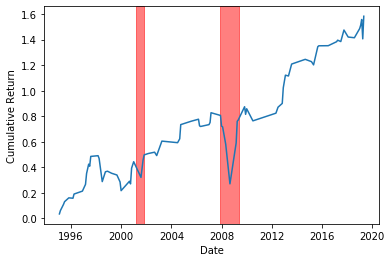

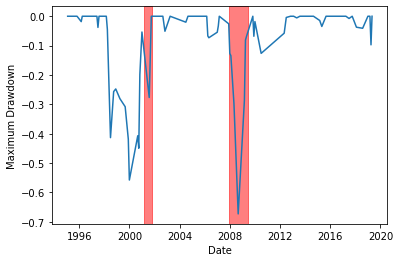

>> Average monthly return:  1.35 %
>> Monthly sharpe ratio:  0.24785655012937602
>> Annualised return:  3.87 %
>> Annualised Sharpe ratio:  0.204
>> Annualised Sharpe ratio 1:  0.859
>> Maxiumum drawdown:  [67.31884581]%
>> Maxiumum drawdown:  [67.31884581]%
>> One-month maxiumum drawdown:  [53.4628051]%
>> Skewness:  [0.16551741]
>> Kurtosis:  [6.29411667]
>>>>>>>>>>done!>>>>>>>>>>>
>>>>>>>>>>low>>>>>>>>>>>
Overall out of sample R-squared:  0.53 %


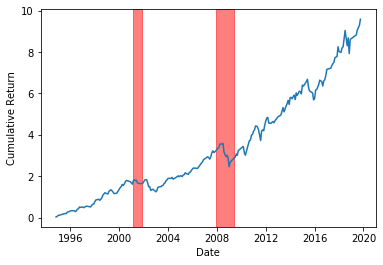

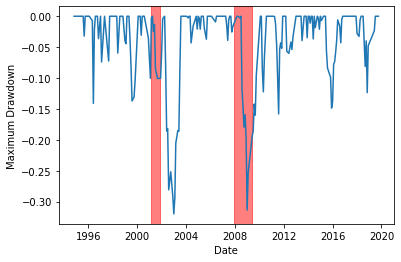

>> Average monthly return:  1.13 %
>> Monthly sharpe ratio:  0.33432156256398704
>> Annualised return:  9.9 %
>> Annualised Sharpe ratio:  0.845
>> Annualised Sharpe ratio 1:  1.158
>> Maxiumum drawdown:  [31.98486973]%
>> Maxiumum drawdown:  [31.98486973]%
>> One-month maxiumum drawdown:  [14.48030509]%
>> Skewness:  [-0.44021485]
>> Kurtosis:  [0.84955288]
>>>>>>>>>>high>>>>>>>>>>>
Overall out of sample R-squared:  0.07 %


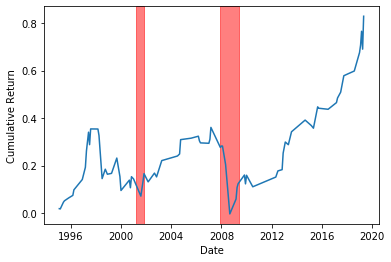

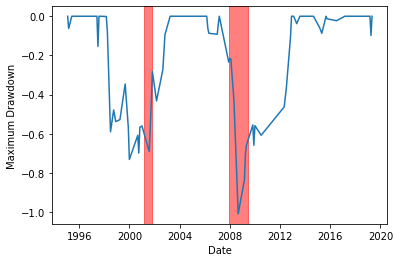

>> Average monthly return:  0.86 %
>> Monthly sharpe ratio:  0.20145771741218882
>> Annualised return:  2.44 %
>> Annualised Sharpe ratio:  0.165
>> Annualised Sharpe ratio 1:  0.698
>> Maxiumum drawdown:  [100.89063887]%
>> Maxiumum drawdown:  [100.89063887]%
>> One-month maxiumum drawdown:  [101.56797915]%
>> Skewness:  [-1.54275656]
>> Kurtosis:  [4.2732861]
>>>>>>>>>>done!>>>>>>>>>>>


In [244]:
# anomaly: 6-month momentum 

for df in ml_df_list:
    df_2_low_mom, df_2_high_mom = get_anomaly_low_high(macro_fc_cs, df, 'mom')
    print('>>>>>>>>>>low>>>>>>>>>>>')
    get_oos_rquared(df_2_low_mom)
    get_cumulative_return(df_2_low_mom, 10, value_weighted = True)
    print('>>>>>>>>>>high>>>>>>>>>>>')
    get_oos_rquared(df_2_high_mom)
    get_cumulative_return(df_2_high_mom, 10, value_weighted = True)
    print('>>>>>>>>>>done!>>>>>>>>>>>')

>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  -1.1719764041206132e+24 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

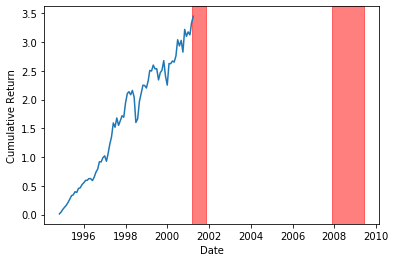

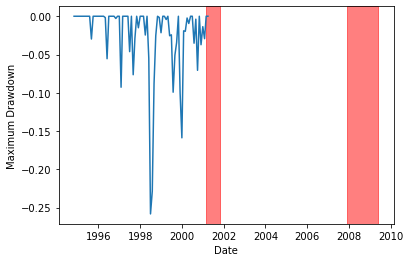

>> Average monthly return:  2.03 %
>> Monthly sharpe ratio:  0.4630561933816882
>> Annualised return:  6.16 %
>> Annualised Sharpe ratio:  0.406
>> Annualised Sharpe ratio 1:  1.604
>> Maxiumum drawdown:  [25.83419028]%
>> Maxiumum drawdown:  [25.83419028]%
>> One-month maxiumum drawdown:  [21.53592003]%
>> Skewness:  [-0.57499917]
>> Kurtosis:  [1.84475573]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  -3.5239170422821634e+24 %


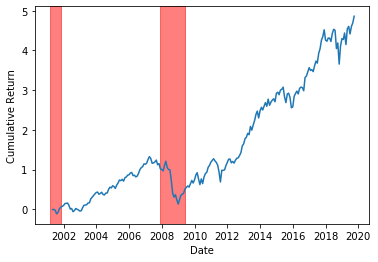

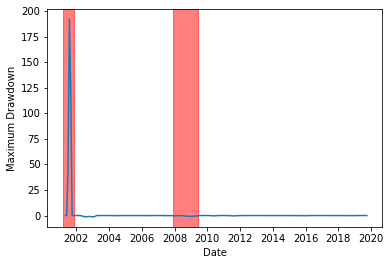

>> Average monthly return:  0.91 %
>> Monthly sharpe ratio:  0.197679314245936
>> Annualised return:  7.33 %
>> Annualised Sharpe ratio:  0.462
>> Annualised Sharpe ratio 1:  0.685
>> Maxiumum drawdown:  [136.93502633]%
>> Maxiumum drawdown:  [136.93502633]%
>> One-month maxiumum drawdown:  [810.60001537]%
>> Skewness:  [-0.66073565]
>> Kurtosis:  [2.1973095]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  -2.47100321799289e+24 %


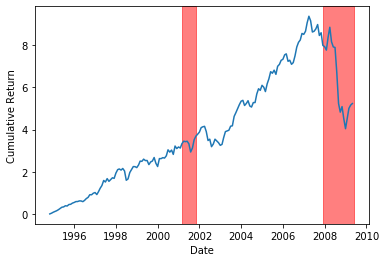

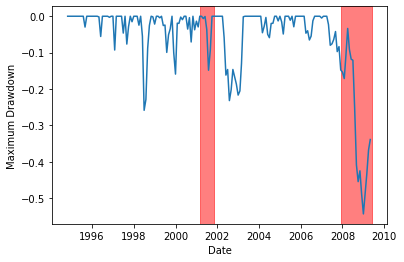

>> Average monthly return:  1.16 %
>> Monthly sharpe ratio:  0.24952753497517924
>> Annualised return:  7.59 %
>> Annualised Sharpe ratio:  0.471
>> Annualised Sharpe ratio 1:  0.864
>> Maxiumum drawdown:  [54.28273665]%
>> Maxiumum drawdown:  [54.28273665]%
>> One-month maxiumum drawdown:  [21.93270423]%
>> Skewness:  [-0.89732188]
>> Kurtosis:  [2.34518119]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  -2.850182490121784e+24 %


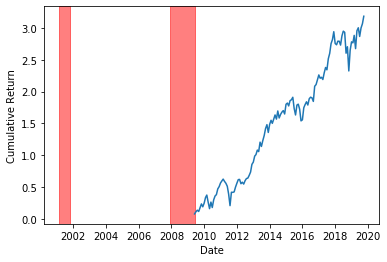

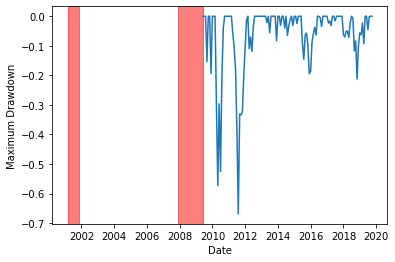

>> Average monthly return:  1.25 %
>> Monthly sharpe ratio:  0.28247107906222146
>> Annualised return:  5.89 %
>> Annualised Sharpe ratio:  0.385
>> Annualised Sharpe ratio 1:  0.979
>> Maxiumum drawdown:  [66.90680466]%
>> Maxiumum drawdown:  [66.90680466]%
>> One-month maxiumum drawdown:  [46.73425888]%
>> Skewness:  [-0.2191274]
>> Kurtosis:  [1.63977173]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  -2.1513316626182378e+24 %


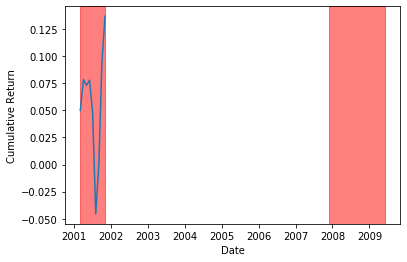

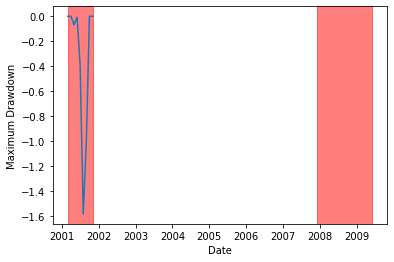

>> Average monthly return:  1.56 %
>> Monthly sharpe ratio:  0.2947109754774031
>> Annualised return:  0.51 %
>> Annualised Sharpe ratio:  0.028
>> Annualised Sharpe ratio 1:  1.021
>> Maxiumum drawdown:  [158.05556712]%
>> Maxiumum drawdown:  [158.05556712]%
>> One-month maxiumum drawdown:  [194.90683485]%
>> Skewness:  [-0.73510432]
>> Kurtosis:  [1.03471745]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -5.385077897271075e+24 %


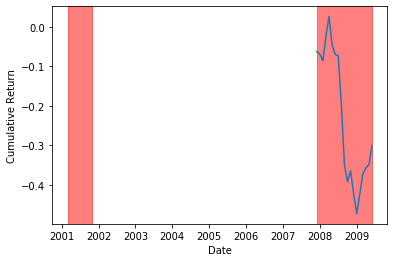

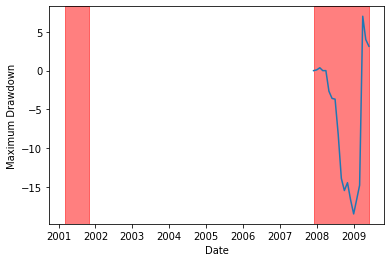

>> Average monthly return:  -1.55 %
>> Monthly sharpe ratio:  -0.19572711776171656
>> Annualised return:  -1.42 %
>> Annualised Sharpe ratio:  -0.052
>> Annualised Sharpe ratio 1:  -0.678
>> Maxiumum drawdown:  [1843.66655146]%
>> Maxiumum drawdown:  [1843.66655146]%
>> One-month maxiumum drawdown:  [264.39062302]%
>> Skewness:  [-0.47686962]
>> Kurtosis:  [-0.31729151]
>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  1.1 %


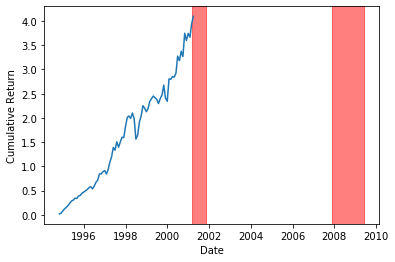

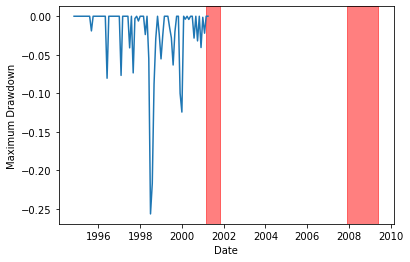

>> Average monthly return:  2.2 %
>> Monthly sharpe ratio:  0.514707329073437
>> Annualised return:  6.73 %
>> Annualised Sharpe ratio:  0.455
>> Annualised Sharpe ratio 1:  1.783
>> Maxiumum drawdown:  [25.64855521]%
>> Maxiumum drawdown:  [25.64855521]%
>> One-month maxiumum drawdown:  [21.31184538]%
>> Skewness:  [-0.40338105]
>> Kurtosis:  [2.32240924]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.42 %


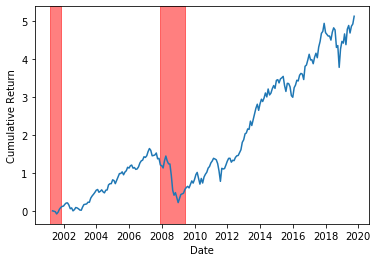

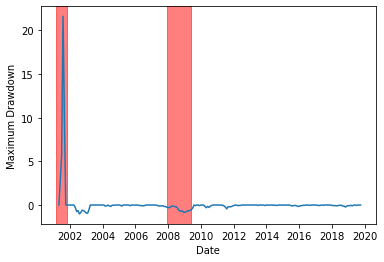

>> Average monthly return:  0.93 %
>> Monthly sharpe ratio:  0.1989151315364432
>> Annualised return:  7.51 %
>> Annualised Sharpe ratio:  0.464
>> Annualised Sharpe ratio 1:  0.689
>> Maxiumum drawdown:  [101.8932254]%
>> Maxiumum drawdown:  [101.8932254]%
>> One-month maxiumum drawdown:  [105.2623188]%
>> Skewness:  [-0.63635387]
>> Kurtosis:  [2.62170707]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  0.37 %


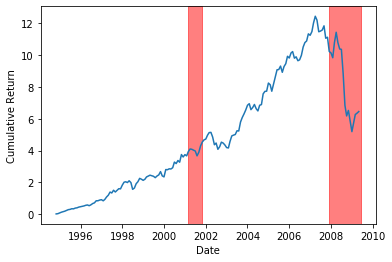

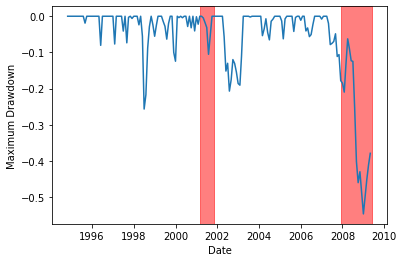

>> Average monthly return:  1.27 %
>> Monthly sharpe ratio:  0.2685468243088096
>> Annualised return:  8.36 %
>> Annualised Sharpe ratio:  0.512
>> Annualised Sharpe ratio 1:  0.93
>> Maxiumum drawdown:  [54.62300397]%
>> Maxiumum drawdown:  [54.62300397]%
>> One-month maxiumum drawdown:  [22.5605592]%
>> Skewness:  [-0.89939455]
>> Kurtosis:  [2.7363823]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  1.58 %


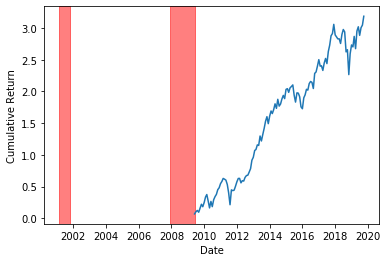

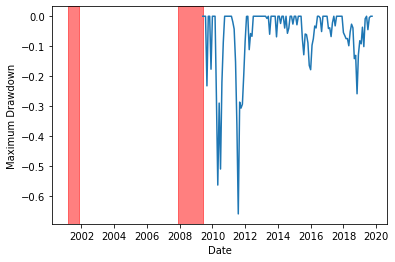

>> Average monthly return:  1.25 %
>> Monthly sharpe ratio:  0.2810337073359534
>> Annualised return:  5.89 %
>> Annualised Sharpe ratio:  0.383
>> Annualised Sharpe ratio 1:  0.974
>> Maxiumum drawdown:  [66.08096347]%
>> Maxiumum drawdown:  [66.08096347]%
>> One-month maxiumum drawdown:  [46.81426498]%
>> Skewness:  [-0.10215078]
>> Kurtosis:  [2.31251859]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  0.14 %


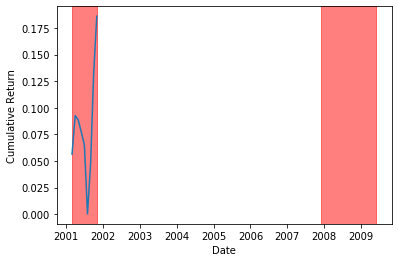

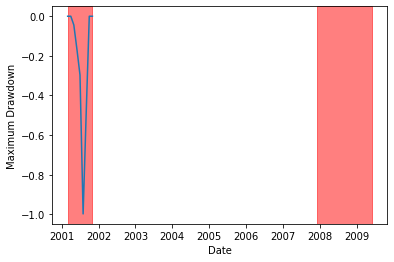

>> Average monthly return:  2.0 %
>> Monthly sharpe ratio:  0.45148899884473903
>> Annualised return:  0.68 %
>> Annualised Sharpe ratio:  0.045
>> Annualised Sharpe ratio 1:  1.564
>> Maxiumum drawdown:  [99.77492653]%
>> Maxiumum drawdown:  [99.77492653]%
>> One-month maxiumum drawdown:  [99.68005189]%
>> Skewness:  [-0.53937185]
>> Kurtosis:  [-0.31878552]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -2.02 %


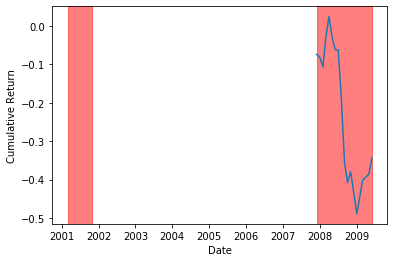

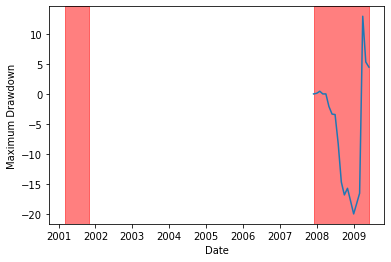

>> Average monthly return:  -1.86 %
>> Monthly sharpe ratio:  -0.22864224268326033
>> Annualised return:  -1.67 %
>> Annualised Sharpe ratio:  -0.059
>> Annualised Sharpe ratio 1:  -0.792
>> Maxiumum drawdown:  [2002.22844895]%
>> Maxiumum drawdown:  [2002.22844895]%
>> One-month maxiumum drawdown:  [209.55308172]%
>> Skewness:  [-0.50216268]
>> Kurtosis:  [-0.25451927]
>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.96 %


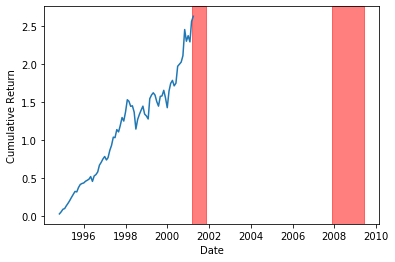

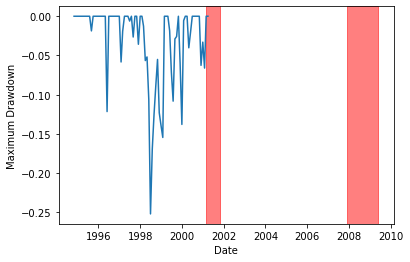

>> Average monthly return:  1.73 %
>> Monthly sharpe ratio:  0.4717031313298814
>> Annualised return:  5.28 %
>> Annualised Sharpe ratio:  0.416
>> Annualised Sharpe ratio 1:  1.634
>> Maxiumum drawdown:  [25.1924316]%
>> Maxiumum drawdown:  [25.1924316]%
>> One-month maxiumum drawdown:  [16.30150598]%
>> Skewness:  [-0.00717728]
>> Kurtosis:  [0.91266728]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.52 %


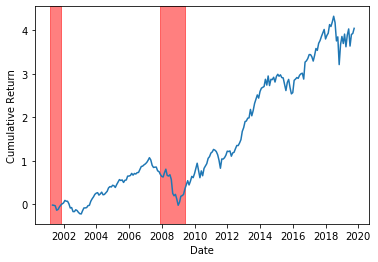

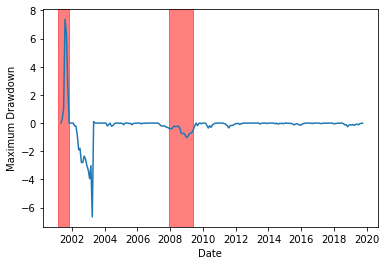

>> Average monthly return:  0.84 %
>> Monthly sharpe ratio:  0.1796624293614186
>> Annualised return:  6.69 %
>> Annualised Sharpe ratio:  0.411
>> Annualised Sharpe ratio 1:  0.622
>> Maxiumum drawdown:  [666.41405869]%
>> Maxiumum drawdown:  [666.41405869]%
>> One-month maxiumum drawdown:  [678.57684844]%
>> Skewness:  [-0.70114017]
>> Kurtosis:  [1.86755452]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  0.28 %


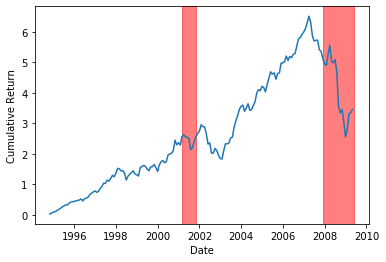

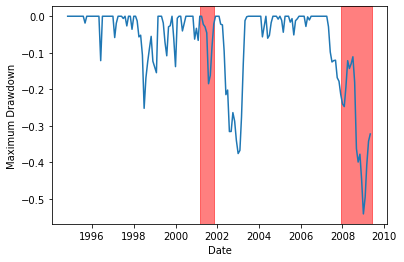

>> Average monthly return:  0.96 %
>> Monthly sharpe ratio:  0.21534769246252586
>> Annualised return:  6.16 %
>> Annualised Sharpe ratio:  0.4
>> Annualised Sharpe ratio 1:  0.746
>> Maxiumum drawdown:  [54.08272389]%
>> Maxiumum drawdown:  [54.08272389]%
>> One-month maxiumum drawdown:  [24.56118172]%
>> Skewness:  [-0.86787177]
>> Kurtosis:  [3.10783933]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  1.83 %


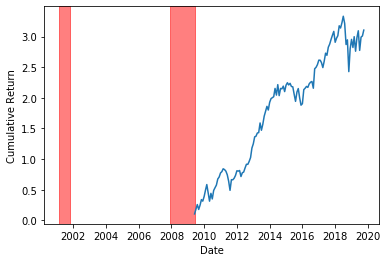

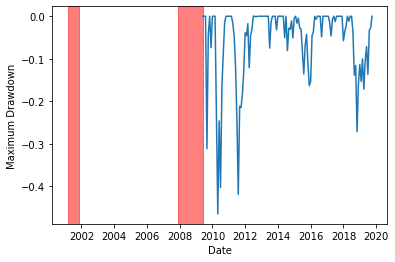

>> Average monthly return:  1.24 %
>> Monthly sharpe ratio:  0.27508977716359084
>> Annualised return:  5.81 %
>> Annualised Sharpe ratio:  0.373
>> Annualised Sharpe ratio 1:  0.953
>> Maxiumum drawdown:  [46.44575437]%
>> Maxiumum drawdown:  [46.44575437]%
>> One-month maxiumum drawdown:  [31.12318262]%
>> Skewness:  [-0.37216658]
>> Kurtosis:  [0.54661425]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  0.09 %


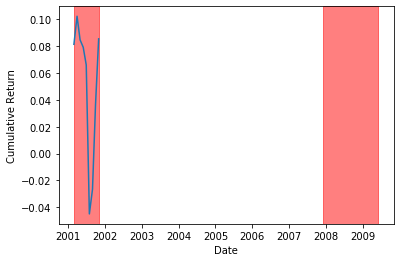

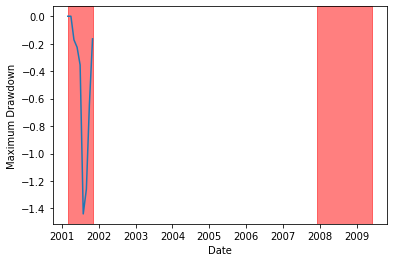

>> Average monthly return:  1.05 %
>> Monthly sharpe ratio:  0.19165318391030903
>> Annualised return:  0.33 %
>> Annualised Sharpe ratio:  0.017
>> Annualised Sharpe ratio 1:  0.664
>> Maxiumum drawdown:  [143.99659278]%
>> Maxiumum drawdown:  [143.99659278]%
>> One-month maxiumum drawdown:  [168.16745419]%
>> Skewness:  [-0.94739025]
>> Kurtosis:  [1.61713178]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -1.85 %


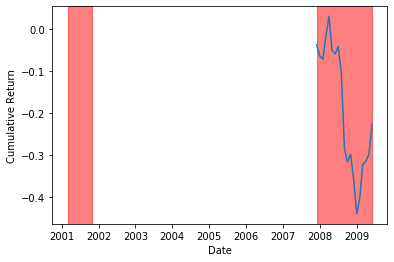

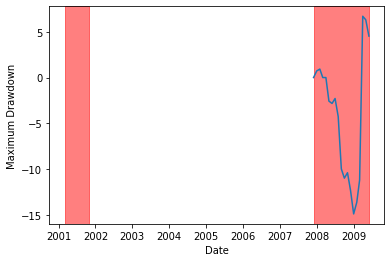

>> Average monthly return:  -1.02 %
>> Monthly sharpe ratio:  -0.12551031115646785
>> Annualised return:  -1.02 %
>> Annualised Sharpe ratio:  -0.036
>> Annualised Sharpe ratio 1:  -0.435
>> Maxiumum drawdown:  [1491.55903481]%
>> Maxiumum drawdown:  [1491.55903481]%
>> One-month maxiumum drawdown:  [257.88392251]%
>> Skewness:  [-0.51011894]
>> Kurtosis:  [0.49622583]
>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.96 %


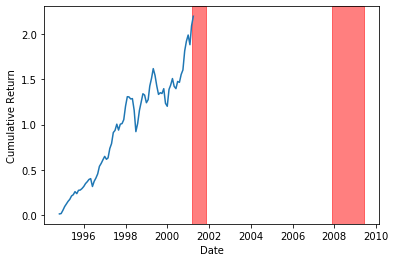

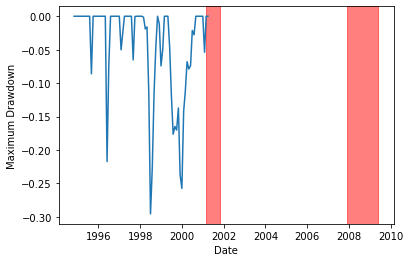

>> Average monthly return:  1.57 %
>> Monthly sharpe ratio:  0.4374431646076848
>> Annualised return:  4.76 %
>> Annualised Sharpe ratio:  0.384
>> Annualised Sharpe ratio 1:  1.515
>> Maxiumum drawdown:  [29.56447618]%
>> Maxiumum drawdown:  [29.56447618]%
>> One-month maxiumum drawdown:  [21.73564083]%
>> Skewness:  [-0.78703392]
>> Kurtosis:  [1.30255013]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.57 %


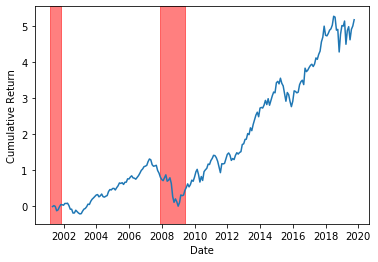

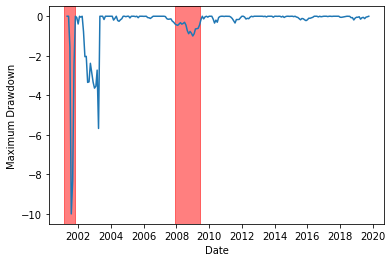

>> Average monthly return:  0.96 %
>> Monthly sharpe ratio:  0.18545449287980956
>> Annualised return:  7.55 %
>> Annualised Sharpe ratio:  0.422
>> Annualised Sharpe ratio 1:  0.642
>> Maxiumum drawdown:  [1000.48752521]%
>> Maxiumum drawdown:  [1000.48752521]%
>> One-month maxiumum drawdown:  [580.59712216]%
>> Skewness:  [-0.52226102]
>> Kurtosis:  [2.07419108]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  0.3 %


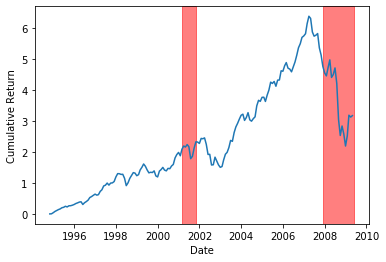

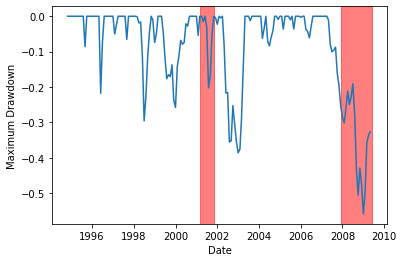

>> Average monthly return:  0.94 %
>> Monthly sharpe ratio:  0.19141930471216603
>> Annualised return:  5.89 %
>> Annualised Sharpe ratio:  0.344
>> Annualised Sharpe ratio 1:  0.663
>> Maxiumum drawdown:  [55.81521562]%
>> Maxiumum drawdown:  [55.81521562]%
>> One-month maxiumum drawdown:  [27.58661934]%
>> Skewness:  [-0.85112258]
>> Kurtosis:  [3.38497257]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  1.88 %


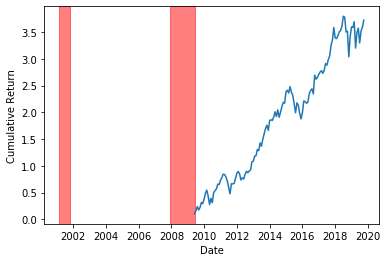

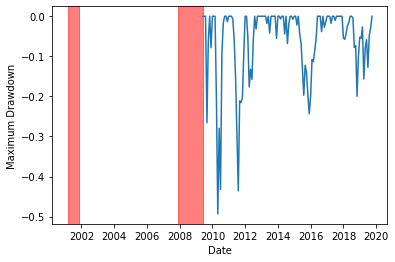

>> Average monthly return:  1.35 %
>> Monthly sharpe ratio:  0.29326852742124
>> Annualised return:  6.41 %
>> Annualised Sharpe ratio:  0.4
>> Annualised Sharpe ratio 1:  1.016
>> Maxiumum drawdown:  [49.32077142]%
>> Maxiumum drawdown:  [49.32077142]%
>> One-month maxiumum drawdown:  [35.81548446]%
>> Skewness:  [-0.16828279]
>> Kurtosis:  [0.38685558]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  0.23 %


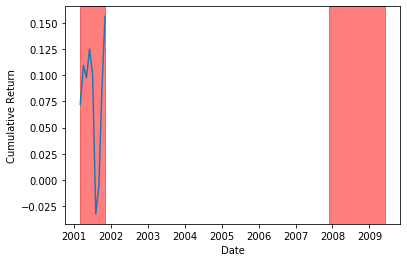

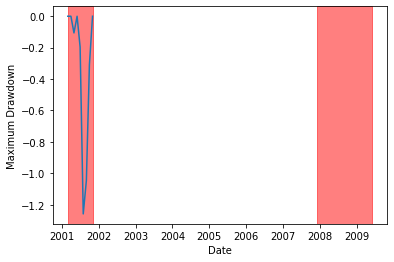

>> Average monthly return:  1.81 %
>> Monthly sharpe ratio:  0.28349879546992823
>> Annualised return:  0.58 %
>> Annualised Sharpe ratio:  0.026
>> Annualised Sharpe ratio 1:  0.982
>> Maxiumum drawdown:  [125.86826647]%
>> Maxiumum drawdown:  [125.86826647]%
>> One-month maxiumum drawdown:  [132.17331983]%
>> Skewness:  [-1.28145046]
>> Kurtosis:  [2.13838515]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -1.78 %


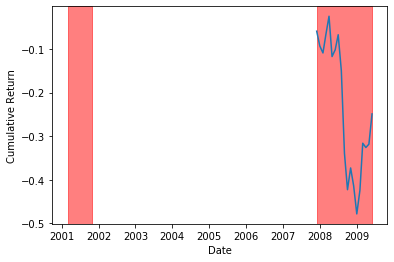

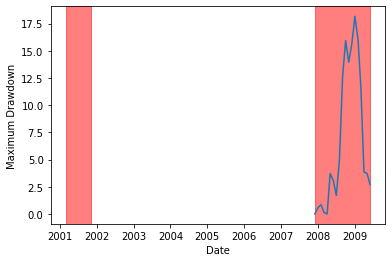

>> Average monthly return:  -1.03 %
>> Monthly sharpe ratio:  -0.10538361629003885
>> Annualised return:  -1.14 %
>> Annualised Sharpe ratio:  -0.034
>> Annualised Sharpe ratio 1:  -0.365
>> Maxiumum drawdown:  [-0.]%
>> Maxiumum drawdown:  [-0.]%
>> One-month maxiumum drawdown:  [-0.]%
>> Skewness:  [-0.09793514]
>> Kurtosis:  [0.17174056]
>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  1.03 %


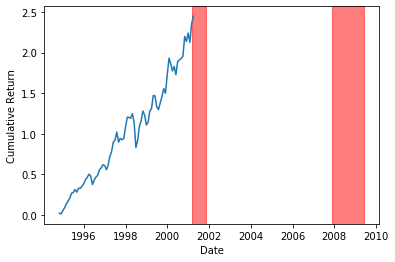

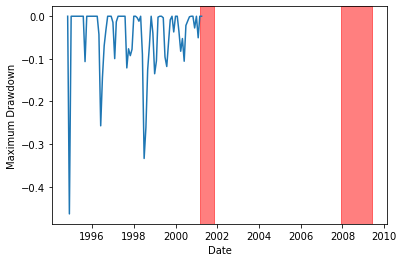

>> Average monthly return:  1.68 %
>> Monthly sharpe ratio:  0.4122037771479707
>> Annualised return:  5.08 %
>> Annualised Sharpe ratio:  0.359
>> Annualised Sharpe ratio 1:  1.428
>> Maxiumum drawdown:  [46.38986712]%
>> Maxiumum drawdown:  [46.38986712]%
>> One-month maxiumum drawdown:  [46.38986712]%
>> Skewness:  [-0.91168416]
>> Kurtosis:  [1.99413797]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.54 %


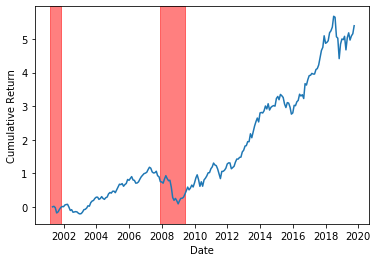

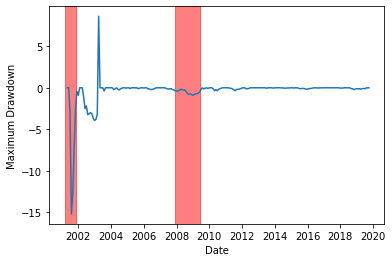

>> Average monthly return:  0.96 %
>> Monthly sharpe ratio:  0.20002701804878184
>> Annualised return:  7.71 %
>> Annualised Sharpe ratio:  0.466
>> Annualised Sharpe ratio 1:  0.693
>> Maxiumum drawdown:  [1520.70513199]%
>> Maxiumum drawdown:  [1520.70513199]%
>> One-month maxiumum drawdown:  [292.99510168]%
>> Skewness:  [-0.80066979]
>> Kurtosis:  [1.607977]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  0.33 %


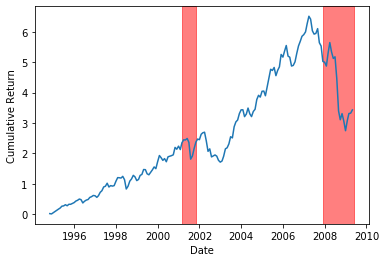

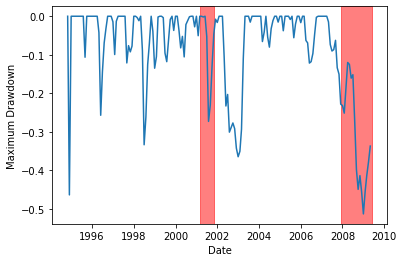

>> Average monthly return:  0.97 %
>> Monthly sharpe ratio:  0.20349398075792094
>> Annualised return:  6.14 %
>> Annualised Sharpe ratio:  0.371
>> Annualised Sharpe ratio 1:  0.705
>> Maxiumum drawdown:  [51.32797706]%
>> Maxiumum drawdown:  [51.32797706]%
>> One-month maxiumum drawdown:  [46.38986712]%
>> Skewness:  [-1.09448108]
>> Kurtosis:  [2.3314439]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  1.86 %


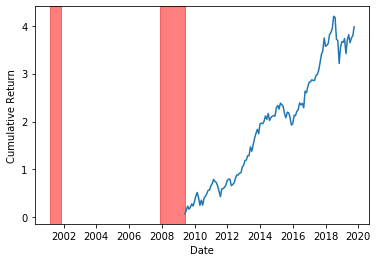

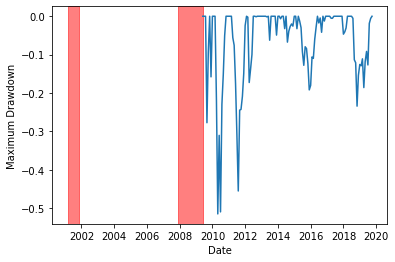

>> Average monthly return:  1.39 %
>> Monthly sharpe ratio:  0.3166378393392178
>> Annualised return:  6.63 %
>> Annualised Sharpe ratio:  0.437
>> Annualised Sharpe ratio 1:  1.097
>> Maxiumum drawdown:  [51.49544093]%
>> Maxiumum drawdown:  [51.49544093]%
>> One-month maxiumum drawdown:  [37.90472927]%
>> Skewness:  [-0.36568693]
>> Kurtosis:  [0.32293639]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  0.14 %


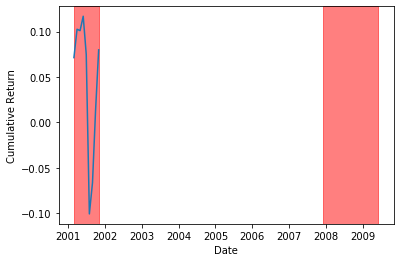

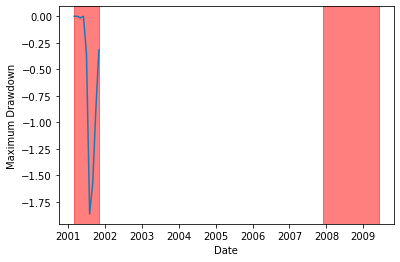

>> Average monthly return:  1.13 %
>> Monthly sharpe ratio:  0.14884285923419122
>> Annualised return:  0.31 %
>> Annualised Sharpe ratio:  0.012
>> Annualised Sharpe ratio 1:  0.516
>> Maxiumum drawdown:  [186.22620043]%
>> Maxiumum drawdown:  [186.22620043]%
>> One-month maxiumum drawdown:  [234.47693559]%
>> Skewness:  [-1.70807098]
>> Kurtosis:  [3.39870733]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -1.89 %


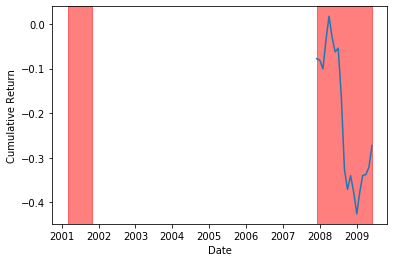

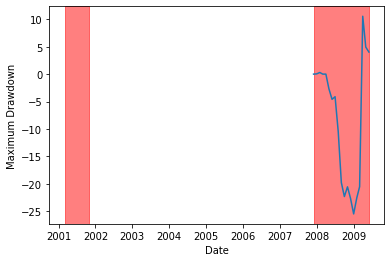

>> Average monthly return:  -1.39 %
>> Monthly sharpe ratio:  -0.1874482163280376
>> Annualised return:  -1.27 %
>> Annualised Sharpe ratio:  -0.049
>> Annualised Sharpe ratio 1:  -0.649
>> Maxiumum drawdown:  [2549.86670237]%
>> Maxiumum drawdown:  [2549.86670237]%
>> One-month maxiumum drawdown:  [268.05871452]%
>> Skewness:  [-0.66988915]
>> Kurtosis:  [0.29472771]
>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.99 %


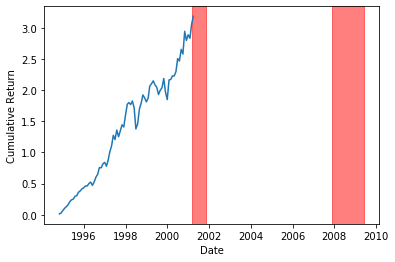

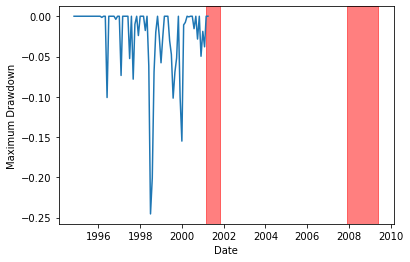

>> Average monthly return:  1.93 %
>> Monthly sharpe ratio:  0.48554805700192927
>> Annualised return:  5.89 %
>> Annualised Sharpe ratio:  0.428
>> Annualised Sharpe ratio 1:  1.682
>> Maxiumum drawdown:  [24.54101413]%
>> Maxiumum drawdown:  [24.54101413]%
>> One-month maxiumum drawdown:  [19.59524715]%
>> Skewness:  [-0.48254773]
>> Kurtosis:  [1.40831154]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.45 %


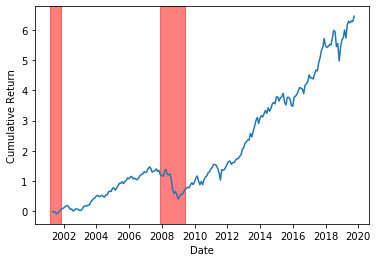

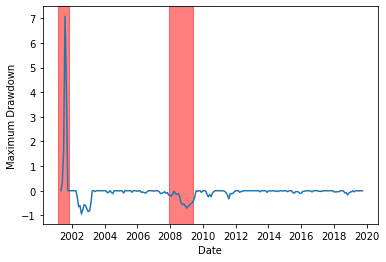

>> Average monthly return:  0.99 %
>> Monthly sharpe ratio:  0.2495374350374167
>> Annualised return:  8.36 %
>> Annualised Sharpe ratio:  0.61
>> Annualised Sharpe ratio 1:  0.864
>> Maxiumum drawdown:  [94.12972133]%
>> Maxiumum drawdown:  [94.12972133]%
>> One-month maxiumum drawdown:  [85.1508269]%
>> Skewness:  [-0.59237639]
>> Kurtosis:  [2.30071388]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  0.41 %


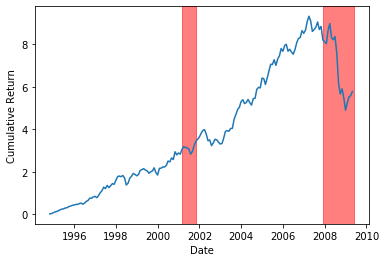

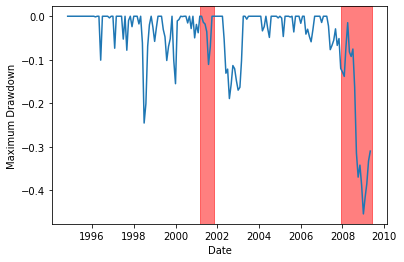

>> Average monthly return:  1.18 %
>> Monthly sharpe ratio:  0.2895187069577158
>> Annualised return:  7.96 %
>> Annualised Sharpe ratio:  0.562
>> Annualised Sharpe ratio 1:  1.003
>> Maxiumum drawdown:  [45.42336278]%
>> Maxiumum drawdown:  [45.42336278]%
>> One-month maxiumum drawdown:  [19.59524715]%
>> Skewness:  [-0.79438246]
>> Kurtosis:  [1.96239229]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  1.37 %


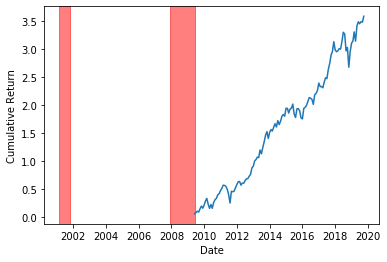

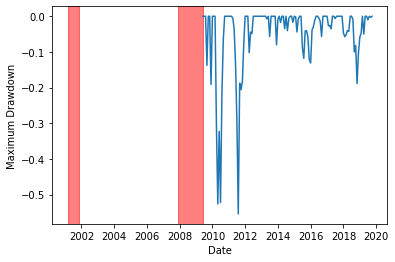

>> Average monthly return:  1.3 %
>> Monthly sharpe ratio:  0.33975150550908534
>> Annualised return:  6.29 %
>> Annualised Sharpe ratio:  0.475
>> Annualised Sharpe ratio 1:  1.177
>> Maxiumum drawdown:  [55.41564554]%
>> Maxiumum drawdown:  [55.41564554]%
>> One-month maxiumum drawdown:  [37.07983126]%
>> Skewness:  [-0.12798169]
>> Kurtosis:  [2.09105266]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  0.15 %


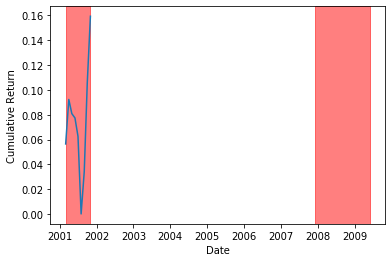

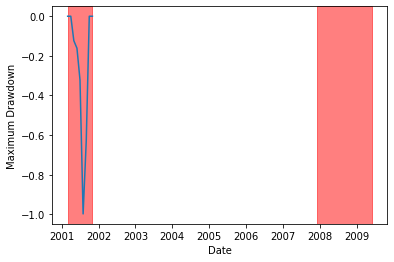

>> Average monthly return:  1.73 %
>> Monthly sharpe ratio:  0.41856885739859645
>> Annualised return:  0.59 %
>> Annualised Sharpe ratio:  0.041
>> Annualised Sharpe ratio 1:  1.45
>> Maxiumum drawdown:  [99.80912771]%
>> Maxiumum drawdown:  [99.80912771]%
>> One-month maxiumum drawdown:  [99.71868742]%
>> Skewness:  [-0.59394866]
>> Kurtosis:  [-0.37360973]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -1.62 %


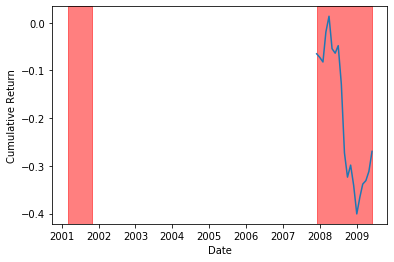

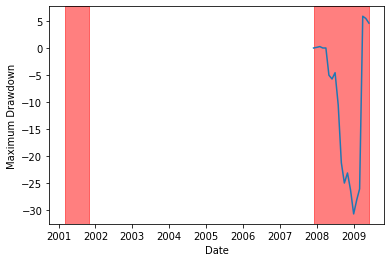

>> Average monthly return:  -1.44 %
>> Monthly sharpe ratio:  -0.22420982701316
>> Annualised return:  -1.25 %
>> Annualised Sharpe ratio:  -0.056
>> Annualised Sharpe ratio 1:  -0.777
>> Maxiumum drawdown:  [3068.91394866]%
>> Maxiumum drawdown:  [3068.91394866]%
>> One-month maxiumum drawdown:  [503.19118288]%
>> Skewness:  [-0.6705442]
>> Kurtosis:  [-0.13898946]
>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  1.11 %


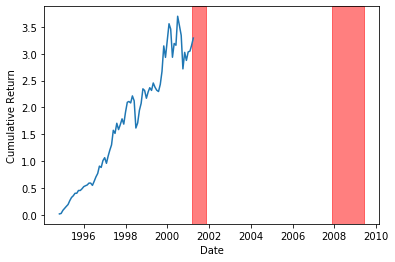

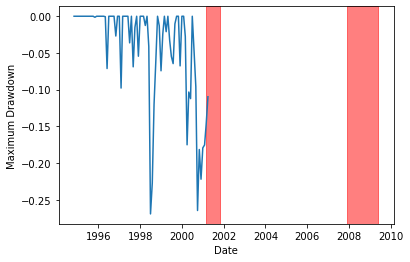

>> Average monthly return:  2.02 %
>> Monthly sharpe ratio:  0.38329083247009443
>> Annualised return:  6.0 %
>> Annualised Sharpe ratio:  0.328
>> Annualised Sharpe ratio 1:  1.328
>> Maxiumum drawdown:  [26.93380342]%
>> Maxiumum drawdown:  [26.93380342]%
>> One-month maxiumum drawdown:  [23.7967676]%
>> Skewness:  [-0.87035967]
>> Kurtosis:  [2.02708827]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.07 %


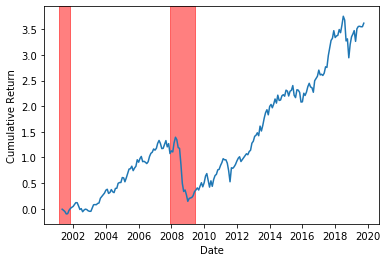

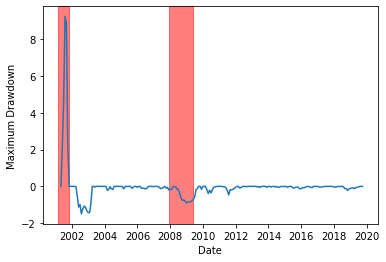

>> Average monthly return:  0.79 %
>> Monthly sharpe ratio:  0.1779733317985675
>> Annualised return:  6.31 %
>> Annualised Sharpe ratio:  0.409
>> Annualised Sharpe ratio 1:  0.617
>> Maxiumum drawdown:  [149.9416379]%
>> Maxiumum drawdown:  [149.9416379]%
>> One-month maxiumum drawdown:  [4868.78783458]%
>> Skewness:  [-0.78012396]
>> Kurtosis:  [2.88060902]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  -0.15 %


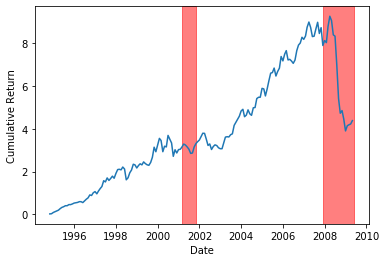

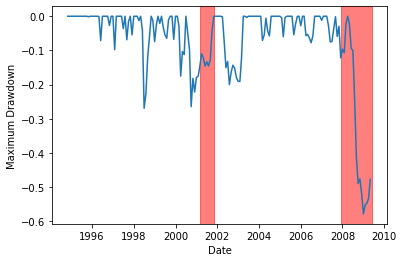

>> Average monthly return:  1.1 %
>> Monthly sharpe ratio:  0.21689904152279038
>> Annualised return:  6.97 %
>> Annualised Sharpe ratio:  0.397
>> Annualised Sharpe ratio 1:  0.751
>> Maxiumum drawdown:  [57.86535472]%
>> Maxiumum drawdown:  [57.86535472]%
>> One-month maxiumum drawdown:  [23.7967676]%
>> Skewness:  [-0.97463202]
>> Kurtosis:  [2.31488173]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  2.24 %


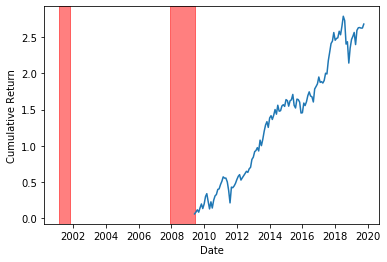

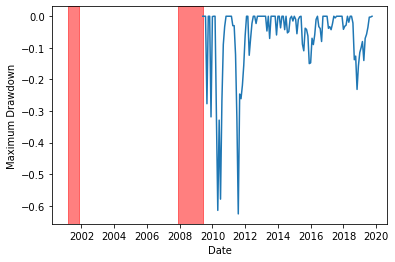

>> Average monthly return:  1.13 %
>> Monthly sharpe ratio:  0.27175006901902055
>> Annualised return:  5.35 %
>> Annualised Sharpe ratio:  0.37
>> Annualised Sharpe ratio 1:  0.941
>> Maxiumum drawdown:  [62.56046718]%
>> Maxiumum drawdown:  [62.56046718]%
>> One-month maxiumum drawdown:  [44.59741451]%
>> Skewness:  [-0.13114941]
>> Kurtosis:  [2.22983232]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  1.4 %


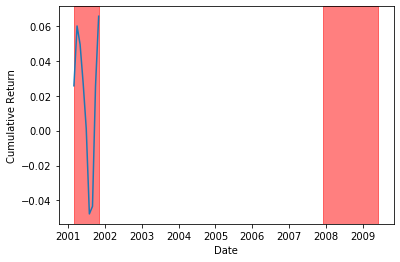

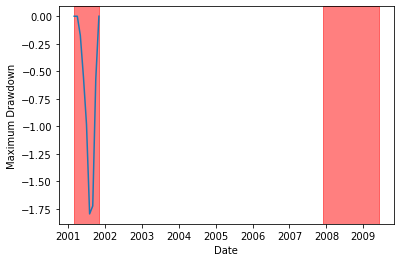

>> Average monthly return:  0.77 %
>> Monthly sharpe ratio:  0.2029571359468827
>> Annualised return:  0.25 %
>> Annualised Sharpe ratio:  0.019
>> Annualised Sharpe ratio 1:  0.703
>> Maxiumum drawdown:  [179.59480749]%
>> Maxiumum drawdown:  [179.59480749]%
>> One-month maxiumum drawdown:  [4184.34178283]%
>> Skewness:  [0.2176129]
>> Kurtosis:  [-0.59882706]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -4.86 %


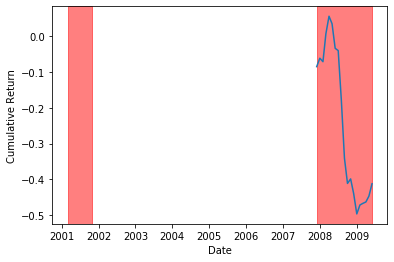

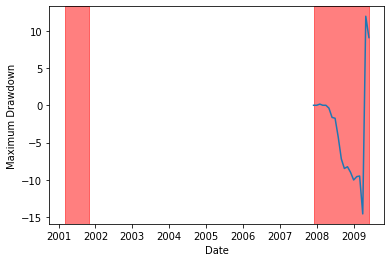

>> Average monthly return:  -2.46 %
>> Monthly sharpe ratio:  -0.3231315575402127
>> Annualised return:  -2.1 %
>> Annualised Sharpe ratio:  -0.08
>> Annualised Sharpe ratio 1:  -1.119
>> Maxiumum drawdown:  [1458.66916873]%
>> Maxiumum drawdown:  [1458.66916873]%
>> One-month maxiumum drawdown:  [201.20298134]%
>> Skewness:  [-0.70774671]
>> Kurtosis:  [-0.18240678]
>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  1.01 %


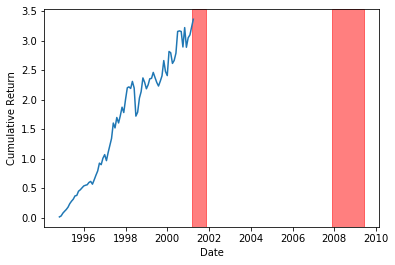

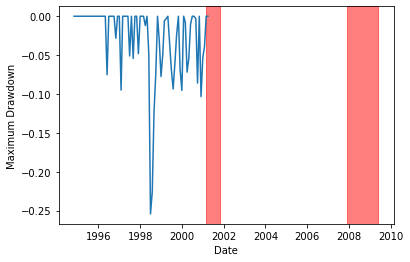

>> Average monthly return:  2.01 %
>> Monthly sharpe ratio:  0.4474729276986298
>> Annualised return:  6.07 %
>> Annualised Sharpe ratio:  0.391
>> Annualised Sharpe ratio 1:  1.55
>> Maxiumum drawdown:  [25.42652945]%
>> Maxiumum drawdown:  [25.42652945]%
>> One-month maxiumum drawdown:  [21.62542716]%
>> Skewness:  [-0.66929998]
>> Kurtosis:  [1.71233019]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.6 %


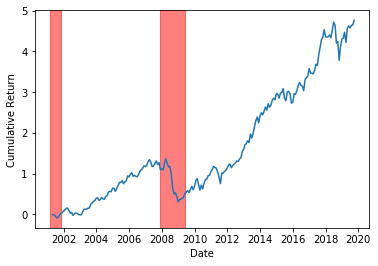

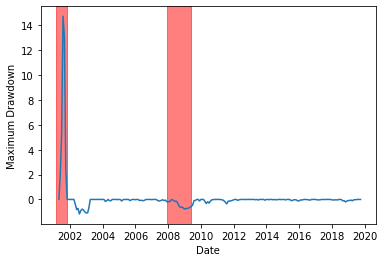

>> Average monthly return:  0.87 %
>> Monthly sharpe ratio:  0.21646851567234268
>> Annualised return:  7.26 %
>> Annualised Sharpe ratio:  0.519
>> Annualised Sharpe ratio 1:  0.75
>> Maxiumum drawdown:  [116.32400421]%
>> Maxiumum drawdown:  [116.32400421]%
>> One-month maxiumum drawdown:  [158.11012649]%
>> Skewness:  [-0.67197743]
>> Kurtosis:  [1.85505035]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  0.43 %


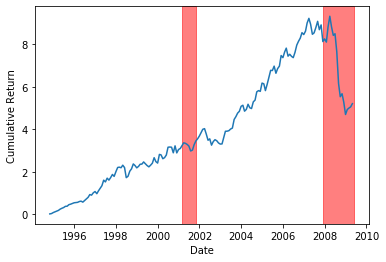

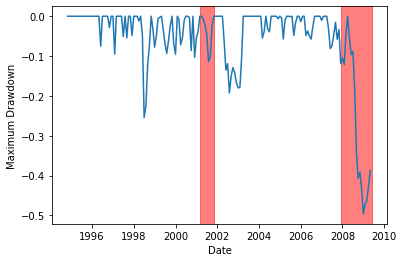

>> Average monthly return:  1.15 %
>> Monthly sharpe ratio:  0.2609565968636244
>> Annualised return:  7.58 %
>> Annualised Sharpe ratio:  0.498
>> Annualised Sharpe ratio 1:  0.904
>> Maxiumum drawdown:  [49.62221229]%
>> Maxiumum drawdown:  [49.62221229]%
>> One-month maxiumum drawdown:  [21.62542716]%
>> Skewness:  [-0.82376523]
>> Kurtosis:  [1.97127406]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  1.66 %


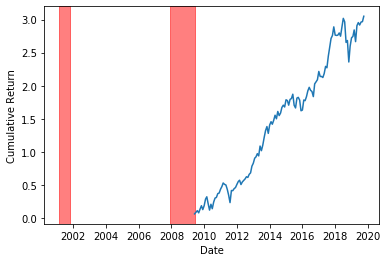

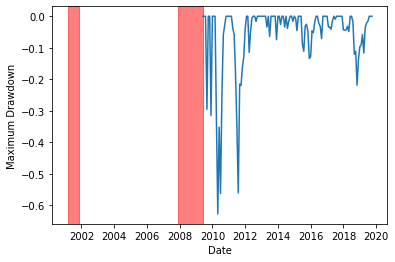

>> Average monthly return:  1.2 %
>> Monthly sharpe ratio:  0.3090350352135163
>> Annualised return:  5.75 %
>> Annualised Sharpe ratio:  0.428
>> Annualised Sharpe ratio 1:  1.071
>> Maxiumum drawdown:  [62.70087942]%
>> Maxiumum drawdown:  [62.70087942]%
>> One-month maxiumum drawdown:  [44.20243911]%
>> Skewness:  [-0.19791957]
>> Kurtosis:  [0.9722427]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  0.25 %


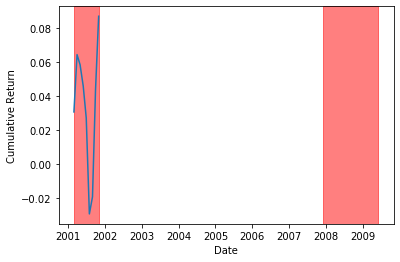

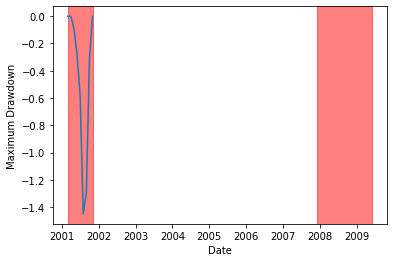

>> Average monthly return:  0.99 %
>> Monthly sharpe ratio:  0.27249422320329764
>> Annualised return:  0.33 %
>> Annualised Sharpe ratio:  0.027
>> Annualised Sharpe ratio 1:  0.944
>> Maxiumum drawdown:  [145.06124643]%
>> Maxiumum drawdown:  [145.06124643]%
>> One-month maxiumum drawdown:  [206.33643196]%
>> Skewness:  [-0.32298038]
>> Kurtosis:  [-0.18471891]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -1.61 %


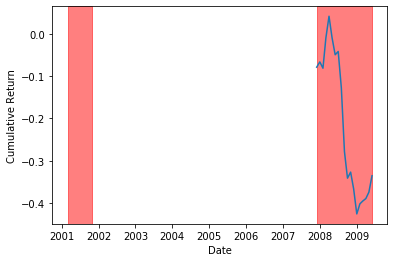

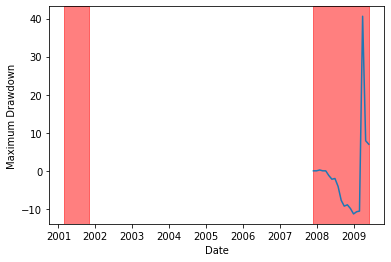

>> Average monthly return:  -1.91 %
>> Monthly sharpe ratio:  -0.2928501782934018
>> Annualised return:  -1.62 %
>> Annualised Sharpe ratio:  -0.072
>> Annualised Sharpe ratio 1:  -1.014
>> Maxiumum drawdown:  [1132.13236279]%
>> Maxiumum drawdown:  [1132.13236279]%
>> One-month maxiumum drawdown:  [122.68482626]%
>> Skewness:  [-0.60388941]
>> Kurtosis:  [-0.05551795]
>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  1.13 %


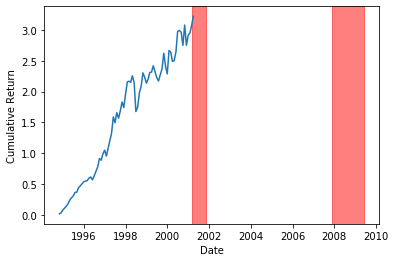

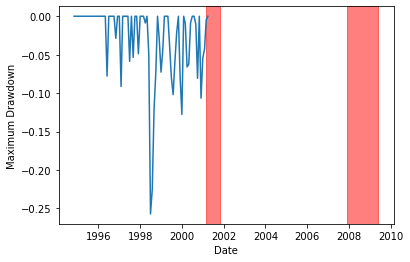

>> Average monthly return:  1.96 %
>> Monthly sharpe ratio:  0.4376930502319895
>> Annualised return:  5.93 %
>> Annualised Sharpe ratio:  0.382
>> Annualised Sharpe ratio 1:  1.516
>> Maxiumum drawdown:  [25.70507414]%
>> Maxiumum drawdown:  [25.70507414]%
>> One-month maxiumum drawdown:  [21.78873125]%
>> Skewness:  [-0.66981614]
>> Kurtosis:  [1.61566649]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  -3.29 %


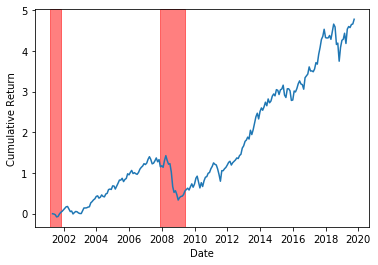

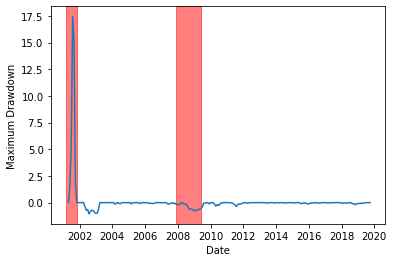

>> Average monthly return:  0.88 %
>> Monthly sharpe ratio:  0.21694466607317886
>> Annualised return:  7.27 %
>> Annualised Sharpe ratio:  0.52
>> Annualised Sharpe ratio 1:  0.752
>> Maxiumum drawdown:  [105.91507067]%
>> Maxiumum drawdown:  [105.91507067]%
>> One-month maxiumum drawdown:  [116.73618166]%
>> Skewness:  [-0.71983759]
>> Kurtosis:  [1.96758142]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  -2.99 %


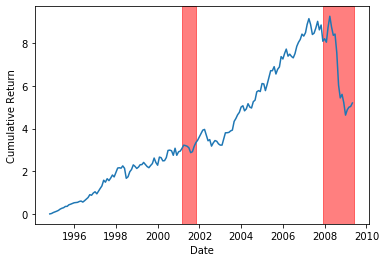

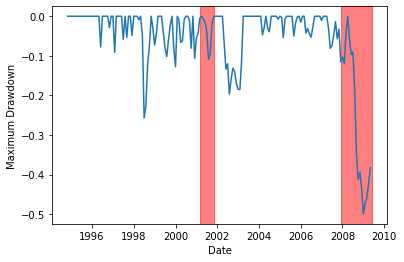

>> Average monthly return:  1.15 %
>> Monthly sharpe ratio:  0.260285882682697
>> Annualised return:  7.57 %
>> Annualised Sharpe ratio:  0.496
>> Annualised Sharpe ratio 1:  0.902
>> Maxiumum drawdown:  [49.94946093]%
>> Maxiumum drawdown:  [49.94946093]%
>> One-month maxiumum drawdown:  [21.78873125]%
>> Skewness:  [-0.86266959]
>> Kurtosis:  [2.07918212]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  2.52 %


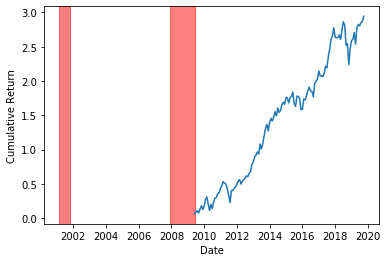

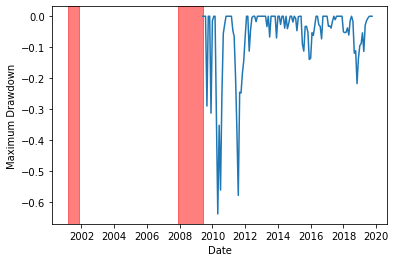

>> Average monthly return:  1.18 %
>> Monthly sharpe ratio:  0.3047502113590688
>> Annualised return:  5.64 %
>> Annualised Sharpe ratio:  0.422
>> Annualised Sharpe ratio 1:  1.056
>> Maxiumum drawdown:  [63.81625211]%
>> Maxiumum drawdown:  [63.81625211]%
>> One-month maxiumum drawdown:  [45.69096831]%
>> Skewness:  [-0.21498185]
>> Kurtosis:  [0.86766355]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  0.34 %


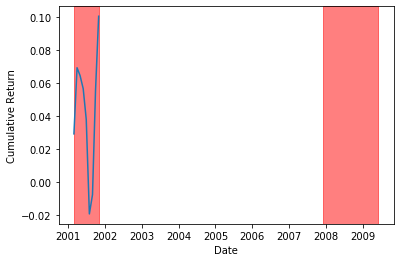

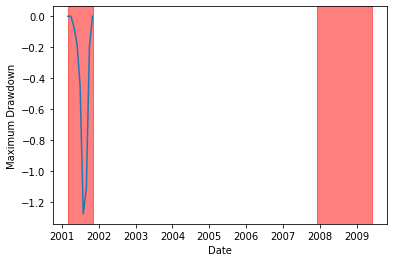

>> Average monthly return:  1.13 %
>> Monthly sharpe ratio:  0.30927450382791044
>> Annualised return:  0.38 %
>> Annualised Sharpe ratio:  0.03
>> Annualised Sharpe ratio 1:  1.071
>> Maxiumum drawdown:  [127.76265778]%
>> Maxiumum drawdown:  [127.76265778]%
>> One-month maxiumum drawdown:  [150.55929214]%
>> Skewness:  [-0.42170351]
>> Kurtosis:  [-0.1101472]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -18.75 %


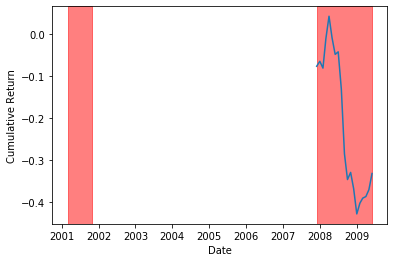

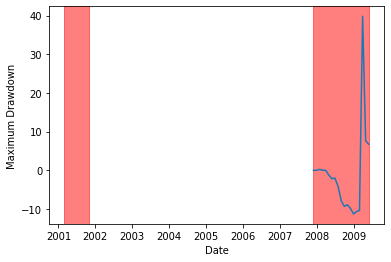

>> Average monthly return:  -1.88 %
>> Monthly sharpe ratio:  -0.2829862026704572
>> Annualised return:  -1.6 %
>> Annualised Sharpe ratio:  -0.07
>> Annualised Sharpe ratio 1:  -0.98
>> Maxiumum drawdown:  [1127.75512931]%
>> Maxiumum drawdown:  [1127.75512931]%
>> One-month maxiumum drawdown:  [122.73561437]%
>> Skewness:  [-0.64992782]
>> Kurtosis:  [0.01715662]
>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  1.08 %


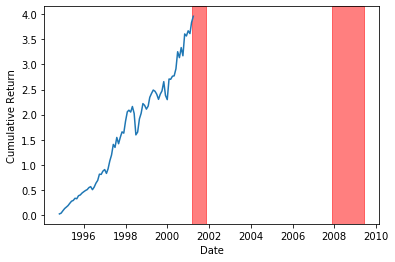

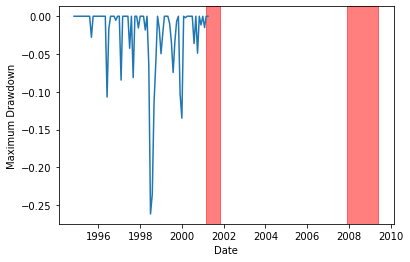

>> Average monthly return:  2.16 %
>> Monthly sharpe ratio:  0.5050742348648823
>> Annualised return:  6.62 %
>> Annualised Sharpe ratio:  0.446
>> Annualised Sharpe ratio 1:  1.75
>> Maxiumum drawdown:  [26.15557568]%
>> Maxiumum drawdown:  [26.15557568]%
>> One-month maxiumum drawdown:  [21.07857867]%
>> Skewness:  [-0.53521652]
>> Kurtosis:  [1.98405714]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.43 %


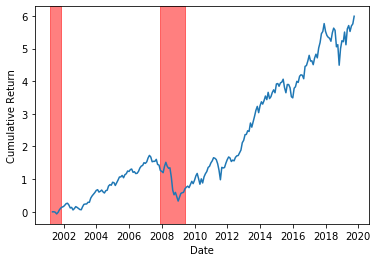

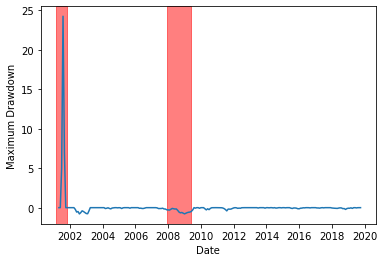

>> Average monthly return:  0.99 %
>> Monthly sharpe ratio:  0.21357395084559447
>> Annualised return:  8.09 %
>> Annualised Sharpe ratio:  0.505
>> Annualised Sharpe ratio 1:  0.74
>> Maxiumum drawdown:  [79.24822126]%
>> Maxiumum drawdown:  [79.24822126]%
>> One-month maxiumum drawdown:  [59.4412033]%
>> Skewness:  [-0.51775783]
>> Kurtosis:  [2.22640179]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  0.35 %


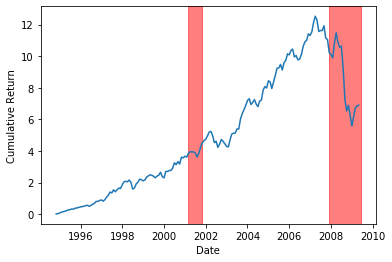

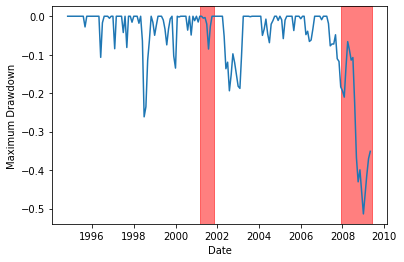

>> Average monthly return:  1.3 %
>> Monthly sharpe ratio:  0.279509685399616
>> Annualised return:  8.62 %
>> Annualised Sharpe ratio:  0.536
>> Annualised Sharpe ratio 1:  0.968
>> Maxiumum drawdown:  [51.39914348]%
>> Maxiumum drawdown:  [51.39914348]%
>> One-month maxiumum drawdown:  [21.41602042]%
>> Skewness:  [-0.8366075]
>> Kurtosis:  [2.28353152]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  1.6 %


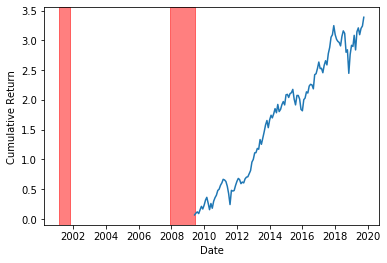

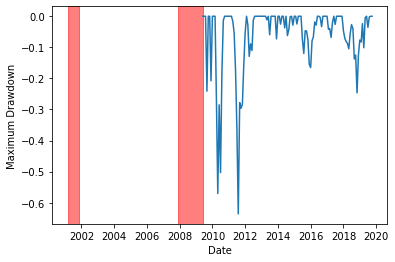

>> Average monthly return:  1.29 %
>> Monthly sharpe ratio:  0.28863974721939556
>> Annualised return:  6.09 %
>> Annualised Sharpe ratio:  0.394
>> Annualised Sharpe ratio 1:  1.0
>> Maxiumum drawdown:  [63.61945209]%
>> Maxiumum drawdown:  [63.61945209]%
>> One-month maxiumum drawdown:  [43.09889306]%
>> Skewness:  [-0.05343001]
>> Kurtosis:  [1.96308005]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  0.2 %


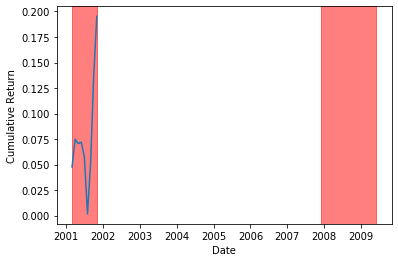

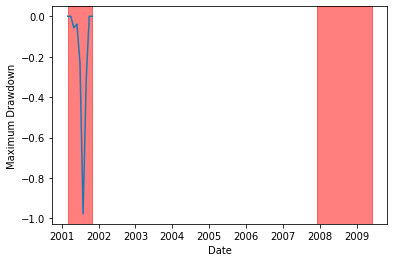

>> Average monthly return:  2.08 %
>> Monthly sharpe ratio:  0.5026550283174342
>> Annualised return:  0.72 %
>> Annualised Sharpe ratio:  0.05
>> Annualised Sharpe ratio 1:  1.741
>> Maxiumum drawdown:  [97.75498197]%
>> Maxiumum drawdown:  [97.75498197]%
>> One-month maxiumum drawdown:  [97.07450932]%
>> Skewness:  [-0.40822578]
>> Kurtosis:  [-0.4028724]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -2.0 %


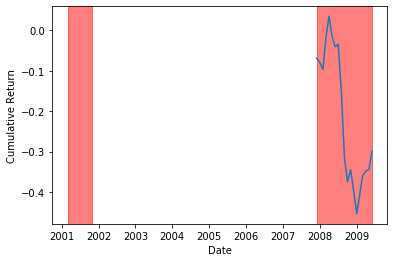

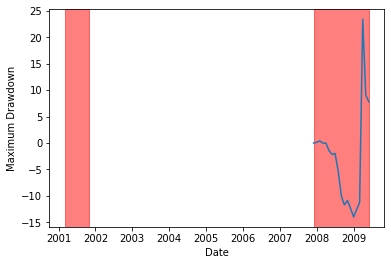

>> Average monthly return:  -1.55 %
>> Monthly sharpe ratio:  -0.19796415893085417
>> Annualised return:  -1.41 %
>> Annualised Sharpe ratio:  -0.052
>> Annualised Sharpe ratio 1:  -0.686
>> Maxiumum drawdown:  [1397.91179786]%
>> Maxiumum drawdown:  [1397.91179786]%
>> One-month maxiumum drawdown:  [140.7759191]%
>> Skewness:  [-0.4875357]
>> Kurtosis:  [-0.2408353]
>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.69 %


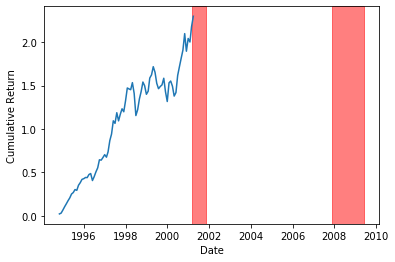

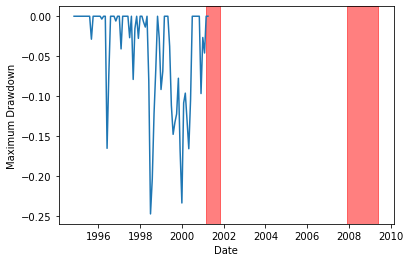

>> Average monthly return:  1.61 %
>> Monthly sharpe ratio:  0.42520071761961903
>> Annualised return:  4.89 %
>> Annualised Sharpe ratio:  0.372
>> Annualised Sharpe ratio 1:  1.473
>> Maxiumum drawdown:  [24.69138334]%
>> Maxiumum drawdown:  [24.69138334]%
>> One-month maxiumum drawdown:  [18.09497483]%
>> Skewness:  [-0.68884813]
>> Kurtosis:  [0.53685492]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  -130.52 %


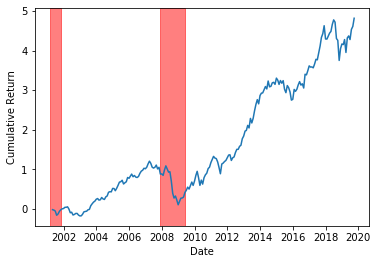

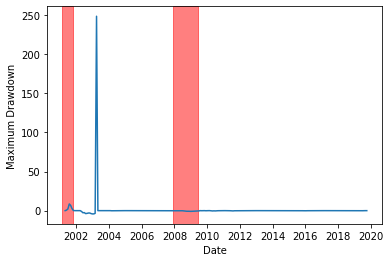

>> Average monthly return:  0.9 %
>> Monthly sharpe ratio:  0.2014061660168904
>> Annualised return:  7.3 %
>> Annualised Sharpe ratio:  0.473
>> Annualised Sharpe ratio 1:  0.698
>> Maxiumum drawdown:  [417.70940203]%
>> Maxiumum drawdown:  [417.70940203]%
>> One-month maxiumum drawdown:  [100.52491759]%
>> Skewness:  [-0.77078117]
>> Kurtosis:  [1.48549459]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  -106.91 %


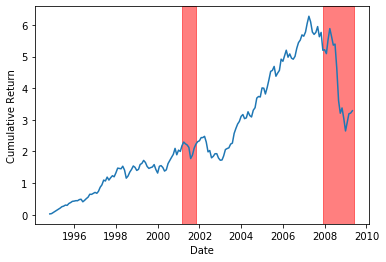

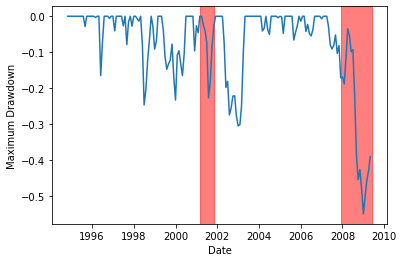

>> Average monthly return:  0.93 %
>> Monthly sharpe ratio:  0.2128078103390431
>> Annualised return:  6.0 %
>> Annualised Sharpe ratio:  0.395
>> Annualised Sharpe ratio 1:  0.737
>> Maxiumum drawdown:  [55.00487784]%
>> Maxiumum drawdown:  [55.00487784]%
>> One-month maxiumum drawdown:  [21.96173403]%
>> Skewness:  [-1.05182079]
>> Kurtosis:  [1.91642263]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  2.39 %


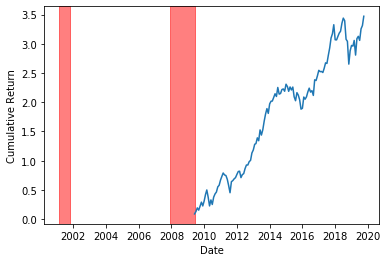

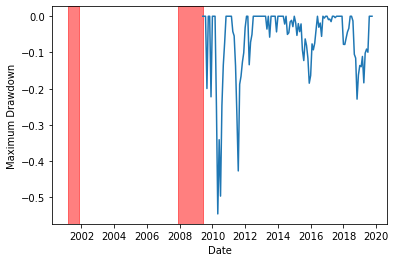

>> Average monthly return:  1.29 %
>> Monthly sharpe ratio:  0.3095447845656657
>> Annualised return:  6.17 %
>> Annualised Sharpe ratio:  0.427
>> Annualised Sharpe ratio 1:  1.072
>> Maxiumum drawdown:  [54.56173738]%
>> Maxiumum drawdown:  [54.56173738]%
>> One-month maxiumum drawdown:  [39.41416457]%
>> Skewness:  [-0.33505073]
>> Kurtosis:  [0.47767206]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  -5.85 %


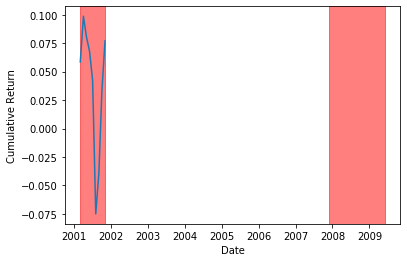

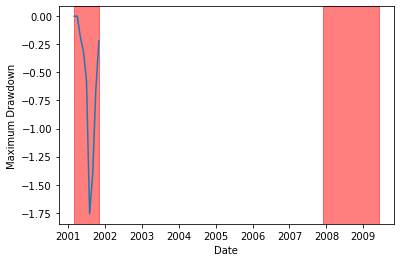

>> Average monthly return:  0.98 %
>> Monthly sharpe ratio:  0.16994150065721525
>> Annualised return:  0.3 %
>> Annualised Sharpe ratio:  0.015
>> Annualised Sharpe ratio 1:  0.589
>> Maxiumum drawdown:  [176.03777783]%
>> Maxiumum drawdown:  [176.03777783]%
>> One-month maxiumum drawdown:  [278.07806718]%
>> Skewness:  [-1.18337389]
>> Kurtosis:  [1.52508392]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -655.61 %


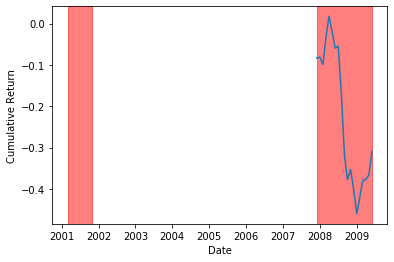

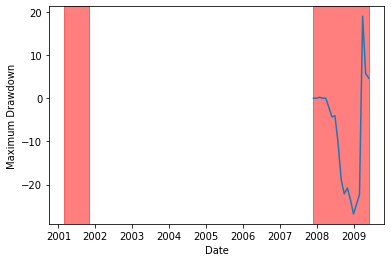

>> Average monthly return:  -1.64 %
>> Monthly sharpe ratio:  -0.21593806334409252
>> Annualised return:  -1.47 %
>> Annualised Sharpe ratio:  -0.056
>> Annualised Sharpe ratio 1:  -0.748
>> Maxiumum drawdown:  [2678.53740927]%
>> Maxiumum drawdown:  [2678.53740927]%
>> One-month maxiumum drawdown:  [205.65334118]%
>> Skewness:  [-0.43758137]
>> Kurtosis:  [-0.54819936]
>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.92 %


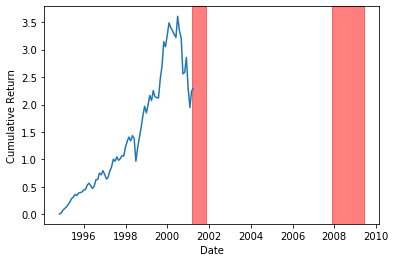

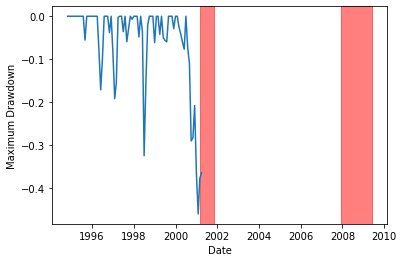

>> Average monthly return:  1.7 %
>> Monthly sharpe ratio:  0.29861378956668116
>> Annualised return:  4.88 %
>> Annualised Sharpe ratio:  0.247
>> Annualised Sharpe ratio 1:  1.034
>> Maxiumum drawdown:  [46.0687373]%
>> Maxiumum drawdown:  [46.0687373]%
>> One-month maxiumum drawdown:  [30.04014436]%
>> Skewness:  [-0.96985783]
>> Kurtosis:  [1.98245068]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  -0.21 %


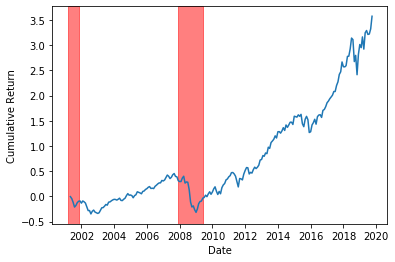

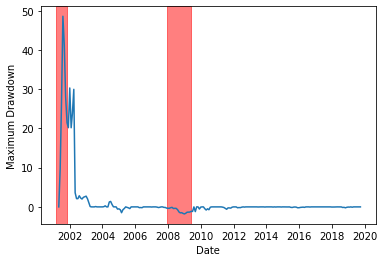

>> Average monthly return:  0.8 %
>> Monthly sharpe ratio:  0.16898923681146943
>> Annualised return:  6.27 %
>> Annualised Sharpe ratio:  0.382
>> Annualised Sharpe ratio 1:  0.585
>> Maxiumum drawdown:  [179.01713108]%
>> Maxiumum drawdown:  [179.01713108]%
>> One-month maxiumum drawdown:  [278.32043869]%
>> Skewness:  [-0.78587222]
>> Kurtosis:  [2.41960676]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  -0.27 %


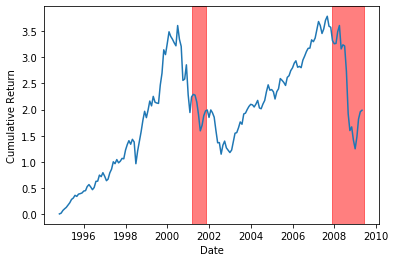

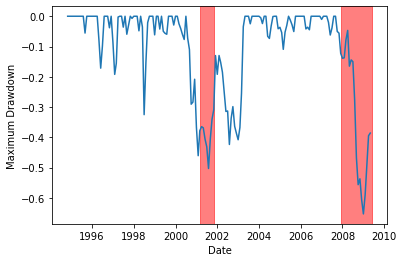

>> Average monthly return:  0.78 %
>> Monthly sharpe ratio:  0.14289464677014538
>> Annualised return:  4.48 %
>> Annualised Sharpe ratio:  0.237
>> Annualised Sharpe ratio 1:  0.495
>> Maxiumum drawdown:  [65.30257445]%
>> Maxiumum drawdown:  [65.30257445]%
>> One-month maxiumum drawdown:  [30.04014436]%
>> Skewness:  [-0.90720856]
>> Kurtosis:  [2.15660997]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  1.64 %


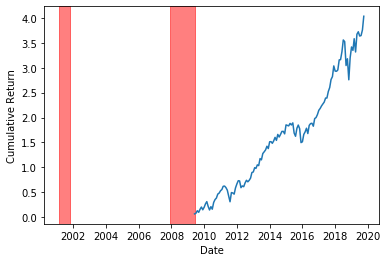

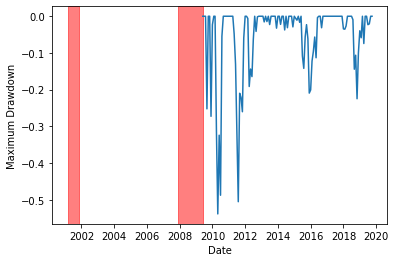

>> Average monthly return:  1.39 %
>> Monthly sharpe ratio:  0.32342824677564586
>> Annualised return:  6.68 %
>> Annualised Sharpe ratio:  0.448
>> Annualised Sharpe ratio 1:  1.12
>> Maxiumum drawdown:  [53.85889886]%
>> Maxiumum drawdown:  [53.85889886]%
>> One-month maxiumum drawdown:  [32.78343749]%
>> Skewness:  [-0.3445084]
>> Kurtosis:  [0.93580947]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  -0.33 %


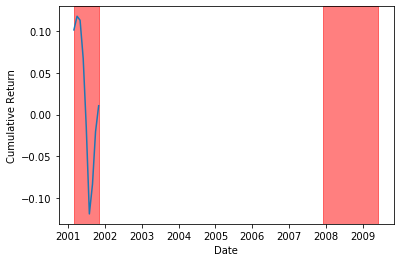

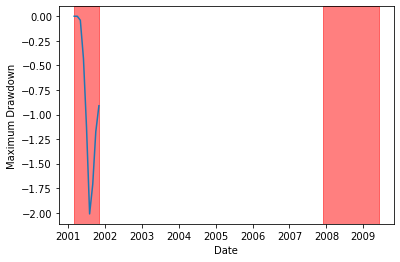

>> Average monthly return:  0.32 %
>> Monthly sharpe ratio:  0.04753925304352565
>> Annualised return:  0.04 %
>> Annualised Sharpe ratio:  0.002
>> Annualised Sharpe ratio 1:  0.165
>> Maxiumum drawdown:  [201.14175346]%
>> Maxiumum drawdown:  [201.14175346]%
>> One-month maxiumum drawdown:  [121.66101258]%
>> Skewness:  [-0.31234224]
>> Kurtosis:  [-0.71794084]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -3.26 %


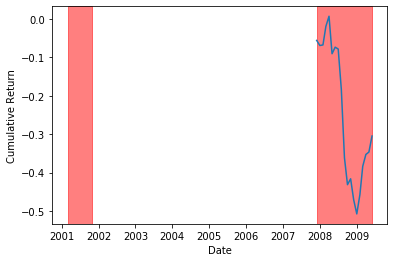

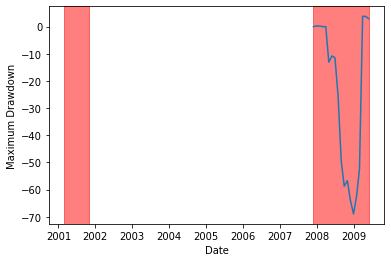

>> Average monthly return:  -1.52 %
>> Monthly sharpe ratio:  -0.17600675780897299
>> Annualised return:  -1.44 %
>> Annualised Sharpe ratio:  -0.048
>> Annualised Sharpe ratio 1:  -0.61
>> Maxiumum drawdown:  [6896.38040424]%
>> Maxiumum drawdown:  [6896.38040424]%
>> One-month maxiumum drawdown:  [1307.81644352]%
>> Skewness:  [-0.48566322]
>> Kurtosis:  [0.25149021]
>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.99 %


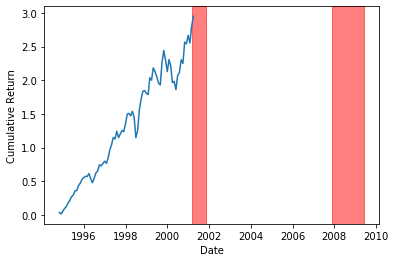

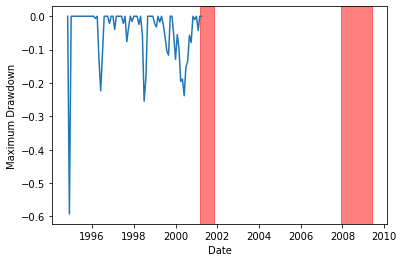

>> Average monthly return:  1.87 %
>> Monthly sharpe ratio:  0.42709981826369
>> Annualised return:  5.65 %
>> Annualised Sharpe ratio:  0.372
>> Annualised Sharpe ratio 1:  1.48
>> Maxiumum drawdown:  [59.23538139]%
>> Maxiumum drawdown:  [59.23538139]%
>> One-month maxiumum drawdown:  [59.23538139]%
>> Skewness:  [-0.24399484]
>> Kurtosis:  [0.84902762]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  -1.51 %


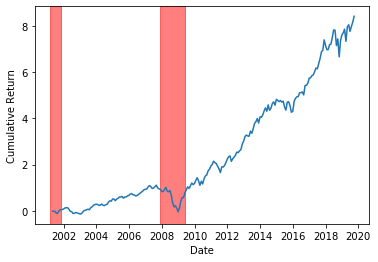

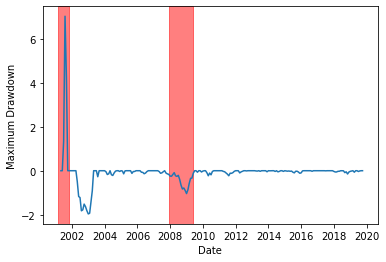

>> Average monthly return:  1.13 %
>> Monthly sharpe ratio:  0.2320836237410013
>> Annualised return:  9.38 %
>> Annualised Sharpe ratio:  0.555
>> Annualised Sharpe ratio 1:  0.804
>> Maxiumum drawdown:  [196.48046539]%
>> Maxiumum drawdown:  [196.48046539]%
>> One-month maxiumum drawdown:  [138.49081074]%
>> Skewness:  [0.00785724]
>> Kurtosis:  [4.19386805]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  -1.45 %


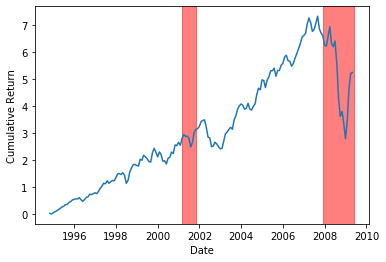

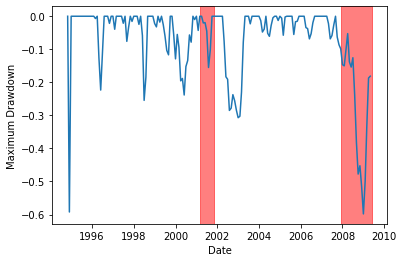

>> Average monthly return:  1.19 %
>> Monthly sharpe ratio:  0.2261261349984352
>> Annualised return:  7.61 %
>> Annualised Sharpe ratio:  0.417
>> Annualised Sharpe ratio 1:  0.783
>> Maxiumum drawdown:  [59.81349913]%
>> Maxiumum drawdown:  [59.81349913]%
>> One-month maxiumum drawdown:  [59.23538139]%
>> Skewness:  [0.01671381]
>> Kurtosis:  [3.87727501]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  2.07 %


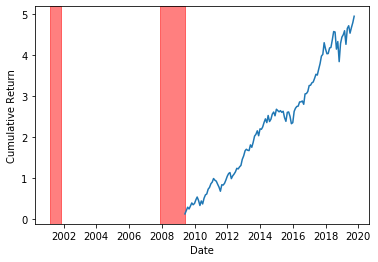

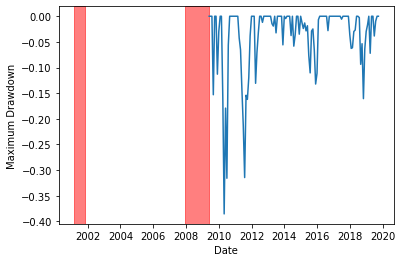

>> Average monthly return:  1.51 %
>> Monthly sharpe ratio:  0.38162306924197936
>> Annualised return:  7.39 %
>> Annualised Sharpe ratio:  0.538
>> Annualised Sharpe ratio 1:  1.322
>> Maxiumum drawdown:  [38.53494569]%
>> Maxiumum drawdown:  [38.53494569]%
>> One-month maxiumum drawdown:  [26.84152301]%
>> Skewness:  [-0.19845411]
>> Kurtosis:  [0.20995576]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  -0.12 %


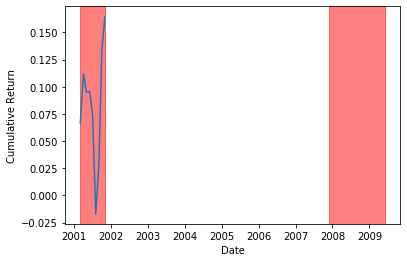

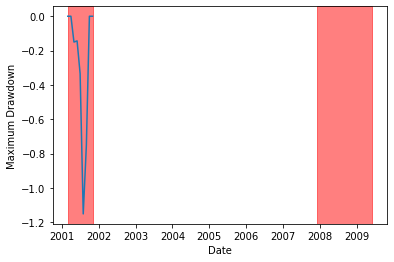

>> Average monthly return:  1.85 %
>> Monthly sharpe ratio:  0.3331060842771035
>> Annualised return:  0.61 %
>> Annualised Sharpe ratio:  0.032
>> Annualised Sharpe ratio 1:  1.154
>> Maxiumum drawdown:  [115.19013318]%
>> Maxiumum drawdown:  [115.19013318]%
>> One-month maxiumum drawdown:  [122.82244912]%
>> Skewness:  [-0.41971316]
>> Kurtosis:  [0.47059827]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -11.47 %


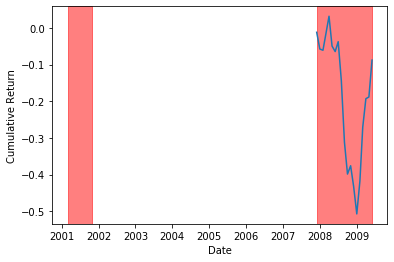

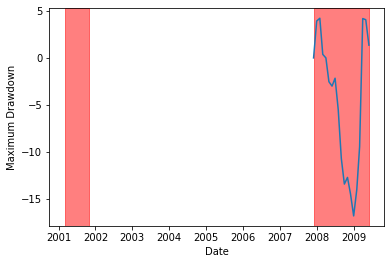

>> Average monthly return:  0.12 %
>> Monthly sharpe ratio:  0.010408715081456722
>> Annualised return:  -0.37 %
>> Annualised Sharpe ratio:  -0.009
>> Annualised Sharpe ratio 1:  0.036
>> Maxiumum drawdown:  [1678.87571621]%
>> Maxiumum drawdown:  [1678.87571621]%
>> One-month maxiumum drawdown:  [253.16930699]%
>> Skewness:  [0.43050117]
>> Kurtosis:  [0.06966634]
>>>>>>>>>>pre 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.96 %


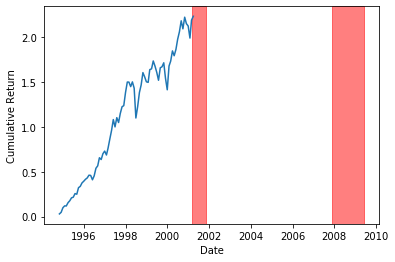

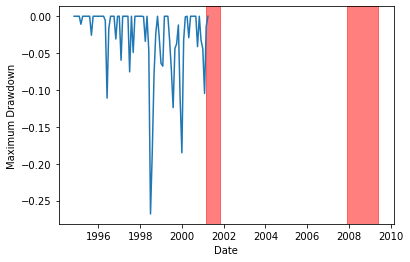

>> Average monthly return:  1.59 %
>> Monthly sharpe ratio:  0.4176729776128442
>> Annualised return:  4.81 %
>> Annualised Sharpe ratio:  0.365
>> Annualised Sharpe ratio 1:  1.447
>> Maxiumum drawdown:  [26.80374414]%
>> Maxiumum drawdown:  [26.80374414]%
>> One-month maxiumum drawdown:  [23.2273081]%
>> Skewness:  [-0.8332975]
>> Kurtosis:  [2.27105766]
>>>>>>>>>>post 2001>>>>>>>>>>>
Overall out of sample R-squared:  0.0 %


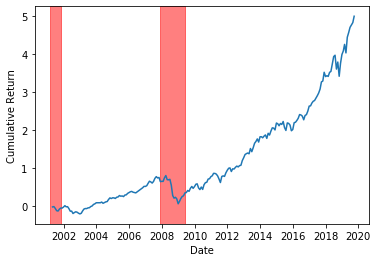

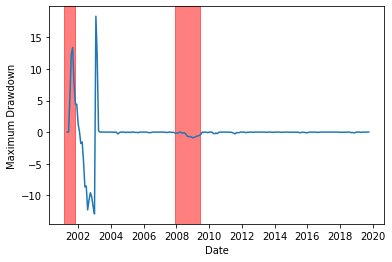

>> Average monthly return:  0.87 %
>> Monthly sharpe ratio:  0.24542330549744612
>> Annualised return:  7.42 %
>> Annualised Sharpe ratio:  0.602
>> Annualised Sharpe ratio 1:  0.85
>> Maxiumum drawdown:  [1294.97718211]%
>> Maxiumum drawdown:  [1294.97718211]%
>> One-month maxiumum drawdown:  [180.28764041]%
>> Skewness:  [-1.00696296]
>> Kurtosis:  [3.05578235]
>>>>>>>>>>pre 2008>>>>>>>>>>>
Overall out of sample R-squared:  -0.12 %


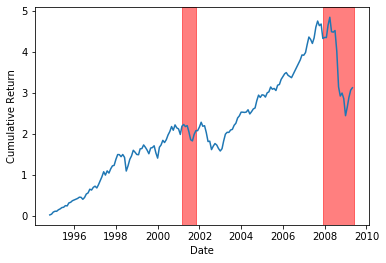

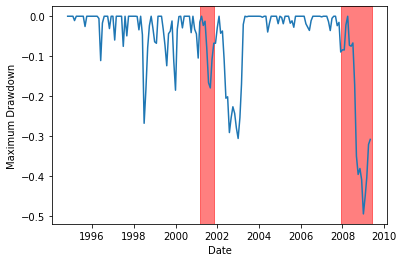

>> Average monthly return:  0.89 %
>> Monthly sharpe ratio:  0.23106024566860991
>> Annualised return:  5.83 %
>> Annualised Sharpe ratio:  0.438
>> Annualised Sharpe ratio 1:  0.8
>> Maxiumum drawdown:  [49.49295106]%
>> Maxiumum drawdown:  [49.49295106]%
>> One-month maxiumum drawdown:  [23.2273081]%
>> Skewness:  [-1.18270298]
>> Kurtosis:  [3.44133398]
>>>>>>>>>>post 2008>>>>>>>>>>>
Overall out of sample R-squared:  1.78 %


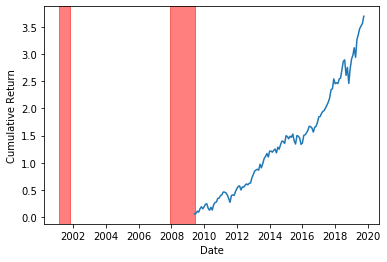

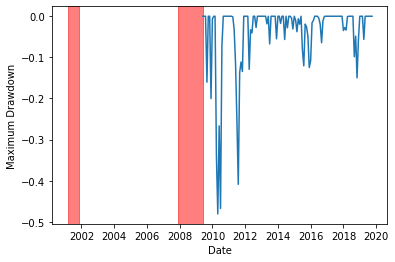

>> Average monthly return:  1.3 %
>> Monthly sharpe ratio:  0.3924662109648553
>> Annualised return:  6.38 %
>> Annualised Sharpe ratio:  0.557
>> Annualised Sharpe ratio 1:  1.36
>> Maxiumum drawdown:  [48.07762106]%
>> Maxiumum drawdown:  [48.07762106]%
>> One-month maxiumum drawdown:  [34.17005888]%
>> Skewness:  [-0.28367829]
>> Kurtosis:  [0.24350482]
>>>>>>>>>>dotcome bubble>>>>>>>>>>>
Overall out of sample R-squared:  -0.21 %


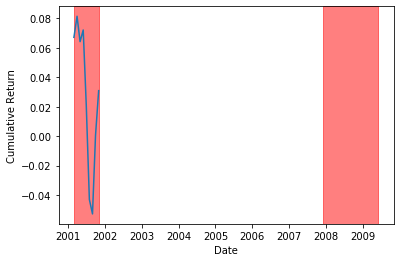

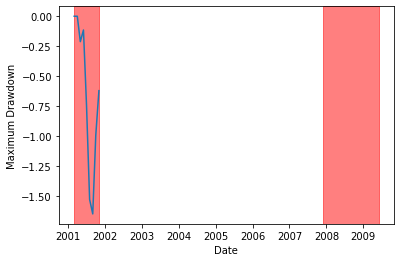

>> Average monthly return:  0.42 %
>> Monthly sharpe ratio:  0.09694616569969043
>> Annualised return:  0.12 %
>> Annualised Sharpe ratio:  0.008
>> Annualised Sharpe ratio 1:  0.336
>> Maxiumum drawdown:  [164.84578066]%
>> Maxiumum drawdown:  [164.84578066]%
>> One-month maxiumum drawdown:  [299.21488193]%
>> Skewness:  [-0.08664494]
>> Kurtosis:  [-0.78604346]
>>>>>>>>>>financial crisis>>>>>>>>>>>
Overall out of sample R-squared:  -2.95 %


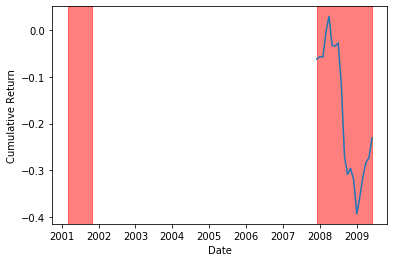

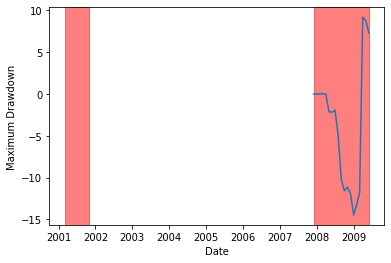

>> Average monthly return:  -1.16 %
>> Monthly sharpe ratio:  -0.17661451012542584
>> Annualised return:  -1.04 %
>> Annualised Sharpe ratio:  -0.046
>> Annualised Sharpe ratio 1:  -0.612
>> Maxiumum drawdown:  [1447.54933459]%
>> Maxiumum drawdown:  [1447.54933459]%
>> One-month maxiumum drawdown:  [212.63633116]%
>> Skewness:  [-0.91133093]
>> Kurtosis:  [0.40340751]


In [245]:
for df in ml_df_list:
    df_pre_2001, df_post_2001, df_pre_2008, df_post_2008, df_dotcom_bubble, df_financial_crisis = get_time_varying_return_predictability(df)
    df_pre_2001, df_post_2001, df_pre_2008, df_post_2008, df_dotcom_bubble, df_financial_crisis = df_pre_2001.reset_index(), df_post_2001.reset_index(), df_pre_2008.reset_index(), df_post_2008.reset_index(), df_dotcom_bubble.reset_index(), df_financial_crisis.reset_index()
    print('>>>>>>>>>>pre 2001>>>>>>>>>>>')
    get_oos_rquared(df_pre_2001)
    get_cumulative_return(df_pre_2001, 10, value_weighted = True)
    print('>>>>>>>>>>post 2001>>>>>>>>>>>')
    get_oos_rquared(df_post_2001)
    get_cumulative_return(df_post_2001, 10, value_weighted = True)
    print('>>>>>>>>>>pre 2008>>>>>>>>>>>')
    get_oos_rquared(df_pre_2008)
    get_cumulative_return(df_pre_2008, 10, value_weighted = True)
    print('>>>>>>>>>>post 2008>>>>>>>>>>>')
    get_oos_rquared(df_post_2008)
    get_cumulative_return(df_post_2008, 10, value_weighted = True)
    print('>>>>>>>>>>dotcome bubble>>>>>>>>>>>')
    get_oos_rquared(df_dotcom_bubble)
    get_cumulative_return(df_dotcom_bubble, 10, value_weighted = True)
    print('>>>>>>>>>>financial crisis>>>>>>>>>>>')
    get_oos_rquared(df_financial_crisis)
    get_cumulative_return(df_financial_crisis, 10, value_weighted = True)

In [246]:
def get_time_varying_return_predictability(df):
    
    df = df.set_index(['date'])
    
    pre_decimalization_2001_index = ('1994-10-01' < df.index.get_level_values(0)) & (df.index.get_level_values(0) <= '2001-04-01')
    
    post_decimalization_2001_index = df.index.get_level_values(0) > '2001-04-01'
    
    pre_financial_crisis_2008_index = ('1994-10-01' < df.index.get_level_values(0)) & (df.index.get_level_values(0) <= '2009-05-01')
    
    post_financial_crisis_2008_index = df.index.get_level_values(0) > '2009-05-01'
    
    dotcom_bubble_index = ('2001-03-01' <= df.index.get_level_values(0)) & (df.index.get_level_values(0) <= '2001-11-01')
    
    financial_crisis_index = ('2007-12-01' <= df.index.get_level_values(0)) & (df.index.get_level_values(0) <= '2009-06-01')
    
    df_pre_2001 = df[pre_decimalization_2001_index]
    
    df_post_2001 = df[post_decimalization_2001_index]
    
    df_pre_2008 = df[pre_financial_crisis_2008_index]
    
    df_post_2008 = df[post_financial_crisis_2008_index]
    
    df_dotcom_bubble = df[dotcom_bubble_index]
    
    df_financial_crisis = df[financial_crisis_index]
    
    return df_pre_2001, df_post_2001, df_pre_2008, df_post_2008, df_dotcom_bubble, df_financial_crisis

In [127]:
sp500_financial_crisis_index = ('2007-12-01' <= sp_monthly.index.get_level_values(0)) & (sp_monthly.index.get_level_values(0) <= '2009-06-01') 
monthly_cum_ret_sp500_financial_crisis= sp_monthly[sp500_financial_crisis_index]
display(monthly_cum_ret_sp500_financial_crisis)
print('Average monthly return of S&P 500 during the 2008 financial crisis: ', monthly_cum_ret_sp500_financial_crisis['Return'].mean())
sp500_dotcom_bubble_index = ('2001-03-01' <= sp_monthly.index.get_level_values(0)) & (sp_monthly.index.get_level_values(0) <= '2001-11-01') 
monthly_cum_ret_sp500_dotcom_bubble = sp_monthly[sp500_dotcom_bubble_index]
display(monthly_cum_ret_sp500_dotcom_bubble)
print('Average monthly return of S&P 500 during the 2001 dot-com bubble: ', monthly_cum_ret_sp500_dotcom_bubble['Return'].mean())

Adj Close    Return
Date                             
2007-12-03  1472.420044 -0.023879
2008-01-01  1447.160034 -0.017155
2008-02-01  1395.420044 -0.035753
2008-03-03  1331.339966 -0.045922
2008-04-01  1370.180054  0.029174
2008-05-01  1409.339966  0.028580
2008-06-02  1385.670044 -0.016795
2008-07-01  1284.910034 -0.072716
2008-08-01  1260.310059 -0.019145
2008-09-01  1277.579956  0.013703
2008-10-01  1161.060059 -0.091204
2008-11-03   966.299988 -0.167743
2008-12-01   816.210022 -0.155324
2009-01-01   931.799988  0.141618
2009-02-02   825.440002 -0.114145
2009-03-02   700.820007 -0.150974
2009-04-01   811.080017  0.157330
2009-05-01   877.520020  0.081915
2009-06-01   942.869995  0.074471

Average monthly return of S&P 500 during the 2008 financial crisis:  -0.020208610422250705


Adj Close    Return
Date                             
2001-03-01  1241.229980 -0.096282
2001-04-02  1145.869995 -0.076827
2001-05-01  1266.439941  0.105221
2001-06-01  1260.670044 -0.004556
2001-07-02  1236.719971 -0.018998
2001-08-01  1215.930054 -0.016811
2001-09-03  1132.939941 -0.068252
2001-10-01  1038.550049 -0.083314
2001-11-01  1084.099976  0.043859

Average monthly return of S&P 500 during the 2001 dot-com bubble:  -0.02399545845216829


In [9]:
def ind_map(x):
    if 1 <= x <= 9:
        s = 'Agriculture, Forestry & Fishing, Manufacturing'
    elif 10 <= x <= 17:
        s = 'Mining, Construction'
    elif 20 <= x <= 39:
        s = 'Agriculture, Forestry & Fishing, Manufacturing'
    elif 40 <= x <= 49:
        s = 'Transportation & Public Utilities'
    elif 50 <= x <= 59:
        s = 'Wholesale Trade & Retail Trade'
    elif 60 <= x <= 67:
        s = 'Finance, Insurance, & Real Estate'
    elif 70 <= x <= 89:
        s = 'Service'
    elif 91 <= x <= 99:
        s = 'Others'
    return s

In [10]:
anomalies_list = ['UMCSENTx', 'VXOCLSx', 'UNRATE'] 

In [11]:
industry_list = ['Agriculture, Forestry & Fishing, Manufacturing', 'Mining, Construction', 
                 'Transportation & Public Utilities', 'Wholesale Trade & Retail Trade', 
                  'Finance, Insurance, & Real Estate', 'Service', 'Others']

In [97]:
ml_df_list = [df_X_linear, df_firm_char_linear, df_ff3, df_ff5, df_ff6, df_firm_char_lasso_2, df_X_lasso, 
             df_firm_char_ElasticNet, df_X_ElasticNet, df_firm_char_PLS, df_X_PLS, df_firm_char_FNN, df_X_FNN, df_X_LSTM_FNN_2]

In [12]:
def get_df(df_name):
    
    df = pd.read_csv(df_name)
    
    df = df.astype({'date':'datetime64[ns]'})
    
    df['industry'] = df['sic2'].apply(lambda x: ind_map(x))
    
    display(df)
    
    return df

In [13]:
def get_industry_df(df, industry_name):
    
    df_industry = df.loc[df['industry'] == industry_name, ]
    
    return df_industry

In [222]:
def get_oos_rquared(df):
    
    MSE_1 = np.sum((df['Actual'] - df['Prediction'])**2)
        
    MSE_2 = np.sum((df['Actual']-0)**2)

    R_SQUARED_OOS = 1 - MSE_1/MSE_2
    
    print('Overall out of sample R-squared: ', round(R_SQUARED_OOS*100, 2), '%')

In [173]:
def get_conditional_oos_rquared(df):
    
    MSE_TOP_100_1, MSE_BOTTOM_100_1 = list(), list()
    MSE_TOP_100_2, MSE_BOTTOM_100_2 = list(), list()
    MSE_1, MSE_2 = list(), list()
    date_unique_list =  df['date'].unique()
    
    for date in date_unique_list:
        
        date_df = df.loc[df['date'] == date, ]
        
        # date_df.groupby(['date'])
    
        date_df['n_size'] = (date_df['size'] - date_df['size'].min()) / (date_df['size'].max() - date_df['size'].min())
        
        date_df.sort_values(by=['n_size'], inplace = True, ascending = False)
            
        mse_TOP_100_1, mse_BOTTOM_100_1 = np.sum((date_df['Actual'][0:100] - date_df['Prediction'][0:100])**2), np.sum((date_df['Actual'][-100:] - date_df['Prediction'][-100:])**2)
        
        mse_1 = np.sum((date_df['Actual'] - date_df['Prediction'])**2)
    
        MSE_TOP_100_1.append(mse_TOP_100_1)
        
        MSE_BOTTOM_100_1.append(mse_BOTTOM_100_1)
        
        MSE_1.append(mse_1)
        
        mse_TOP_100_2, mse_BOTTOM_100_2 = np.sum((date_df['Actual'][0:100]-0)**2), np.sum((date_df['Actual'][-100:]-0)**2)
 
        mse_2 = np.sum((date_df['Actual']-0)**2)
      
        MSE_TOP_100_2.append(mse_TOP_100_2)
      
        MSE_BOTTOM_100_2.append(mse_BOTTOM_100_2)
        
        MSE_2.append(mse_2)
        
    MSE_TOP_100_1_ = sum(MSE_TOP_100_1)
    
    MSE_BOTTOM_100_1_ = sum(MSE_BOTTOM_100_1)
    
    MSE_TOP_100_2_ = sum(MSE_TOP_100_2)
    
    MSE_BOTTOM_100_2_ = sum(MSE_BOTTOM_100_2)
    
    MSE_1_ = sum(MSE_1)
    
    MSE_2_ = sum(MSE_2)
    
    R_SQUARED_OOS_TOP_100 = 1 - MSE_TOP_100_1_/MSE_TOP_100_2_
    
    R_SQUARED_OOS_BOTTOM_100 = 1 - MSE_BOTTOM_100_1_/MSE_BOTTOM_100_2_
    
    R_SQUARED_OOS = 1 - MSE_1_/MSE_2_

    print('Overall TOP 100 out of sample R-squared: ', round(R_SQUARED_OOS_TOP_100*100, 2), '%')
    
    print('Overall BOTTOM 100 out of sample R-squared: ', round(R_SQUARED_OOS_BOTTOM_100*100, 2), '%')
    
    print('Overall out of sample R-squared: ', round(R_SQUARED_OOS*100, 2), '%')

In [174]:
get_conditional_oos_rquared(df_X_linear)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  -4.0820918791497323e+24 %
Overall BOTTOM 100 out of sample R-squared:  -1.858048770995576e+24 %
Overall out of sample R-squared:  -2.5731261550141006e+24 %


In [175]:
get_conditional_oos_rquared(df_firm_char_linear)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  1.16 %
Overall BOTTOM 100 out of sample R-squared:  0.2 %
Overall out of sample R-squared:  0.69 %


In [176]:
get_conditional_oos_rquared(df_ff3)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  1.07 %
Overall BOTTOM 100 out of sample R-squared:  0.28 %
Overall out of sample R-squared:  0.7 %


In [177]:
get_conditional_oos_rquared(df_ff5)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  1.18 %
Overall BOTTOM 100 out of sample R-squared:  0.28 %
Overall out of sample R-squared:  0.73 %


In [178]:
get_conditional_oos_rquared(df_ff6)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  1.21 %
Overall BOTTOM 100 out of sample R-squared:  0.29 %
Overall out of sample R-squared:  0.74 %


In [179]:
get_conditional_oos_rquared(df_X_lasso)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  0.68 %
Overall BOTTOM 100 out of sample R-squared:  0.09 %
Overall out of sample R-squared:  0.49 %


In [180]:
get_conditional_oos_rquared(df_firm_char_lasso)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  1.25 %
Overall BOTTOM 100 out of sample R-squared:  0.45 %
Overall out of sample R-squared:  0.78 %


In [181]:
get_conditional_oos_rquared(df_firm_char_lasso_1)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  1.11 %
Overall BOTTOM 100 out of sample R-squared:  0.33 %
Overall out of sample R-squared:  0.67 %


In [182]:
get_conditional_oos_rquared(df_firm_char_lasso_2)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  1.11 %
Overall BOTTOM 100 out of sample R-squared:  0.32 %
Overall out of sample R-squared:  0.67 %


In [183]:
get_conditional_oos_rquared(df_firm_char_ElasticNet)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  1.24 %
Overall BOTTOM 100 out of sample R-squared:  0.43 %
Overall out of sample R-squared:  0.76 %


In [184]:
get_conditional_oos_rquared(df_X_ElasticNet)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  -2.91 %
Overall BOTTOM 100 out of sample R-squared:  -1.56 %
Overall out of sample R-squared:  -1.51 %


In [185]:
get_conditional_oos_rquared(df_firm_char_PLS)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  1.16 %
Overall BOTTOM 100 out of sample R-squared:  0.17 %
Overall out of sample R-squared:  0.69 %


In [186]:
get_conditional_oos_rquared(df_X_PLS)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  -122.54 %
Overall BOTTOM 100 out of sample R-squared:  -57.39 %
Overall out of sample R-squared:  -77.48 %


In [187]:
get_conditional_oos_rquared(df_firm_char_FNN)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  0.25 %
Overall BOTTOM 100 out of sample R-squared:  -0.01 %
Overall out of sample R-squared:  0.25 %


In [188]:
get_conditional_oos_rquared(df_firm_char_FNN_1)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  0.09 %
Overall BOTTOM 100 out of sample R-squared:  -0.09 %
Overall out of sample R-squared:  0.15 %


In [189]:
get_conditional_oos_rquared(df_firm_char_FNN_2)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  1.03 %
Overall BOTTOM 100 out of sample R-squared:  0.39 %
Overall out of sample R-squared:  0.71 %


In [190]:
get_conditional_oos_rquared(df_X_FNN)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  -0.98 %
Overall BOTTOM 100 out of sample R-squared:  -0.58 %
Overall out of sample R-squared:  -0.5 %


In [191]:
get_conditional_oos_rquared(df_X_LSTM_FNN)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  1.04 %
Overall BOTTOM 100 out of sample R-squared:  0.39 %
Overall out of sample R-squared:  0.71 %


In [192]:
get_conditional_oos_rquared(df_X_LSTM_FNN_1)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  0.78 %
Overall BOTTOM 100 out of sample R-squared:  0.25 %
Overall out of sample R-squared:  0.57 %


In [193]:
get_conditional_oos_rquared(df_X_LSTM_FNN_2)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  0.49 %
Overall BOTTOM 100 out of sample R-squared:  0.11 %
Overall out of sample R-squared:  0.39 %


In [194]:
get_conditional_oos_rquared(df_X_LSTM_FNN_3)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  0.59 %
Overall BOTTOM 100 out of sample R-squared:  0.15 %
Overall out of sample R-squared:  0.45 %


In [195]:
get_conditional_oos_rquared(df_X_LSTM_FNN_4)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  0.21 %
Overall BOTTOM 100 out of sample R-squared:  -0.03 %
Overall out of sample R-squared:  0.22 %


In [196]:
get_conditional_oos_rquared(df_X_LSTM_FNN_5)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  0.54 %
Overall BOTTOM 100 out of sample R-squared:  0.13 %
Overall out of sample R-squared:  0.42 %


In [197]:
get_conditional_oos_rquared(df_X_LSTM_FNN_6)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  0.51 %
Overall BOTTOM 100 out of sample R-squared:  0.12 %
Overall out of sample R-squared:  0.4 %


In [198]:
get_conditional_oos_rquared(df_X_LSTM_FNN_7)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  1.04 %
Overall BOTTOM 100 out of sample R-squared:  0.39 %
Overall out of sample R-squared:  0.71 %


In [199]:
get_conditional_oos_rquared(df_X_LSTM_FNN_8)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Overall TOP 100 out of sample R-squared:  1.04 %
Overall BOTTOM 100 out of sample R-squared:  0.39 %
Overall out of sample R-squared:  0.71 %


### Linear (OLS)

In [16]:
df_X_linear = get_df('X_ols.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

          Prediction                                        industry  
0      -1.327259e+10  Agriculture, Forestry & Fishing, Manufacturing  
1      -1.327259e+10                                         Service  
2      -1.327259e+10                                         Service  
3      -1.327259e+10                                         Service  
4      -1.327259e+10                                         Service  
...              ...                                             ...  
309222  1.320151e+09                                         Service  
309223  1.320151e+09               Finance, Insurance, & Real Estate  
309224  1.320151e+09               Finance, Insurance, & Real Estate  
309225  1.320151e+09                                         Service  
309226  1.320151e+09  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [17]:
df_firm_char_linear = get_df('firm_char_ols.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.017876  Agriculture, Forestry & Fishing, Manufacturing  
1         0.009915                                         Service  
2         0.005490                                         Service  
3         0.008842                                         Service  
4         0.003083                                         Service  
...            ...                                             ...  
309222    0.006483                                         Service  
309223    0.016363               Finance, Insurance, & Real Estate  
309224    0.019206               Finance, Insurance, & Real Estate  
309225    0.005646                                         Service  
309226   -0.008732  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

### Fama-French Three Factor Model

In [18]:
df_ff3 = get_df('fama_3_linear.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.011509  Agriculture, Forestry & Fishing, Manufacturing  
1         0.006681                                         Service  
2         0.006866                                         Service  
3         0.012390                                         Service  
4         0.010004                                         Service  
...            ...                                             ...  
309222    0.011443                                         Service  
309223    0.012621               Finance, Insurance, & Real Estate  
309224    0.014711               Finance, Insurance, & Real Estate  
309225    0.009858                                         Service  
309226    0.006741  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

### Fama-French Five Factor Model

In [19]:
df_ff5 = get_df('fama_5_linear.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.014877  Agriculture, Forestry & Fishing, Manufacturing  
1         0.008450                                         Service  
2         0.008030                                         Service  
3         0.013490                                         Service  
4         0.010438                                         Service  
...            ...                                             ...  
309222    0.008161                                         Service  
309223    0.010227               Finance, Insurance, & Real Estate  
309224    0.014090               Finance, Insurance, & Real Estate  
309225    0.008938                                         Service  
309226    0.004491  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

### Fama-French Six Factor Model

In [20]:
df_ff6 = get_df('fama_6_linear.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.015143  Agriculture, Forestry & Fishing, Manufacturing  
1         0.010985                                         Service  
2         0.010572                                         Service  
3         0.012452                                         Service  
4         0.010737                                         Service  
...            ...                                             ...  
309222    0.005431                                         Service  
309223    0.009227               Finance, Insurance, & Real Estate  
309224    0.015570               Finance, Insurance, & Real Estate  
309225    0.009395                                         Service  
309226    0.001761  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

### Lasso

In [21]:
df_firm_char_lasso = get_df('firm_char_lasso.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.011307  Agriculture, Forestry & Fishing, Manufacturing  
1         0.011124                                         Service  
2         0.011982                                         Service  
3         0.009148                                         Service  
4         0.005724                                         Service  
...            ...                                             ...  
309222    0.003905                                         Service  
309223    0.010655               Finance, Insurance, & Real Estate  
309224    0.013683               Finance, Insurance, & Real Estate  
309225    0.006649                                         Service  
309226    0.002332  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [22]:
df_firm_char_lasso_1 = get_df('firm_char_lasso_1.csv')

date  permno  sic2      size     value    Actual  Prediction  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.059443    0.013580   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.069439    0.008697   
2      1994-11-01   10107  73.0  0.001606 -0.001518 -0.028091    0.007523   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000258    0.006808   
4      1994-11-01   10114  73.0 -0.001069 -0.001578 -0.080258   -0.002147   
...           ...     ...   ...       ...       ...       ...         ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.157081    0.000452   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.063493    0.012616   
309224 2019-10-01   93374  63.0 -0.000684  0.001339  0.029875    0.018759   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267  0.050341    0.003204   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.047787   -0.010630   

                                              industry  
0       Agriculture, Forestry & Fishing, Manufacturing  
1                                              Service  
2                                              Service  
3                                              Service  
4                                              Service  
...                                                ...  
309222                                         Service  
309223               Finance, Insurance, & Real Estate  
309224               Finance, Insurance, & Real Estate  
309225                                         Service  
309226  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 8 columns]

In [23]:
df_firm_char_lasso_2 = get_df('firm_char_lasso_2.csv')

date  permno  sic2      size     value    Actual  Prediction  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.059443    0.013470   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.069439    0.008311   
2      1994-11-01   10107  73.0  0.001606 -0.001518 -0.028091    0.007121   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000258    0.006434   
4      1994-11-01   10114  73.0 -0.001069 -0.001578 -0.080258   -0.002854   
...           ...     ...   ...       ...       ...       ...         ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.157081    0.001176   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.063493    0.012927   
309224 2019-10-01   93374  63.0 -0.000684  0.001339  0.029875    0.018397   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267  0.050341    0.003917   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.047787   -0.011190   

                                              industry  
0       Agriculture, Forestry & Fishing, Manufacturing  
1                                              Service  
2                                              Service  
3                                              Service  
4                                              Service  
...                                                ...  
309222                                         Service  
309223               Finance, Insurance, & Real Estate  
309224               Finance, Insurance, & Real Estate  
309225                                         Service  
309226  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 8 columns]

In [24]:
df_X_lasso = get_df('X_lasso.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.006487  Agriculture, Forestry & Fishing, Manufacturing  
1         0.006349                                         Service  
2         0.007215                                         Service  
3         0.004492                                         Service  
4         0.001068                                         Service  
...            ...                                             ...  
309222    0.002690                                         Service  
309223    0.009329               Finance, Insurance, & Real Estate  
309224    0.012192               Finance, Insurance, & Real Estate  
309225    0.005311                                         Service  
309226    0.001190  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

### Elastic Net

In [25]:
df_firm_char_ElasticNet = get_df('firm_char_ElasticNet.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.012387  Agriculture, Forestry & Fishing, Manufacturing  
1         0.010742                                         Service  
2         0.011917                                         Service  
3         0.009019                                         Service  
4         0.003397                                         Service  
...            ...                                             ...  
309222    0.000264                                         Service  
309223    0.012198               Finance, Insurance, & Real Estate  
309224    0.016002               Finance, Insurance, & Real Estate  
309225    0.004289                                         Service  
309226   -0.002907  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [26]:
df_X_ElasticNet = get_df('X_ElasticNet.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.010821  Agriculture, Forestry & Fishing, Manufacturing  
1         0.008796                                         Service  
2         0.009966                                         Service  
3         0.007612                                         Service  
4         0.002261                                         Service  
...            ...                                             ...  
309222    0.000984                                         Service  
309223    0.012515               Finance, Insurance, & Real Estate  
309224    0.016220               Finance, Insurance, & Real Estate  
309225    0.004589                                         Service  
309226   -0.002489  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

### PLS

In [27]:
df_firm_char_PLS = get_df('firm_char_PLS.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.017112  Agriculture, Forestry & Fishing, Manufacturing  
1         0.009042                                         Service  
2         0.006124                                         Service  
3         0.009465                                         Service  
4         0.002883                                         Service  
...            ...                                             ...  
309222    0.005435                                         Service  
309223    0.016541               Finance, Insurance, & Real Estate  
309224    0.018577               Finance, Insurance, & Real Estate  
309225    0.005427                                         Service  
309226   -0.007349  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [28]:
df_X_PLS = get_df('X_PLS.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.002715  Agriculture, Forestry & Fishing, Manufacturing  
1        -0.004650                                         Service  
2        -0.005119                                         Service  
3        -0.004648                                         Service  
4        -0.009545                                         Service  
...            ...                                             ...  
309222    0.009278                                         Service  
309223    0.021289               Finance, Insurance, & Real Estate  
309224    0.025928               Finance, Insurance, & Real Estate  
309225    0.015252                                         Service  
309226    0.005995  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

### FNN

In [29]:
df_firm_char_FNN = get_df('firm_char_FNN_20.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.017636  Agriculture, Forestry & Fishing, Manufacturing  
1         0.017641                                         Service  
2         0.017639                                         Service  
3         0.017647                                         Service  
4         0.017629                                         Service  
...            ...                                             ...  
309222    0.017627                                         Service  
309223    0.017637               Finance, Insurance, & Real Estate  
309224    0.017631               Finance, Insurance, & Real Estate  
309225    0.017635                                         Service  
309226    0.017617  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [30]:
df_firm_char_FNN_1 = get_df('firm_char_FNN_21.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.018367  Agriculture, Forestry & Fishing, Manufacturing  
1         0.018373                                         Service  
2         0.018368                                         Service  
3         0.018367                                         Service  
4         0.018372                                         Service  
...            ...                                             ...  
309222    0.018371                                         Service  
309223    0.018353               Finance, Insurance, & Real Estate  
309224    0.018356               Finance, Insurance, & Real Estate  
309225    0.018356                                         Service  
309226    0.018390  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [31]:
df_firm_char_FNN_2 = get_df('firm_char_FNN_19.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.012041  Agriculture, Forestry & Fishing, Manufacturing  
1         0.012042                                         Service  
2         0.012043                                         Service  
3         0.012044                                         Service  
4         0.012045                                         Service  
...            ...                                             ...  
309222    0.012044                                         Service  
309223    0.012042               Finance, Insurance, & Real Estate  
309224    0.012041               Finance, Insurance, & Real Estate  
309225    0.012046                                         Service  
309226    0.012043  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [32]:
df_X_FNN = get_df('X_FNN.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.013870  Agriculture, Forestry & Fishing, Manufacturing  
1         0.013164                                         Service  
2         0.013242                                         Service  
3         0.014679                                         Service  
4         0.012789                                         Service  
...            ...                                             ...  
309222    0.014723                                         Service  
309223    0.015472               Finance, Insurance, & Real Estate  
309224    0.015439               Finance, Insurance, & Real Estate  
309225    0.015943                                         Service  
309226    0.014393  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

### LSTM-FNN

In [33]:
df_X_LSTM_FNN = get_df('X_LSTM_FNN_5.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.012024  Agriculture, Forestry & Fishing, Manufacturing  
1         0.012007                                         Service  
2         0.012011                                         Service  
3         0.012015                                         Service  
4         0.012019                                         Service  
...            ...                                             ...  
309222    0.012019                                         Service  
309223    0.012017               Finance, Insurance, & Real Estate  
309224    0.012024               Finance, Insurance, & Real Estate  
309225    0.012023                                         Service  
309226    0.012029  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [34]:
df_X_LSTM_FNN_1 = get_df('X_LSTM_FNN_8.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.014519  Agriculture, Forestry & Fishing, Manufacturing  
1         0.014535                                         Service  
2         0.014526                                         Service  
3         0.014535                                         Service  
4         0.014546                                         Service  
...            ...                                             ...  
309222    0.014561                                         Service  
309223    0.014519               Finance, Insurance, & Real Estate  
309224    0.014555               Finance, Insurance, & Real Estate  
309225    0.014577                                         Service  
309226    0.014544  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [35]:
df_X_LSTM_FNN_2 = get_df('X_LSTM_FNN_9.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.016400  Agriculture, Forestry & Fishing, Manufacturing  
1         0.016396                                         Service  
2         0.016426                                         Service  
3         0.016407                                         Service  
4         0.016405                                         Service  
...            ...                                             ...  
309222    0.016403                                         Service  
309223    0.016372               Finance, Insurance, & Real Estate  
309224    0.016411               Finance, Insurance, & Real Estate  
309225    0.016404                                         Service  
309226    0.016399  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [36]:
df_X_LSTM_FNN_3 = get_df('X_LSTM_FNN_13.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.015900  Agriculture, Forestry & Fishing, Manufacturing  
1         0.015850                                         Service  
2         0.015831                                         Service  
3         0.015894                                         Service  
4         0.015881                                         Service  
...            ...                                             ...  
309222    0.015819                                         Service  
309223    0.015866               Finance, Insurance, & Real Estate  
309224    0.015877               Finance, Insurance, & Real Estate  
309225    0.015859                                         Service  
309226    0.015834  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [37]:
df_X_LSTM_FNN_4 = get_df('X_LSTM_FNN_11.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.017821  Agriculture, Forestry & Fishing, Manufacturing  
1         0.017808                                         Service  
2         0.017803                                         Service  
3         0.017814                                         Service  
4         0.017779                                         Service  
...            ...                                             ...  
309222    0.017775                                         Service  
309223    0.017831               Finance, Insurance, & Real Estate  
309224    0.017825               Finance, Insurance, & Real Estate  
309225    0.017783                                         Service  
309226    0.017792  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [38]:
df_X_LSTM_FNN_5 = get_df('X_LSTM_FNN_12.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.016074  Agriculture, Forestry & Fishing, Manufacturing  
1         0.016128                                         Service  
2         0.016126                                         Service  
3         0.016092                                         Service  
4         0.016119                                         Service  
...            ...                                             ...  
309222    0.016120                                         Service  
309223    0.016116               Finance, Insurance, & Real Estate  
309224    0.016116               Finance, Insurance, & Real Estate  
309225    0.016099                                         Service  
309226    0.016112  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [39]:
df_X_LSTM_FNN_6 = get_df('X_LSTM_FNN_15.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.016287  Agriculture, Forestry & Fishing, Manufacturing  
1         0.016272                                         Service  
2         0.016284                                         Service  
3         0.016276                                         Service  
4         0.016263                                         Service  
...            ...                                             ...  
309222    0.016296                                         Service  
309223    0.016299               Finance, Insurance, & Real Estate  
309224    0.016309               Finance, Insurance, & Real Estate  
309225    0.016246                                         Service  
309226    0.016294  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [40]:
df_X_LSTM_FNN_7 = get_df('X_LSTM_FNN_6.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.012013  Agriculture, Forestry & Fishing, Manufacturing  
1         0.012013                                         Service  
2         0.012013                                         Service  
3         0.012011                                         Service  
4         0.012017                                         Service  
...            ...                                             ...  
309222    0.012020                                         Service  
309223    0.012019               Finance, Insurance, & Real Estate  
309224    0.012017               Finance, Insurance, & Real Estate  
309225    0.012010                                         Service  
309226    0.012020  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [41]:
df_X_LSTM_FNN_8 = get_df('X_LSTM_FNN_7.csv')

date  permno  sic2      size     value   betaarb    Actual  \
0      1994-11-01   10078  35.0  0.000471  0.000565  0.001698  0.059443   
1      1994-11-01   10104  73.0  0.001452 -0.001714  0.001844  0.069439   
2      1994-11-01   10107  73.0  0.001606 -0.001518  0.001512 -0.028091   
3      1994-11-01   10108  73.0 -0.000875 -0.000100 -0.000007 -0.000258   
4      1994-11-01   10114  73.0 -0.001069 -0.001578  0.001544 -0.080258   
...           ...     ...   ...       ...       ...       ...       ...   
309222 2019-10-01   93312  73.0  0.000583  0.000496  0.000694  0.157081   
309223 2019-10-01   93330  63.0 -0.000992  0.000105  0.001314  0.063493   
309224 2019-10-01   93374  63.0 -0.000684  0.001339 -0.001520  0.029875   
309225 2019-10-01   93423  79.0 -0.001407 -0.002267 -0.001446  0.050341   
309226 2019-10-01   93436  37.0  0.001494 -0.001677  0.001557  0.047787   

        Prediction                                        industry  
0         0.011981  Agriculture, Forestry & Fishing, Manufacturing  
1         0.011985                                         Service  
2         0.011983                                         Service  
3         0.011980                                         Service  
4         0.011989                                         Service  
...            ...                                             ...  
309222    0.011986                                         Service  
309223    0.011981               Finance, Insurance, & Real Estate  
309224    0.011981               Finance, Insurance, & Real Estate  
309225    0.011987                                         Service  
309226    0.011989  Agriculture, Forestry & Fishing, Manufacturing  

[309227 rows x 9 columns]

In [256]:
def get_cumulative_return(df, quantile, equally_weighted = None, value_weighted = None):
    
    returns = list()

    date_unique_list =  df['date'].unique()
    
    average_size_list, average_value_list, average_beta_list = list(), list(), list()
    
    for date in date_unique_list:
        
        date_df = df.loc[df['date'] == date, ]
        
        date_df.groupby(['date'])
        
        Quantile_List = [num for num in range(1, quantile+1)]
        
        date_df['quantile'] = pd.qcut(date_df['Prediction'], q= [num/quantile for num in range(0, quantile+1)], labels= Quantile_List)
        
        date_df.sort_values(by=['quantile'], inplace = True)
        
        date_df['n_size'] = (date_df['size'] - date_df['size'].min())/(date_df['size'].max() - date_df['size'].min())
        
        date_df['n_value'] = (date_df['value'] - date_df['value'].min())/(date_df['value'].max() - date_df['value'].min())
        
        date_df['n_beta'] = (date_df['betaarb'] - date_df['betaarb'].min())/(date_df['betaarb'].max() - date_df['betaarb'].min())
        
        winner = date_df.loc[date_df['quantile'] == quantile, ]
                
        loser = date_df.loc[date_df['quantile'] == 1, ]
        
        average_size_list.append(winner['n_size'].mean())
        
        average_value_list.append(winner['n_value'].mean())
        
        average_beta_list.append(winner['n_beta'].mean())
        
        
        if value_weighted:
            
            winner['return'] = winner['Actual'] * (winner['n_size'] / winner['n_size'].sum())
        
            loser['return'] = loser['Actual'] * (loser['n_size'] / loser['n_size'].sum())
                        
            #return_this_month = winner['return'].sum() - loser['return'].sum()
            
            return_this_month = winner['return'].sum()
            
            
        if equally_weighted:
            
            winner['return'] = winner['Actual'] * (1 / len(winner['Actual']))
            
            loser['return'] = loser['Actual'] * (1 / len(loser['Actual']))
                        
            #return_this_month = winner['return'].sum() - loser['return'].sum()
            
            return_this_month = winner['return'].sum()
            
        
        returns.append(return_this_month)
        
    returns_df = pd.DataFrame(returns, index = date_unique_list, columns = ['Returns'])
        
    monthly_cum_ret = (1+returns_df['Returns']).cumprod() - 1
    
    monthly_cum_ret = pd.DataFrame(monthly_cum_ret, index = date_unique_list, columns = ['Returns'])
    
    anomaly_df = pd.DataFrame({'Size': average_size_list, 'Value': average_value_list, 'Beta': average_beta_list}, index = date_unique_list)
        
    dot_com_bubble_start = datetime(2001,3,1)
    dot_com_bubble_end = datetime(2001,11,1)
    financial_crisis_start = datetime(2007,12,1)
    financial_crisis_end = datetime(2009,6,1)
    
    plt.axvspan(dot_com_bubble_start, dot_com_bubble_end, color='red', alpha = 0.5)
    plt.axvspan(financial_crisis_start, financial_crisis_end, color='red', alpha = 0.5)
  
    plt.plot(monthly_cum_ret)
    
    plt.xlabel('Date')
    
    plt.ylabel('Cumulative Return')
    
    plt.show()
    
    annualised_ret = ((1 + monthly_cum_ret['Returns'][-1])**(1/25)) - 1 
    
    average_monthly_ret = returns_df['Returns'].mean()
        
    annualised_ret_1 = average_monthly_ret*12
    
    average_monthly_vol = returns_df['Returns'].std()
    
    annualised_vol = average_monthly_vol*np.sqrt(12)
    
    risk_free = 0
    
    monthly_sharpe_ratio = (average_monthly_ret - risk_free) / average_monthly_vol
    
    annualised_sharpe_ratio = (annualised_ret - risk_free) / annualised_vol
    
    annualised_sharpe_ratio_1 = (annualised_ret_1 - risk_free) / annualised_vol
    
    annualised_sharpe_ratio_2 = monthly_sharpe_ratio * np.sqrt(12)
    
    skew = returns_df.skew().values
    
    kurt = returns_df.kurtosis().values
    
    # Calculate the maximum value of returns using rolling().max()
    roll_max = monthly_cum_ret.rolling(min_periods=1,window=12).max()
    
    # Calculate the maximum value of returns using rolling().max()
    roll_max_one_month = monthly_cum_ret.rolling(min_periods=1,window=2).max()
    
    # Calculate monthly draw-down from rolling max
    monthly_drawdown = monthly_cum_ret/roll_max - 1.0
    
    monthly_drawdown = monthly_drawdown.rename(columns = {'Returns': 'Maximum Drawdown'})
        
    # Calculate monthly draw-down from rolling max
    monthly_drawdown_one_month = monthly_cum_ret/roll_max_one_month - 1.0

    # Calculate maximum monthly draw-down
    max_monthly_drawdown = monthly_drawdown.rolling(min_periods=1,window=12).min()
    
    # Calculate maximum one month draw-down
    max_monthly_drawdown_one_month = monthly_drawdown_one_month.rolling(min_periods=1,window=2).min()

    # Plot the results
    #monthly_drawdown.plot() 
    
    dot_com_bubble_start = datetime(2001,3,1)
    dot_com_bubble_end = datetime(2001,11,1)
    financial_crisis_start = datetime(2007,12,1)
    financial_crisis_end = datetime(2009,6,1)

    plt.axvspan(dot_com_bubble_start, dot_com_bubble_end, color='red', alpha = 0.5)
    plt.axvspan(financial_crisis_start, financial_crisis_end, color='red', alpha = 0.5)
  
    plt.plot(monthly_drawdown)
    
    plt.xlabel('Date')
    
    plt.ylabel('Maximum Drawdown')

    #max_monthly_drawdown.plot() 
    
    plt.show()
    
    print('>> Average monthly return: ', round(average_monthly_ret*100, 2), '%')
        
    print('>> Monthly sharpe ratio: ', monthly_sharpe_ratio)

    print('>> Annualised return: ', round(annualised_ret*100, 2), '%')
    
    print('>> Annualised Sharpe ratio: ', round(annualised_sharpe_ratio, 3))
    
    print('>> Annualised Sharpe ratio 1: ', round(annualised_sharpe_ratio_1, 3))
        
    print('>> Maxiumum drawdown: ', str(-np.min(max_monthly_drawdown).values*100) + '%')
    
    print('>> Maxiumum drawdown: ', str(-np.min(monthly_drawdown).values*100) + '%')
    
    print('>> One-month maxiumum drawdown: ', str(-np.min(monthly_drawdown_one_month).values*100) + '%')

    print('>> Skewness: ', skew)
    
    print('>> Kurtosis: ', kurt) 
    
    return monthly_cum_ret, monthly_drawdown, anomaly_df

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

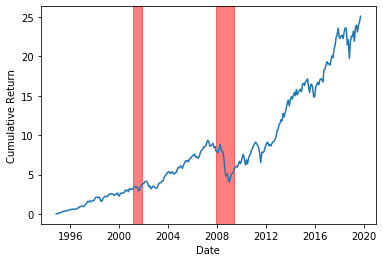

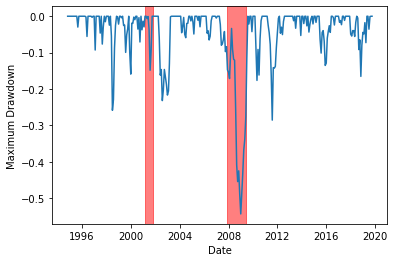

>> Average monthly return:  1.2 %
>> Monthly sharpe ratio:  0.26318448334150485
>> Annualised return:  13.94 %
>> Annualised Sharpe ratio:  0.884
>> Annualised Sharpe ratio 1:  0.912
>> Maxiumum drawdown:  [54.28273665]%
>> Maxiumum drawdown:  [54.28273665]%
>> One-month maxiumum drawdown:  [21.93270423]%
>> Skewness:  [-0.63963493]
>> Kurtosis:  [2.06233088]


In [257]:
monthly_cum_ret_vw_X_linear, monthly_drawdown_vw_X_linear, anomaly_vx_X_linear = get_cumulative_return(df_X_linear, 10, value_weighted = True)

In [203]:
sp = pd.read_csv('SP500.csv')
sp = pd.read_csv('SP500.csv')
sp = sp.astype({'Date':'datetime64[ns]'})
sp = sp.loc[:, ['Date', 'Adj Close']].set_index('Date')
y_index = ('1994-10-31' <= sp.index.get_level_values(0)) & (sp.index.get_level_values(0) <= '2019-10-31')
sp_daily = sp[y_index]
sp_monthly = sp_daily.resample('BMS').first()
sp_monthly['Return'] = sp_monthly.pct_change()
sp_monthly = sp_monthly.dropna()
monthly_cum_ret_sp500 = pd.DataFrame((1+sp_monthly['Return']).cumprod() - 1)
# Calculate the maximum value of returns using rolling().max()
roll_max_sp500 = monthly_cum_ret_sp500.rolling(min_periods=1,window=12).max()
monthly_drawdown_sp500 = monthly_cum_ret_sp500/roll_max_sp500 - 1.0
monthly_drawdown_sp500 = monthly_drawdown_sp500.rename(columns = {'Returns': 'Maximum Drawdown'})
display(sp_monthly)
display(monthly_cum_ret_sp500)
display(monthly_drawdown_sp500[3:])

Adj Close    Return
Date                             
1994-11-01   468.420013 -0.008320
1994-12-01   448.920013 -0.041629
1995-01-02   459.109985  0.022699
1995-02-01   470.399994  0.024591
1995-03-01   485.649994  0.032419
...                 ...       ...
2019-06-03  2744.449951 -0.061319
2019-07-01  2964.330078  0.080118
2019-08-01  2953.560059 -0.003633
2019-09-02  2906.270020 -0.016011
2019-10-01  2940.250000  0.011692

[300 rows x 2 columns]

Return
Date                
1994-11-01 -0.008320
1994-12-01 -0.049603
1995-01-02 -0.028030
1995-02-01 -0.004128
1995-03-01  0.028157
...              ...
2019-06-03  4.810204
2019-07-01  5.275707
2019-08-01  5.252906
2019-09-02  5.152789
2019-10-01  5.224727

[300 rows x 1 columns]

Return
Date                
1995-02-01  0.000000
1995-03-01  0.000000
1995-04-03  0.000000
1995-05-01  0.000000
1995-06-01  0.000000
...              ...
2019-06-03 -0.073459
2019-07-01  0.000000
2019-08-01 -0.004322
2019-09-02 -0.023299
2019-10-01 -0.009663

[297 rows x 1 columns]

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

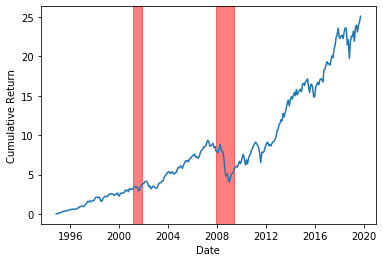

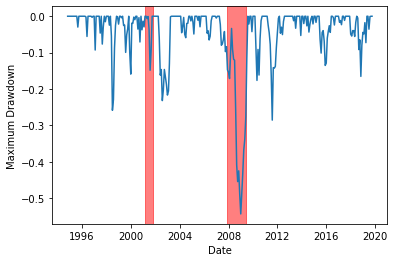

>> Average monthly return:  1.2 %
>> Monthly sharpe ratio:  0.26318448334150485
>> Annualised return:  13.94 %
>> Annualised Sharpe ratio:  0.884
>> Annualised Sharpe ratio 1:  0.912
>> Maxiumum drawdown:  [54.28273665]%
>> Maxiumum drawdown:  [54.28273665]%
>> One-month maxiumum drawdown:  [21.93270423]%
>> Skewness:  [-0.63963493]
>> Kurtosis:  [2.06233088]


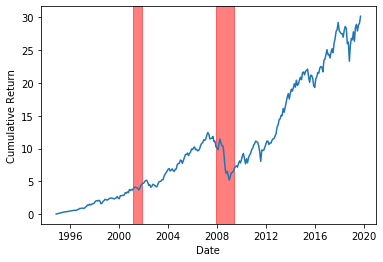

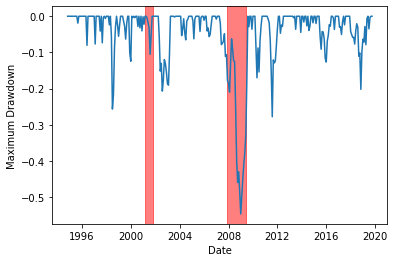

>> Average monthly return:  1.26 %
>> Monthly sharpe ratio:  0.273902022081514
>> Annualised return:  14.75 %
>> Annualised Sharpe ratio:  0.926
>> Annualised Sharpe ratio 1:  0.949
>> Maxiumum drawdown:  [54.62300397]%
>> Maxiumum drawdown:  [54.62300397]%
>> One-month maxiumum drawdown:  [22.5605592]%
>> Skewness:  [-0.60003648]
>> Kurtosis:  [2.54062112]


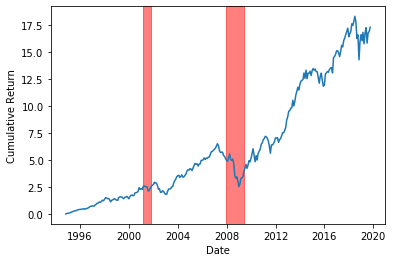

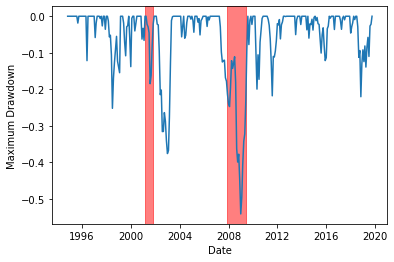

>> Average monthly return:  1.07 %
>> Monthly sharpe ratio:  0.24067903558511372
>> Annualised return:  12.33 %
>> Annualised Sharpe ratio:  0.798
>> Annualised Sharpe ratio 1:  0.834
>> Maxiumum drawdown:  [54.08272389]%
>> Maxiumum drawdown:  [54.08272389]%
>> One-month maxiumum drawdown:  [24.56118172]%
>> Skewness:  [-0.6532595]
>> Kurtosis:  [1.99654422]


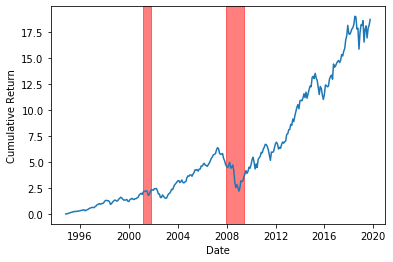

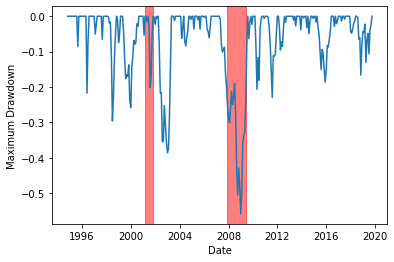

>> Average monthly return:  1.12 %
>> Monthly sharpe ratio:  0.23228103843386916
>> Annualised return:  12.67 %
>> Annualised Sharpe ratio:  0.762
>> Annualised Sharpe ratio 1:  0.805
>> Maxiumum drawdown:  [55.81521562]%
>> Maxiumum drawdown:  [55.81521562]%
>> One-month maxiumum drawdown:  [27.58661934]%
>> Skewness:  [-0.60472373]
>> Kurtosis:  [2.35697246]


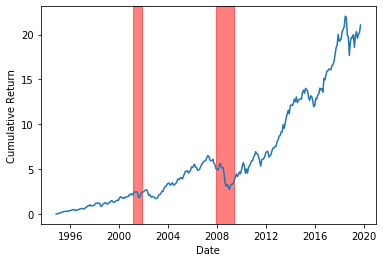

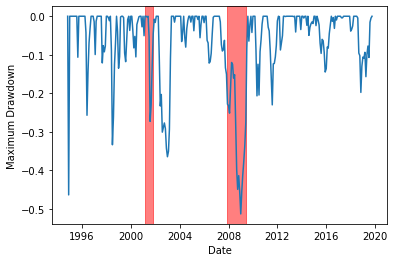

>> Average monthly return:  1.14 %
>> Monthly sharpe ratio:  0.2482491043930065
>> Annualised return:  13.17 %
>> Annualised Sharpe ratio:  0.825
>> Annualised Sharpe ratio 1:  0.86
>> Maxiumum drawdown:  [51.32797706]%
>> Maxiumum drawdown:  [51.32797706]%
>> One-month maxiumum drawdown:  [46.38986712]%
>> Skewness:  [-0.84304555]
>> Kurtosis:  [1.72263641]


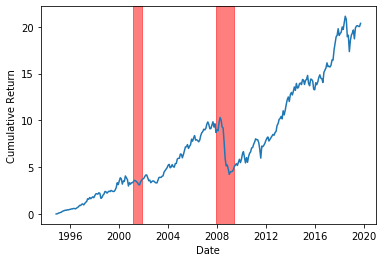

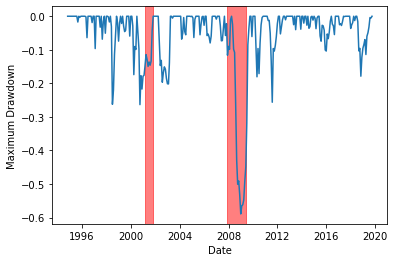

>> Average monthly return:  1.14 %
>> Monthly sharpe ratio:  0.23903237648643003
>> Annualised return:  13.03 %
>> Annualised Sharpe ratio:  0.788
>> Annualised Sharpe ratio 1:  0.828
>> Maxiumum drawdown:  [58.91653418]%
>> Maxiumum drawdown:  [58.91653418]%
>> One-month maxiumum drawdown:  [23.91093284]%
>> Skewness:  [-0.73484655]
>> Kurtosis:  [2.57214214]


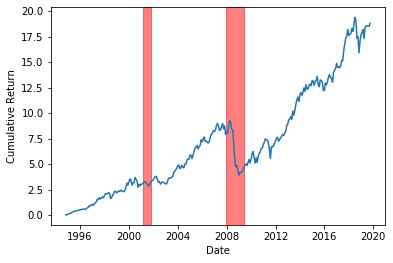

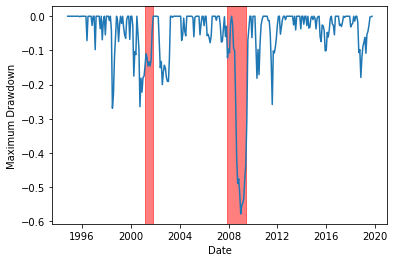

>> Average monthly return:  1.11 %
>> Monthly sharpe ratio:  0.2365465692338434
>> Annualised return:  12.69 %
>> Annualised Sharpe ratio:  0.779
>> Annualised Sharpe ratio 1:  0.819
>> Maxiumum drawdown:  [57.86535472]%
>> Maxiumum drawdown:  [57.86535472]%
>> One-month maxiumum drawdown:  [23.7967676]%
>> Skewness:  [-0.74332861]
>> Kurtosis:  [2.42942055]


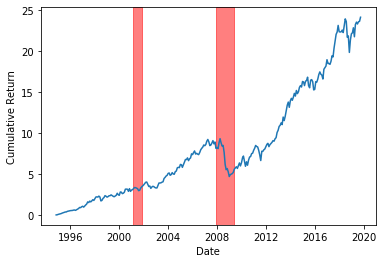

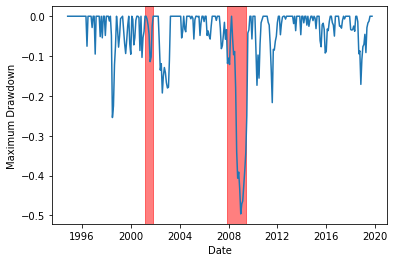

>> Average monthly return:  1.17 %
>> Monthly sharpe ratio:  0.2794975474494419
>> Annualised return:  13.77 %
>> Annualised Sharpe ratio:  0.951
>> Annualised Sharpe ratio 1:  0.968
>> Maxiumum drawdown:  [49.62221229]%
>> Maxiumum drawdown:  [49.62221229]%
>> One-month maxiumum drawdown:  [21.62542716]%
>> Skewness:  [-0.6207529]
>> Kurtosis:  [1.70411974]


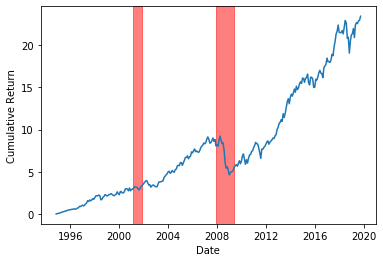

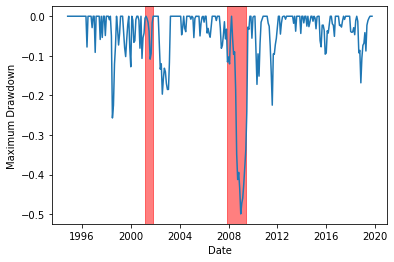

>> Average monthly return:  1.16 %
>> Monthly sharpe ratio:  0.27731019065199186
>> Annualised return:  13.64 %
>> Annualised Sharpe ratio:  0.942
>> Annualised Sharpe ratio 1:  0.961
>> Maxiumum drawdown:  [49.94946093]%
>> Maxiumum drawdown:  [49.94946093]%
>> One-month maxiumum drawdown:  [21.78873125]%
>> Skewness:  [-0.65482254]
>> Kurtosis:  [1.75833756]


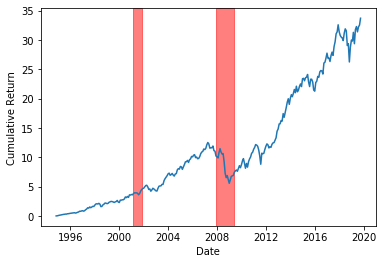

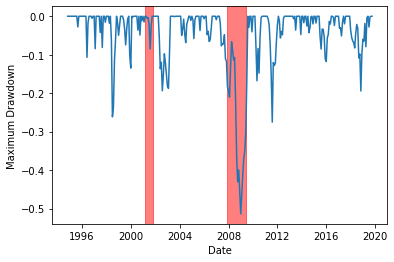

>> Average monthly return:  1.29 %
>> Monthly sharpe ratio:  0.28364378968224696
>> Annualised return:  15.24 %
>> Annualised Sharpe ratio:  0.965
>> Annualised Sharpe ratio 1:  0.983
>> Maxiumum drawdown:  [51.39914348]%
>> Maxiumum drawdown:  [51.39914348]%
>> One-month maxiumum drawdown:  [21.41602042]%
>> Skewness:  [-0.53119198]
>> Kurtosis:  [2.11479971]


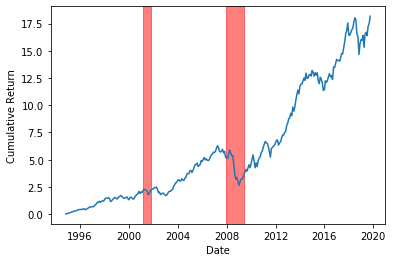

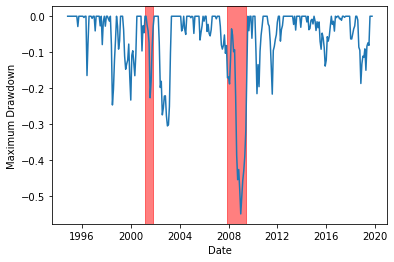

>> Average monthly return:  1.08 %
>> Monthly sharpe ratio:  0.25207216344383043
>> Annualised return:  12.54 %
>> Annualised Sharpe ratio:  0.843
>> Annualised Sharpe ratio 1:  0.873
>> Maxiumum drawdown:  [55.00487784]%
>> Maxiumum drawdown:  [55.00487784]%
>> One-month maxiumum drawdown:  [21.96173403]%
>> Skewness:  [-0.78112522]
>> Kurtosis:  [1.42156358]


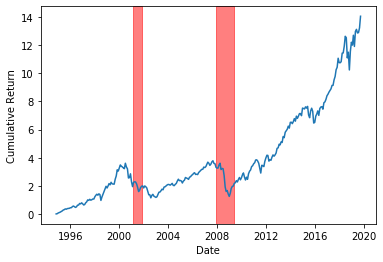

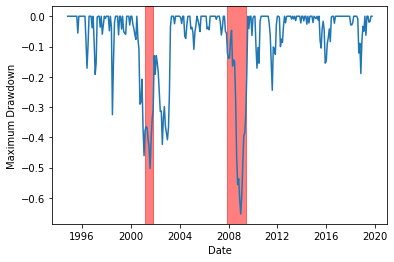

>> Average monthly return:  1.04 %
>> Monthly sharpe ratio:  0.20653276574366092
>> Annualised return:  11.45 %
>> Annualised Sharpe ratio:  0.659
>> Annualised Sharpe ratio 1:  0.715
>> Maxiumum drawdown:  [65.30257445]%
>> Maxiumum drawdown:  [65.30257445]%
>> One-month maxiumum drawdown:  [30.04014436]%
>> Skewness:  [-0.80893551]
>> Kurtosis:  [2.1901869]


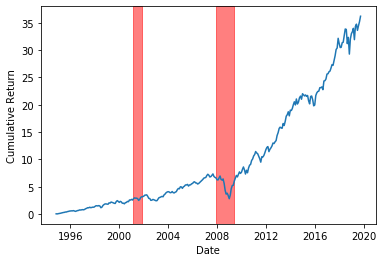

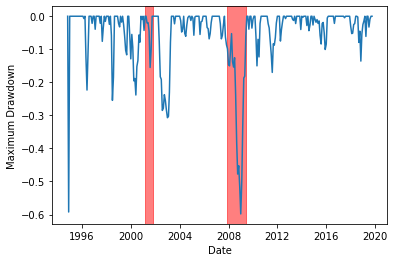

>> Average monthly return:  1.32 %
>> Monthly sharpe ratio:  0.2783088782722339
>> Annualised return:  15.56 %
>> Annualised Sharpe ratio:  0.944
>> Annualised Sharpe ratio 1:  0.964
>> Maxiumum drawdown:  [59.81349913]%
>> Maxiumum drawdown:  [59.81349913]%
>> One-month maxiumum drawdown:  [59.23538139]%
>> Skewness:  [-0.06049781]
>> Kurtosis:  [3.5354839]


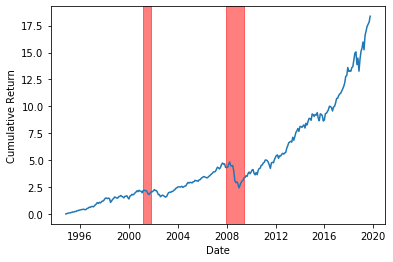

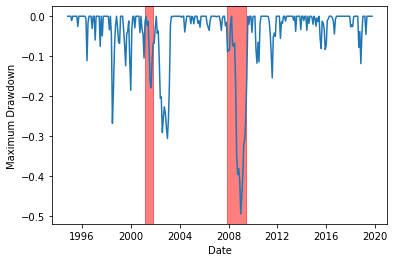

>> Average monthly return:  1.06 %
>> Monthly sharpe ratio:  0.2917157761139407
>> Annualised return:  12.58 %
>> Annualised Sharpe ratio:  1.0
>> Annualised Sharpe ratio 1:  1.011
>> Maxiumum drawdown:  [49.49295106]%
>> Maxiumum drawdown:  [49.49295106]%
>> One-month maxiumum drawdown:  [23.2273081]%
>> Skewness:  [-0.9260245]
>> Kurtosis:  [2.72670172]


In [263]:
monthly_cum_ret_vw_X_linear, monthly_drawdown_vw_X_linear, anomaly_vx_X_linear = get_cumulative_return(df_X_linear, 10, value_weighted = True)
monthly_cum_ret_vw_firm_char_linear, monthly_drawdown_vw_firm_char_linear, anomaly_vw_firm_char_linear = get_cumulative_return(df_firm_char_linear, 10, value_weighted = True)
monthly_cum_ret_vw_ff3, monthly_drawdown_vw_ff3, anomaly_vw_ff3 = get_cumulative_return(df_ff3, 10, value_weighted = True)
monthly_cum_ret_vw_ff5, monthly_drawdown_vw_ff5, anomaly_vw_ff5 = get_cumulative_return(df_ff5, 10, value_weighted = True)
monthly_cum_ret_vw_ff6, monthly_drawdown_vw_ff6, anomaly_vw_ff6 = get_cumulative_return(df_ff6, 10, value_weighted = True)
monthly_cum_ret_vw_firm_char_lasso, monthly_drawdown_vw_firm_char_lasso, anomaly_vw_firm_char_lasso = get_cumulative_return(df_firm_char_lasso, 10, value_weighted = True)
monthly_cum_ret_vw_X_lasso, monthly_drawdown_vw_X_lasso, anomaly_vw_X_lasso = get_cumulative_return(df_X_lasso, 10, value_weighted = True)
monthly_cum_ret_vw_firm_char_ElasticNet, monthly_drawdown_vw_firm_char_ElasticNet, anomaly_vw_firm_char_ElasticNet = get_cumulative_return(df_firm_char_ElasticNet, 10, value_weighted = True)
monthly_cum_ret_vw_X_ElasticNet, monthly_drawdown_vw_X_ElasticNet, anomaly_vw_X_ElasticNet = get_cumulative_return(df_X_ElasticNet, 10, value_weighted = True)
monthly_cum_ret_vw_firm_char_PLS, monthly_drawdown_vw_firm_char_PLS, anomaly_vw_firm_char_PLS = get_cumulative_return(df_firm_char_PLS, 10, value_weighted = True)
monthly_cum_ret_vw_X_PLS, monthly_drawdown_vw_X_PLS, anomaly_vw_X_PLS = get_cumulative_return(df_X_PLS, 10, value_weighted = True)
monthly_cum_ret_vw_firm_char_FNN, monthly_drawdown_vw_firm_char_FNN, anomaly_vw_firm_char_FNN = get_cumulative_return(df_firm_char_FNN, 10, value_weighted = True)
monthly_cum_ret_vw_X_FNN, monthly_drawdown_vw_X_FNN, anomaly_vw_X_FNN = get_cumulative_return(df_X_FNN, 10, value_weighted = True)
monthly_cum_ret_vw_X_LSTM_FNN, monthly_drawdown_vw_X_LSTM_FNN, anomaly_vw_X_LSTM_FNN = get_cumulative_return(df_X_LSTM_FNN_2, 10, value_weighted = True)

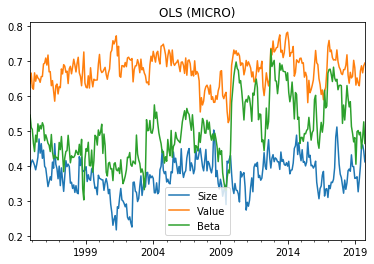

In [289]:
fig = anomaly_vw_firm_char_linear.plot(legend = True, title = 'OLS (MICRO)').get_figure()

fig.savefig('anomaly_vw_firm_char_linear.png')

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

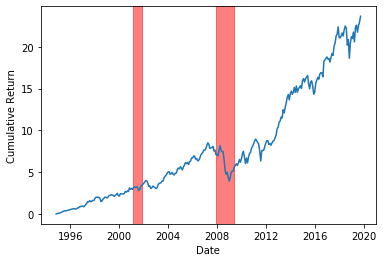

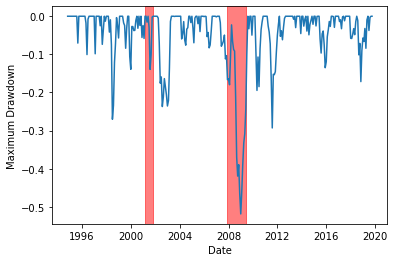

>> Average monthly return:  1.18 %
>> Monthly sharpe ratio:  0.2580201873881796
>> Annualised return:  13.68 %
>> Annualised Sharpe ratio:  0.864
>> Annualised Sharpe ratio 1:  0.894
>> Maxiumum drawdown:  [51.87036557]%
>> Maxiumum drawdown:  [51.87036557]%
>> One-month maxiumum drawdown:  [21.12867313]%
>> Skewness:  [-0.56708691]
>> Kurtosis:  [1.50285084]


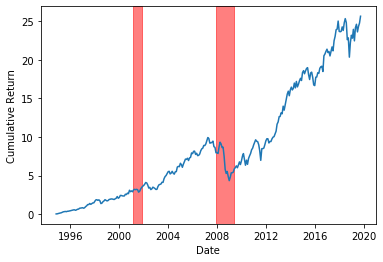

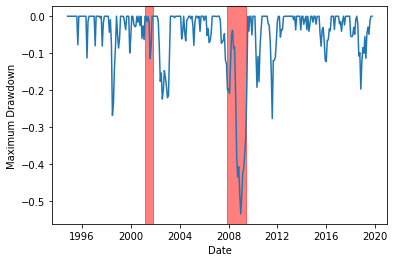

>> Average monthly return:  1.21 %
>> Monthly sharpe ratio:  0.26264678410031644
>> Annualised return:  14.03 %
>> Annualised Sharpe ratio:  0.882
>> Annualised Sharpe ratio 1:  0.91
>> Maxiumum drawdown:  [53.4364233]%
>> Maxiumum drawdown:  [53.4364233]%
>> One-month maxiumum drawdown:  [22.44959446]%
>> Skewness:  [-0.6132438]
>> Kurtosis:  [2.1242094]


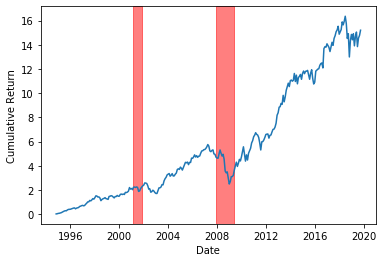

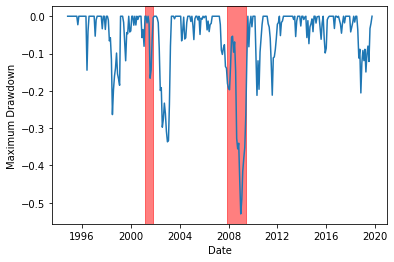

>> Average monthly return:  1.03 %
>> Monthly sharpe ratio:  0.23796666941732822
>> Annualised return:  11.78 %
>> Annualised Sharpe ratio:  0.789
>> Annualised Sharpe ratio 1:  0.824
>> Maxiumum drawdown:  [53.00717945]%
>> Maxiumum drawdown:  [53.00717945]%
>> One-month maxiumum drawdown:  [21.27220362]%
>> Skewness:  [-0.59938389]
>> Kurtosis:  [1.43447728]


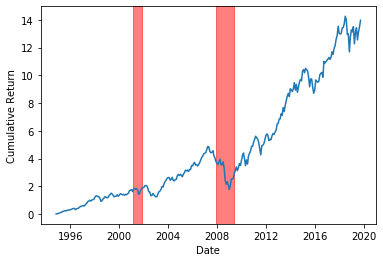

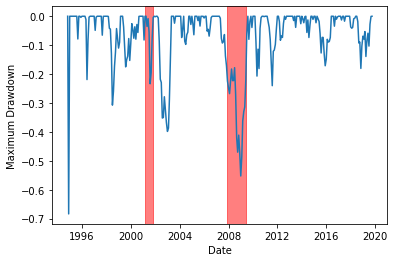

>> Average monthly return:  1.01 %
>> Monthly sharpe ratio:  0.22258998706310368
>> Annualised return:  11.43 %
>> Annualised Sharpe ratio:  0.727
>> Annualised Sharpe ratio 1:  0.771
>> Maxiumum drawdown:  [68.37163397]%
>> Maxiumum drawdown:  [68.37163397]%
>> One-month maxiumum drawdown:  [68.37163397]%
>> Skewness:  [-0.59327284]
>> Kurtosis:  [1.85578582]


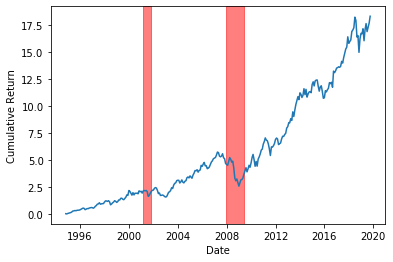

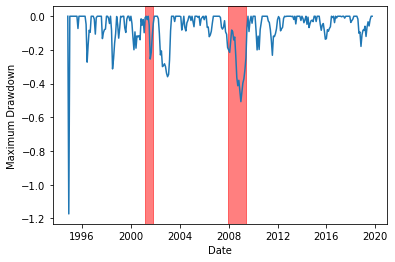

>> Average monthly return:  1.1 %
>> Monthly sharpe ratio:  0.23394024046486003
>> Annualised return:  12.58 %
>> Annualised Sharpe ratio:  0.769
>> Annualised Sharpe ratio 1:  0.81
>> Maxiumum drawdown:  [117.29046171]%
>> Maxiumum drawdown:  [117.29046171]%
>> One-month maxiumum drawdown:  [117.29046171]%
>> Skewness:  [-0.49254834]
>> Kurtosis:  [1.0656564]


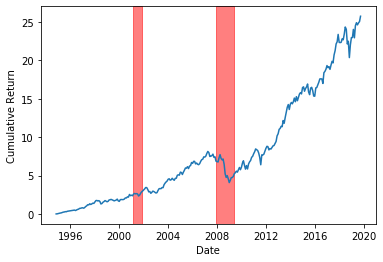

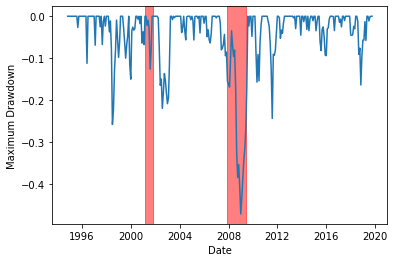

>> Average monthly return:  1.18 %
>> Monthly sharpe ratio:  0.29045589238798825
>> Annualised return:  14.05 %
>> Annualised Sharpe ratio:  0.994
>> Annualised Sharpe ratio 1:  1.006
>> Maxiumum drawdown:  [47.01141641]%
>> Maxiumum drawdown:  [47.01141641]%
>> One-month maxiumum drawdown:  [19.48921637]%
>> Skewness:  [-0.56809117]
>> Kurtosis:  [1.85810992]


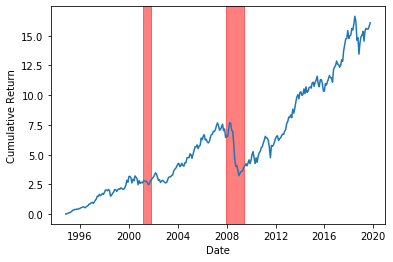

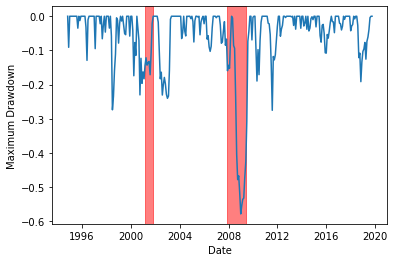

>> Average monthly return:  1.06 %
>> Monthly sharpe ratio:  0.2248638816812949
>> Annualised return:  12.02 %
>> Annualised Sharpe ratio:  0.734
>> Annualised Sharpe ratio 1:  0.779
>> Maxiumum drawdown:  [57.89877354]%
>> Maxiumum drawdown:  [57.89877354]%
>> One-month maxiumum drawdown:  [22.92662371]%
>> Skewness:  [-0.62393768]
>> Kurtosis:  [1.87083666]


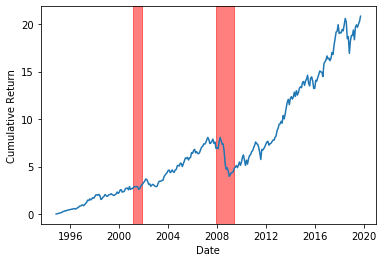

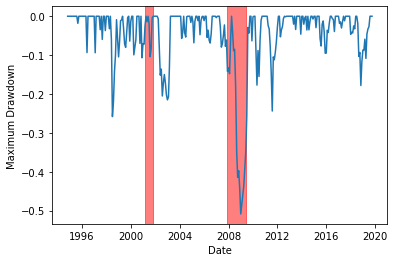

>> Average monthly return:  1.12 %
>> Monthly sharpe ratio:  0.2664716743205226
>> Annualised return:  13.13 %
>> Annualised Sharpe ratio:  0.9
>> Annualised Sharpe ratio 1:  0.923
>> Maxiumum drawdown:  [50.87133498]%
>> Maxiumum drawdown:  [50.87133498]%
>> One-month maxiumum drawdown:  [21.0649174]%
>> Skewness:  [-0.67722804]
>> Kurtosis:  [1.6473221]


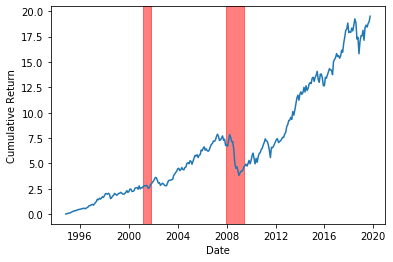

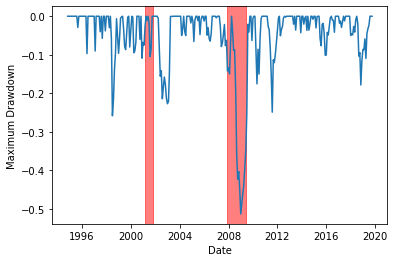

>> Average monthly return:  1.1 %
>> Monthly sharpe ratio:  0.26175192854468676
>> Annualised return:  12.84 %
>> Annualised Sharpe ratio:  0.881
>> Annualised Sharpe ratio 1:  0.907
>> Maxiumum drawdown:  [51.35224988]%
>> Maxiumum drawdown:  [51.35224988]%
>> One-month maxiumum drawdown:  [21.17874058]%
>> Skewness:  [-0.70192899]
>> Kurtosis:  [1.73572081]


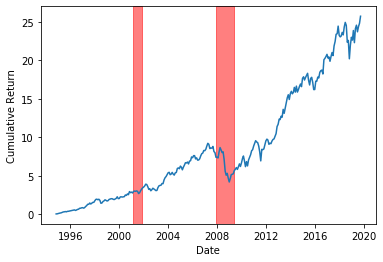

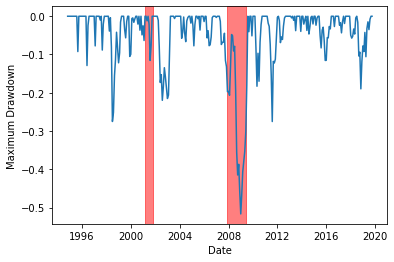

>> Average monthly return:  1.21 %
>> Monthly sharpe ratio:  0.2648308997408946
>> Annualised return:  14.05 %
>> Annualised Sharpe ratio:  0.891
>> Annualised Sharpe ratio 1:  0.917
>> Maxiumum drawdown:  [51.67168761]%
>> Maxiumum drawdown:  [51.67168761]%
>> One-month maxiumum drawdown:  [21.36855153]%
>> Skewness:  [-0.54366174]
>> Kurtosis:  [1.79490652]


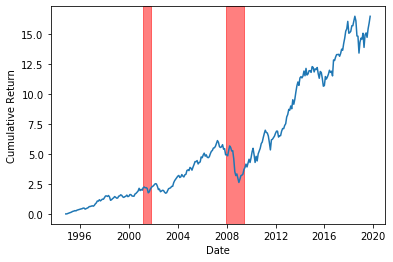

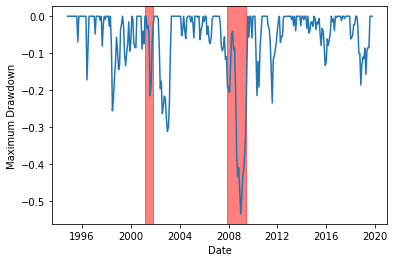

>> Average monthly return:  1.05 %
>> Monthly sharpe ratio:  0.24359263716147325
>> Annualised return:  12.12 %
>> Annualised Sharpe ratio:  0.81
>> Annualised Sharpe ratio 1:  0.844
>> Maxiumum drawdown:  [53.5219081]%
>> Maxiumum drawdown:  [53.5219081]%
>> One-month maxiumum drawdown:  [22.96961025]%
>> Skewness:  [-0.73791147]
>> Kurtosis:  [1.55251788]


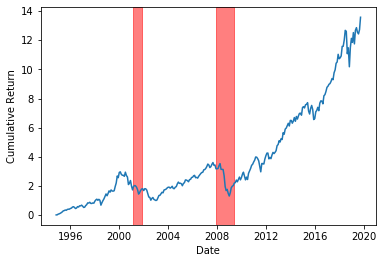

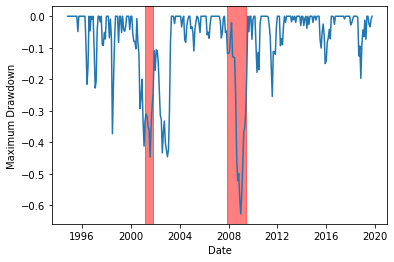

>> Average monthly return:  1.02 %
>> Monthly sharpe ratio:  0.20707364240619622
>> Annualised return:  11.31 %
>> Annualised Sharpe ratio:  0.663
>> Annualised Sharpe ratio 1:  0.717
>> Maxiumum drawdown:  [62.73929302]%
>> Maxiumum drawdown:  [62.73929302]%
>> One-month maxiumum drawdown:  [32.66199351]%
>> Skewness:  [-0.64207149]
>> Kurtosis:  [1.64181657]


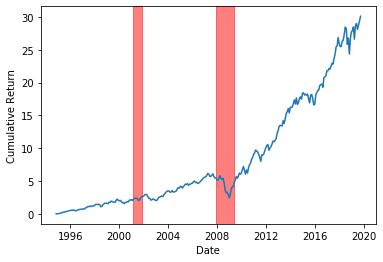

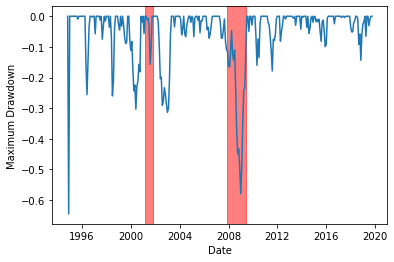

>> Average monthly return:  1.26 %
>> Monthly sharpe ratio:  0.2704000247945099
>> Annualised return:  14.74 %
>> Annualised Sharpe ratio:  0.913
>> Annualised Sharpe ratio 1:  0.937
>> Maxiumum drawdown:  [64.53376642]%
>> Maxiumum drawdown:  [64.53376642]%
>> One-month maxiumum drawdown:  [64.53376642]%
>> Skewness:  [-0.24712843]
>> Kurtosis:  [2.17224065]


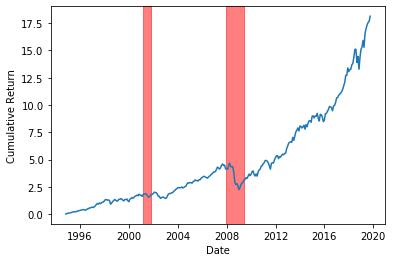

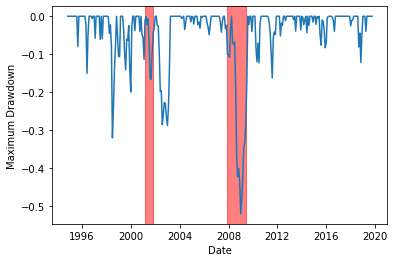

>> Average monthly return:  1.06 %
>> Monthly sharpe ratio:  0.2856382758114036
>> Annualised return:  12.53 %
>> Annualised Sharpe ratio:  0.976
>> Annualised Sharpe ratio 1:  0.989
>> Maxiumum drawdown:  [51.97135047]%
>> Maxiumum drawdown:  [51.97135047]%
>> One-month maxiumum drawdown:  [26.32477215]%
>> Skewness:  [-0.95961776]
>> Kurtosis:  [3.09250687]


In [205]:
monthly_cum_ret_ew_X_linear, monthly_drawdown_ew_X_linear = get_cumulative_return(df_X_linear, 10, equally_weighted = True)
monthly_cum_ret_ew_firm_char_linear, monthly_drawdown_ew_firm_char_linear = get_cumulative_return(df_firm_char_linear, 10, equally_weighted = True)
monthly_cum_ret_ew_ff3, monthly_drawdown_ew_ff3 = get_cumulative_return(df_ff3, 10, equally_weighted = True)
monthly_cum_ret_ew_ff5, monthly_drawdown_ew_ff5 = get_cumulative_return(df_ff5, 10, equally_weighted = True)
monthly_cum_ret_ew_ff6, monthly_drawdown_ew_ff6 = get_cumulative_return(df_ff6, 10, equally_weighted = True)
monthly_cum_ret_ew_firm_char_lasso, monthly_drawdown_ew_firm_char_lasso = get_cumulative_return(df_firm_char_lasso_2, 10, equally_weighted = True)
monthly_cum_ret_ew_X_lasso, monthly_drawdown_ew_X_lasso = get_cumulative_return(df_X_lasso, 10, equally_weighted = True)
monthly_cum_ret_ew_firm_char_ElasticNet, monthly_drawdown_ew_firm_char_ElasticNet = get_cumulative_return(df_firm_char_ElasticNet, 10, equally_weighted = True)
monthly_cum_ret_ew_X_ElasticNet, monthly_drawdown_ew_X_ElasticNet = get_cumulative_return(df_X_ElasticNet, 10, equally_weighted = True)
monthly_cum_ret_ew_firm_char_PLS, monthly_drawdown_ew_firm_char_PLS = get_cumulative_return(df_firm_char_PLS, 10, equally_weighted = True)
monthly_cum_ret_ew_X_PLS, monthly_drawdown_ew_X_PLS = get_cumulative_return(df_X_PLS, 10, equally_weighted = True)
monthly_cum_ret_ew_firm_char_FNN, monthly_drawdown_ew_firm_char_FNN = get_cumulative_return(df_firm_char_FNN, 10, equally_weighted = True)
monthly_cum_ret_ew_X_FNN, monthly_drawdown_ew_X_FNN = get_cumulative_return(df_X_FNN, 10, equally_weighted = True)
monthly_cum_ret_ew_X_LSTM_FNN, monthly_drawdown_ew_X_LSTM_FNN = get_cumulative_return(df_X_LSTM_FNN_2, 10, equally_weighted = True)

In [ ]:
    dot_com_bubble_start = datetime(2001,3,1)
    dot_com_bubble_end = datetime(2001,11,1)
    financial_crisis_start = datetime(2007,12,1)
    financial_crisis_end = datetime(2009,6,1)
    
    fig = plt.figure()
    
    plt.axvspan(dot_com_bubble_start, dot_com_bubble_end, color='red', alpha = 0.1)
    plt.axvspan(financial_crisis_start, financial_crisis_end, color='red', alpha = 0.1)
    
    plt.plot(monthly_drawdown_sp500[3:], label='S&P 500')
    
    plt.plot(monthly_drawdown_vw_X_linear, label='OLS (FULL)')
    
    plt.plot(monthly_drawdown_vw_firm_char_linear, label='OLS (MICRO)')
    
    plt.plot(monthly_drawdown_vw_ff3, label='OLS (FF3)')
    
    plt.plot(monthly_drawdown_vw_ff5, label='OLS (FF5)')
    
    plt.plot(monthly_drawdown_vw_ff6, label='OLS (FF6)')
    
    plt.plot(monthly_drawdown_vw_firm_char_lasso, label='Lasso (MICRO)')
    
    plt.plot(monthly_drawdown_vw_X_lasso, label='Lasso (FULL)')
    
    plt.plot(monthly_drawdown_vw_X_ElasticNet, label='ElasticNet (FULL)')
    
    plt.plot(monthly_drawdown_vw_firm_char_ElasticNet, label='ElasticNet (MICRO)')
    
    plt.plot(monthly_drawdown_vw_X_PLS, label='ElasticNet (FULL)')
    
    plt.plot(monthly_drawdown_vw_firm_char_PLS, label='ElasticNet (MICRO)')
    
    plt.plot(monthly_drawdown_vw_firm_char_FNN, label='FNN3 (MICRO)')
    
    plt.plot(monthly_drawdown_vw_X_FNN, label='FNN3 (FULL)')
    
    plt.plot(monthly_drawdown_vw_X_LSTM_FNN, label='LSTM-FNN3 (FULL)')
    
    plt.legend(loc=4, prop={'size': 10})
    
    plt.title('Maximum drawdown of various machine learning methods')
    
    plt.xlabel('Date')
    
    plt.ylabel('Maximum Drawdown')
    
    plt.show()
    
    fig.savefig('maximum_drawdown_vw.png')


In [ ]:
    dot_com_bubble_start = datetime(2001,3,1)
    dot_com_bubble_end = datetime(2001,11,1)
    financial_crisis_start = datetime(2007,12,1)
    financial_crisis_end = datetime(2009,6,1)
    
    fig = plt.figure()
    
    plt.axvspan(dot_com_bubble_start, dot_com_bubble_end, color='red', alpha = 0.1)
    plt.axvspan(financial_crisis_start, financial_crisis_end, color='red', alpha = 0.1)
    
    plt.plot(monthly_cum_ret_sp500, label='S&P 500')
    
    plt.plot(monthly_cum_ret_vw_X_linear, label='OLS (FULL)')
    
    plt.plot(monthly_cum_ret_vw_firm_char_linear, label='OLS (MICRO)')
    
    plt.plot(monthly_cum_ret_vw_ff3, label='OLS (FF3)')
    
    plt.plot(monthly_cum_ret_vw_ff5, label='OLS (FF5)')
    
    plt.plot(monthly_cum_ret_vw_ff6, label='OLS (FF6)')
    
    plt.plot(monthly_cum_ret_vw_firm_char_lasso, label='Lasso (MICRO)')
    
    plt.plot(monthly_cum_ret_vw_X_lasso, label='Lasso (FULL)')
    
    plt.plot(monthly_cum_ret_vw_X_ElasticNet, label='ElasticNet (FULL)')
    
    plt.plot(monthly_cum_ret_vw_firm_char_ElasticNet, label='ElasticNet (MICRO)')
    
    plt.plot(monthly_cum_ret_vw_X_PLS, label='ElasticNet (FULL)')
    
    plt.plot(monthly_cum_ret_vw_firm_char_PLS, label='ElasticNet (MICRO)')
    
    plt.plot(monthly_cum_ret_vw_firm_char_FNN, label='FNN3 (MICRO)')
    
    plt.plot(monthly_cum_ret_vw_X_FNN, label='FNN3 (FULL)')
    
    plt.plot(monthly_cum_ret_vw_X_LSTM_FNN, label='LSTM-FNN3 (FULL)')
    
    plt.legend(loc=2, prop={'size': 10})
               
    plt.title('Cumulative return of various machine learning methods')
     
    plt.xlabel('Date')
    
    plt.ylabel('Cumulative Return')
    
    plt.show()
    
    fig.savefig('cum_ret_vw.png')

In [228]:
def get_industrial_performance(df, quantile, equally_weighted = None, value_weighted = None):
    
    industry_list = ['Agriculture, Forestry & Fishing, Manufacturing', 'Mining, Construction', 
                 'Transportation & Public Utilities', 'Wholesale Trade & Retail Trade', 
                  'Finance, Insurance, & Real Estate', 'Service', 'Others']    
    
    for industry in industry_list:
        
        print('------------------------------------')
        
        print('>> Industry name: ', industry)
        
        print('------------------------------------')
                        
        df_indus = get_industry_df(df, industry)
        
        R_SQUARED_OOS_indus = get_oos_rquared(df_indus)
        
        returns = list()

        date_unique_list =  df_indus['date'].unique()
    
        for date in date_unique_list:
            
            date_df = df_indus.loc[df_indus['date'] == date, ]
        
            date_df.groupby(['date'])
        
            Quantile_List = [num for num in range(1, quantile+1)]
            
            date_df['quantile'] = pd.qcut(date_df['Prediction'], q= [num/quantile for num in range(0, quantile+1)], 
                                          labels= Quantile_List, duplicates = 'drop')
                
            date_df.sort_values(by=['quantile'], inplace = True)
        
            date_df['n_size'] = (date_df['size'] - 
                                 date_df['size'].min())/(date_df['size'].max() - date_df['size'].min())

            winner = date_df.loc[date_df['quantile'] == quantile, ]
        
            loser = date_df.loc[date_df['quantile'] == 1, ]
        
            if value_weighted:
                
                winner['return'] = winner['Actual'] * (winner['n_size'] / winner['n_size'].sum())
        
                loser['return'] = loser['Actual'] * (loser['n_size'] / loser['n_size'].sum())
                        
                #return_this_month = winner['return'].sum() - loser['return'].sum()
            
                return_this_month = winner['return'].sum()
            
            
            if equally_weighted:
            
                winner['return'] = winner['Actual'] * (1 / len(winner['Actual']))
            
                loser['return'] = loser['Actual'] * (1 / len(loser['Actual']))
                        
                #return_this_month = winner['return'].sum() - loser['return'].sum()
            
                return_this_month = winner['return'].sum()
            
            returns.append(return_this_month)
        
        returns_df = pd.DataFrame(returns, index = date_unique_list, columns = ['Returns'])
        
        monthly_cum_ret = (1+returns_df['Returns']).cumprod() - 1
    
        monthly_cum_ret = pd.DataFrame(monthly_cum_ret, index = date_unique_list, columns = ['Returns'])
            
        annualised_ret = ((1 + monthly_cum_ret['Returns'][-1])**(1/25)) - 1 
    
        average_monthly_ret = returns_df['Returns'].mean()
        
        annualised_ret_1 = average_monthly_ret*12
    
        average_monthly_vol = returns_df['Returns'].std()
    
        annualised_vol = average_monthly_vol*np.sqrt(12)
    
        risk_free = 0
     
        monthly_sharpe_ratio = (average_monthly_ret - risk_free) / average_monthly_vol
    
        annualised_sharpe_ratio = (annualised_ret - risk_free) / annualised_vol
    
        annualised_sharpe_ratio_1 = (annualised_ret_1 - risk_free) / annualised_vol
    
        annualised_sharpe_ratio_2 = monthly_sharpe_ratio * np.sqrt(12)
    
        skew = returns_df.skew().values
    
        kurt = returns_df.kurtosis().values
    
        # Calculate the maximum value of returns using rolling().max()
        roll_max = monthly_cum_ret.rolling(min_periods=1,window=12).max()
    
        # Calculate the maximum value of returns using rolling().max()
        roll_max_one_month = monthly_cum_ret.rolling(min_periods=1,window=2).max()
    
        # Calculate monthly draw-down from rolling max
        monthly_drawdown = monthly_cum_ret/roll_max - 1.0
     
        monthly_drawdown = monthly_drawdown.rename(columns = {'Returns': 'Maximum Drawdown'})
        
        # Calculate monthly draw-down from rolling max
        monthly_drawdown_one_month = monthly_cum_ret/roll_max_one_month - 1.0

        # Calculate maximum monthly draw-down
        max_monthly_drawdown = monthly_drawdown.rolling(min_periods=1,window=12).min()
    
        # Calculate maximum one month draw-down
        max_monthly_drawdown_one_month = monthly_drawdown_one_month.rolling(min_periods=1,window=2).min()

    
        print('>> Average monthly return: ', round(average_monthly_ret*100, 2), '%')
        
        print('>> Monthly sharpe ratio: ', monthly_sharpe_ratio)

        print('>> Annualised return: ', round(annualised_ret*100, 2), '%')
 
        print('>> Annualised Sharpe ratio: ', round(annualised_sharpe_ratio, 3))    
        print('>> Annualised Sharpe ratio 1: ', round(annualised_sharpe_ratio_1, 3))
          
        print('>> Maxiumum drawdown: ', str(-np.min(max_monthly_drawdown).values*100) + '%')
    
        print('>> Maxiumum drawdown: ', str(-np.min(monthly_drawdown).values*100) + '%')
    
        print('>> One-month maxiumum drawdown: ', str(-np.min(monthly_drawdown_one_month).values*100) + '%')

        print('>> Skewness: ', skew)
     
        print('>> Kurtosis: ', kurt) 

In [229]:
get_industrial_performance(df_X_linear, 10, value_weighted = True)

------------------------------------
>> Industry name:  Agriculture, Forestry & Fishing, Manufacturing
------------------------------------
Overall out of sample R-squared:  -2.3997959327900382e+24 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

>> Average monthly return:  1.28 %
>> Monthly sharpe ratio:  0.25334564728594844
>> Annualised return:  14.67 %
>> Annualised Sharpe ratio:  0.841
>> Annualised Sharpe ratio 1:  0.878
>> Maxiumum drawdown:  [58.36505072]%
>> Maxiumum drawdown:  [58.36505072]%
>> One-month maxiumum drawdown:  [28.16435698]%
>> Skewness:  [-0.59791103]
>> Kurtosis:  [2.15362485]
------------------------------------
>> Industry name:  Mining, Construction
------------------------------------
Overall out of sample R-squared:  -2.505416002307019e+24 %
>> Average monthly return:  0.94 %
>> Monthly sharpe ratio:  0.1226265138205733
>> Annualised return:  8.02 %
>> Annualised Sharpe ratio:  0.3
>> Annualised Sharpe ratio 1:  0.425
>> Maxiumum drawdown:  [80.38695015]%
>> Maxiumum drawdown:  [80.38695015]%
>> One-month maxiumum drawdown:  [36.37564574]%
>> Skewness:  [-0.17696229]
>> Kurtosis:  [2.02766136]
------------------------------------
>> Industry name:  Transportation & Public Utilities
---------------

In [230]:
get_industrial_performance(df_firm_char_linear, 10, value_weighted = True)

------------------------------------
>> Industry name:  Agriculture, Forestry & Fishing, Manufacturing
------------------------------------
Overall out of sample R-squared:  0.7 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

>> Average monthly return:  1.26 %
>> Monthly sharpe ratio:  0.23736842187824347
>> Annualised return:  14.23 %
>> Annualised Sharpe ratio:  0.775
>> Annualised Sharpe ratio 1:  0.822
>> Maxiumum drawdown:  [61.01393443]%
>> Maxiumum drawdown:  [61.01393443]%
>> One-month maxiumum drawdown:  [34.5746696]%
>> Skewness:  [-0.79203002]
>> Kurtosis:  [2.88368456]
------------------------------------
>> Industry name:  Mining, Construction
------------------------------------
Overall out of sample R-squared:  0.15 %
>> Average monthly return:  1.54 %
>> Monthly sharpe ratio:  0.1942133437693786
>> Annualised return:  15.75 %
>> Annualised Sharpe ratio:  0.575
>> Annualised Sharpe ratio 1:  0.673
>> Maxiumum drawdown:  [69.92663045]%
>> Maxiumum drawdown:  [69.92663045]%
>> One-month maxiumum drawdown:  [38.92253504]%
>> Skewness:  [0.06998706]
>> Kurtosis:  [1.539487]
------------------------------------
>> Industry name:  Transportation & Public Utilities
----------------------------------

In [231]:
get_industrial_performance(df_firm_char_lasso_2, 10, value_weighted = True)

------------------------------------
>> Industry name:  Agriculture, Forestry & Fishing, Manufacturing
------------------------------------
Overall out of sample R-squared:  0.61 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

>> Average monthly return:  1.21 %
>> Monthly sharpe ratio:  0.28002147883102435
>> Annualised return:  14.19 %
>> Annualised Sharpe ratio:  0.952
>> Annualised Sharpe ratio 1:  0.97
>> Maxiumum drawdown:  [45.08888892]%
>> Maxiumum drawdown:  [45.08888892]%
>> One-month maxiumum drawdown:  [26.71461412]%
>> Skewness:  [-0.5030968]
>> Kurtosis:  [1.83021144]
------------------------------------
>> Industry name:  Mining, Construction
------------------------------------
Overall out of sample R-squared:  0.3 %
>> Average monthly return:  1.34 %
>> Monthly sharpe ratio:  0.18356506288094204
>> Annualised return:  13.7 %
>> Annualised Sharpe ratio:  0.541
>> Annualised Sharpe ratio 1:  0.636
>> Maxiumum drawdown:  [497.76461665]%
>> Maxiumum drawdown:  [497.76461665]%
>> One-month maxiumum drawdown:  [497.76461665]%
>> Skewness:  [-0.03049817]
>> Kurtosis:  [1.50102618]
------------------------------------
>> Industry name:  Transportation & Public Utilities
------------------------------

In [232]:
get_industrial_performance(df_X_lasso, 10, value_weighted = True)

------------------------------------
>> Industry name:  Agriculture, Forestry & Fishing, Manufacturing
------------------------------------
Overall out of sample R-squared:  0.62 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

>> Average monthly return:  1.21 %
>> Monthly sharpe ratio:  0.22920967230503336
>> Annualised return:  13.59 %
>> Annualised Sharpe ratio:  0.744
>> Annualised Sharpe ratio 1:  0.794
>> Maxiumum drawdown:  [56.72845683]%
>> Maxiumum drawdown:  [56.72845683]%
>> One-month maxiumum drawdown:  [30.35558371]%
>> Skewness:  [-0.60640501]
>> Kurtosis:  [2.64281109]
------------------------------------
>> Industry name:  Mining, Construction
------------------------------------
Overall out of sample R-squared:  -0.36 %
>> Average monthly return:  1.25 %
>> Monthly sharpe ratio:  0.1540252884232378
>> Annualised return:  11.54 %
>> Annualised Sharpe ratio:  0.412
>> Annualised Sharpe ratio 1:  0.534
>> Maxiumum drawdown:  [66.08523882]%
>> Maxiumum drawdown:  [66.08523882]%
>> One-month maxiumum drawdown:  [35.17948814]%
>> Skewness:  [-0.33484041]
>> Kurtosis:  [1.26498953]
------------------------------------
>> Industry name:  Transportation & Public Utilities
-----------------------------

In [233]:
get_industrial_performance(df_firm_char_ElasticNet, 10, value_weighted = True)

------------------------------------
>> Industry name:  Agriculture, Forestry & Fishing, Manufacturing
------------------------------------
Overall out of sample R-squared:  0.74 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

>> Average monthly return:  1.17 %
>> Monthly sharpe ratio:  0.2602042610023069
>> Annualised return:  13.58 %
>> Annualised Sharpe ratio:  0.873
>> Annualised Sharpe ratio 1:  0.901
>> Maxiumum drawdown:  [50.65023837]%
>> Maxiumum drawdown:  [50.65023837]%
>> One-month maxiumum drawdown:  [28.42275307]%
>> Skewness:  [-0.6692669]
>> Kurtosis:  [1.53916481]
------------------------------------
>> Industry name:  Mining, Construction
------------------------------------
Overall out of sample R-squared:  0.18 %
>> Average monthly return:  1.04 %
>> Monthly sharpe ratio:  0.14595685308606673
>> Annualised return:  9.88 %
>> Annualised Sharpe ratio:  0.399
>> Annualised Sharpe ratio 1:  0.506
>> Maxiumum drawdown:  [312.17919043]%
>> Maxiumum drawdown:  [312.17919043]%
>> One-month maxiumum drawdown:  [312.17919043]%
>> Skewness:  [-0.11134267]
>> Kurtosis:  [1.005084]
------------------------------------
>> Industry name:  Transportation & Public Utilities
-------------------------------

In [234]:
get_industrial_performance(df_X_ElasticNet, 10, value_weighted = True)

------------------------------------
>> Industry name:  Agriculture, Forestry & Fishing, Manufacturing
------------------------------------
Overall out of sample R-squared:  -1.28 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

>> Average monthly return:  1.14 %
>> Monthly sharpe ratio:  0.2549721274592233
>> Annualised return:  13.21 %
>> Annualised Sharpe ratio:  0.853
>> Annualised Sharpe ratio 1:  0.883
>> Maxiumum drawdown:  [50.32607548]%
>> Maxiumum drawdown:  [50.32607548]%
>> One-month maxiumum drawdown:  [28.79142215]%
>> Skewness:  [-0.65510543]
>> Kurtosis:  [1.52898134]
------------------------------------
>> Industry name:  Mining, Construction
------------------------------------
Overall out of sample R-squared:  -2.56 %
>> Average monthly return:  0.91 %
>> Monthly sharpe ratio:  0.13088380435865998
>> Annualised return:  8.33 %
>> Annualised Sharpe ratio:  0.344
>> Annualised Sharpe ratio 1:  0.453
>> Maxiumum drawdown:  [69.59003531]%
>> Maxiumum drawdown:  [69.59003531]%
>> One-month maxiumum drawdown:  [32.03153663]%
>> Skewness:  [-0.21460488]
>> Kurtosis:  [0.96861167]
------------------------------------
>> Industry name:  Transportation & Public Utilities
------------------------------

In [235]:
get_industrial_performance(df_firm_char_PLS, 10, value_weighted = True)

------------------------------------
>> Industry name:  Agriculture, Forestry & Fishing, Manufacturing
------------------------------------
Overall out of sample R-squared:  0.68 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

>> Average monthly return:  1.23 %
>> Monthly sharpe ratio:  0.23598909562846213
>> Annualised return:  13.96 %
>> Annualised Sharpe ratio:  0.771
>> Annualised Sharpe ratio 1:  0.817
>> Maxiumum drawdown:  [56.57895895]%
>> Maxiumum drawdown:  [56.57895895]%
>> One-month maxiumum drawdown:  [33.71130902]%
>> Skewness:  [-0.59514935]
>> Kurtosis:  [2.10569689]
------------------------------------
>> Industry name:  Mining, Construction
------------------------------------
Overall out of sample R-squared:  0.17 %
>> Average monthly return:  1.48 %
>> Monthly sharpe ratio:  0.19337091946114768
>> Annualised return:  15.24 %
>> Annualised Sharpe ratio:  0.576
>> Annualised Sharpe ratio 1:  0.67
>> Maxiumum drawdown:  [68.85897414]%
>> Maxiumum drawdown:  [68.85897414]%
>> One-month maxiumum drawdown:  [30.24837178]%
>> Skewness:  [0.10279704]
>> Kurtosis:  [1.18918927]
------------------------------------
>> Industry name:  Transportation & Public Utilities
-------------------------------

In [236]:
get_industrial_performance(df_X_PLS, 10, value_weighted = True)

------------------------------------
>> Industry name:  Agriculture, Forestry & Fishing, Manufacturing
------------------------------------
Overall out of sample R-squared:  -76.42 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

>> Average monthly return:  1.15 %
>> Monthly sharpe ratio:  0.2346741591811633
>> Annualised return:  13.05 %
>> Annualised Sharpe ratio:  0.769
>> Annualised Sharpe ratio 1:  0.813
>> Maxiumum drawdown:  [60.04057545]%
>> Maxiumum drawdown:  [60.04057545]%
>> One-month maxiumum drawdown:  [31.81648165]%
>> Skewness:  [-0.93051099]
>> Kurtosis:  [2.24246883]
------------------------------------
>> Industry name:  Mining, Construction
------------------------------------
Overall out of sample R-squared:  -97.03 %
>> Average monthly return:  0.92 %
>> Monthly sharpe ratio:  0.12880637359177305
>> Annualised return:  8.25 %
>> Annualised Sharpe ratio:  0.333
>> Annualised Sharpe ratio 1:  0.446
>> Maxiumum drawdown:  [75.64402089]%
>> Maxiumum drawdown:  [75.64402089]%
>> One-month maxiumum drawdown:  [40.52429441]%
>> Skewness:  [-0.28221723]
>> Kurtosis:  [0.97931113]
------------------------------------
>> Industry name:  Transportation & Public Utilities
-----------------------------

In [237]:
get_industrial_performance(df_firm_char_FNN, 10, value_weighted = True)

------------------------------------
>> Industry name:  Agriculture, Forestry & Fishing, Manufacturing
------------------------------------
Overall out of sample R-squared:  0.39 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

>> Average monthly return:  1.11 %
>> Monthly sharpe ratio:  0.20097555338213483
>> Annualised return:  12.06 %
>> Annualised Sharpe ratio:  0.631
>> Annualised Sharpe ratio 1:  0.696
>> Maxiumum drawdown:  [64.44272924]%
>> Maxiumum drawdown:  [64.44272924]%
>> One-month maxiumum drawdown:  [30.03289164]%
>> Skewness:  [-0.85738796]
>> Kurtosis:  [2.44643001]
------------------------------------
>> Industry name:  Mining, Construction
------------------------------------
Overall out of sample R-squared:  -0.69 %
>> Average monthly return:  0.58 %
>> Monthly sharpe ratio:  0.07091185914359581
>> Annualised return:  3.01 %
>> Annualised Sharpe ratio:  0.107
>> Annualised Sharpe ratio 1:  0.246
>> Maxiumum drawdown:  [1741.96546035]%
>> Maxiumum drawdown:  [1741.96546035]%
>> One-month maxiumum drawdown:  [321.03729985]%
>> Skewness:  [0.14984467]
>> Kurtosis:  [1.24423609]
------------------------------------
>> Industry name:  Transportation & Public Utilities
-------------------------

In [238]:
get_industrial_performance(df_X_FNN, 10, value_weighted = True)

------------------------------------
>> Industry name:  Agriculture, Forestry & Fishing, Manufacturing
------------------------------------
Overall out of sample R-squared:  -0.24 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

>> Average monthly return:  1.22 %
>> Monthly sharpe ratio:  0.2293195595572055
>> Annualised return:  13.72 %
>> Annualised Sharpe ratio:  0.744
>> Annualised Sharpe ratio 1:  0.794
>> Maxiumum drawdown:  [71.40598321]%
>> Maxiumum drawdown:  [71.40598321]%
>> One-month maxiumum drawdown:  [63.78253277]%
>> Skewness:  [-0.52965054]
>> Kurtosis:  [5.42957217]
------------------------------------
>> Industry name:  Mining, Construction
------------------------------------
Overall out of sample R-squared:  -0.47 %
>> Average monthly return:  1.25 %
>> Monthly sharpe ratio:  0.16216490787362361
>> Annualised return:  11.96 %
>> Annualised Sharpe ratio:  0.449
>> Annualised Sharpe ratio 1:  0.562
>> Maxiumum drawdown:  [69.12180327]%
>> Maxiumum drawdown:  [69.12180327]%
>> One-month maxiumum drawdown:  [68.81737096]%
>> Skewness:  [-0.41237421]
>> Kurtosis:  [1.68460463]
------------------------------------
>> Industry name:  Transportation & Public Utilities
-----------------------------

In [239]:
get_industrial_performance(df_X_LSTM_FNN_2, 10, value_weighted = True)

------------------------------------
>> Industry name:  Agriculture, Forestry & Fishing, Manufacturing
------------------------------------
Overall out of sample R-squared:  0.51 %


/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

>> Average monthly return:  1.08 %
>> Monthly sharpe ratio:  0.2968450198511242
>> Annualised return:  12.92 %
>> Annualised Sharpe ratio:  1.02
>> Annualised Sharpe ratio 1:  1.028
>> Maxiumum drawdown:  [39.28178181]%
>> Maxiumum drawdown:  [39.28178181]%
>> One-month maxiumum drawdown:  [24.08666895]%
>> Skewness:  [-0.81477825]
>> Kurtosis:  [1.98454262]
------------------------------------
>> Industry name:  Mining, Construction
------------------------------------
Overall out of sample R-squared:  -0.5 %
>> Average monthly return:  1.31 %
>> Monthly sharpe ratio:  0.1953835926994747
>> Annualised return:  13.85 %
>> Annualised Sharpe ratio:  0.597
>> Annualised Sharpe ratio 1:  0.677
>> Maxiumum drawdown:  [88.55389735]%
>> Maxiumum drawdown:  [88.55389735]%
>> One-month maxiumum drawdown:  [88.55389735]%
>> Skewness:  [-0.01639791]
>> Kurtosis:  [0.86785729]
------------------------------------
>> Industry name:  Transportation & Public Utilities
--------------------------------

In [ ]:
monthly_cum_ret_vw_X_linear, monthly_drawdown_vw_X_linear = get_cumulative_return(df_X_linear, 10, value_weighted = True)
monthly_cum_ret_vw_firm_char_linear, monthly_drawdown_vw_firm_char_linear = get_cumulative_return(df_firm_char_linear, 10, value_weighted = True)
monthly_cum_ret_vw_ff3, monthly_drawdown_vw_ff3 = get_cumulative_return(df_ff3, 10, value_weighted = True)
monthly_cum_ret_vw_ff5, monthly_drawdown_vw_ff5 = get_cumulative_return(df_ff5, 10, value_weighted = True)
monthly_cum_ret_vw_ff6, monthly_drawdown_vw_ff6 = get_cumulative_return(df_ff6, 10, value_weighted = True)
monthly_cum_ret_vw_firm_char_lasso, monthly_drawdown_vw_firm_char_lasso = get_cumulative_return(df_firm_char_lasso_2, 10, value_weighted = True)
monthly_cum_ret_vw_X_lasso, monthly_drawdown_vw_X_lasso = get_cumulative_return(df_X_lasso, 10, value_weighted = True)
monthly_cum_ret_vw_firm_char_ElasticNet, monthly_drawdown_vw_firm_char_ElasticNet = get_cumulative_return(df_firm_char_ElasticNet, 10, value_weighted = True)
monthly_cum_ret_vw_X_ElasticNet, monthly_drawdown_vw_X_ElasticNet = get_cumulative_return(df_X_ElasticNet, 10, value_weighted = True)
monthly_cum_ret_vw_firm_char_PLS, monthly_drawdown_vw_firm_char_PLS = get_cumulative_return(df_firm_char_PLS, 10, value_weighted = True)
monthly_cum_ret_vw_X_PLS, monthly_drawdown_vw_X_PLS = get_cumulative_return(df_X_PLS, 10, value_weighted = True)
monthly_cum_ret_vw_firm_char_FNN, monthly_drawdown_vw_firm_char_FNN = get_cumulative_return(df_firm_char_FNN, 10, value_weighted = True)
monthly_cum_ret_vw_X_FNN, monthly_drawdown_vw_X_FNN = get_cumulative_return(df_X_FNN, 10, value_weighted = True)
monthly_cum_ret_vw_X_LSTM_FNN, monthly_drawdown_vw_X_LSTM_FNN = get_cumulative_return(df_X_LSTM_FNN_2, 10, value_weighted = True)

In [240]:
def get_cumulative_return_industrial_winner(df, quantile, equally_weighted = None, value_weighted = None):
    
    industry_list = ['Agriculture, Forestry & Fishing, Manufacturing', 'Mining, Construction', 
                 'Transportation & Public Utilities', 'Wholesale Trade & Retail Trade', 
                  'Finance, Insurance, & Real Estate', 'Service', 'Others']
    
    date_unique_list = df['date'].unique()
    
    returns = list()
    
    for date in date_unique_list:
        
        date_df = df.loc[df['date'] == date, ]
        
        date_df.groupby(['date'])
        
        date_df['n_size'] = (date_df['size'] - 
                                 date_df['size'].min())/(date_df['size'].max() - date_df['size'].min())
        
        returns_indus = list()
        
        for industry in industry_list:
                        
            df_indus = get_industry_df(date_df, industry)
            
            # R_SQUARED_OOS_indus = get_oos_rquared(df_indus)
            
            Quantile_List = [num for num in range(1, quantile+1)]
            
            df_indus['quantile'] = pd.qcut(df_indus['Prediction'], q= [num/quantile for num in range(0, quantile+1)], 
                                          labels= Quantile_List, duplicates = 'drop')
            
            df_indus.sort_values(by=['quantile'], inplace = True)
            
            df_indus['n_size'] = (df_indus['size'] - 
                                 df_indus['size'].min())/(df_indus['size'].max() - df_indus['size'].min())
            
            winner = df_indus.loc[df_indus['quantile'] == quantile, ]
        
            loser = df_indus.loc[df_indus['quantile'] == 1, ]

            if value_weighted:
                
                winner['return'] = winner['Actual'] * (winner['n_size'] / winner['n_size'].sum())
        
                loser['return'] = loser['Actual'] * (loser['n_size'] / loser['n_size'].sum())
                        
                #return_this_month = winner['return'].sum() - loser['return'].sum()
            
                return_this_month = winner['return'].sum()
            
            if equally_weighted:
            
                winner['return'] = winner['Actual'] * (1 / len(winner['Actual']))
            
                loser['return'] = loser['Actual'] * (1 / len(loser['Actual']))
                        
                #return_this_month = winner['return'].sum() - loser['return'].sum()
            
                return_this_month = winner['return'].sum()
            
            if value_weighted: 
                
                return_this_month = return_this_month * (date_df.loc[date_df['industry'] == industry ,'n_size'].sum() / date_df['n_size'].sum())
                
            if equally_weighted:
                
                return_this_month = return_this_month / len(industry_list)
                
            returns_indus.append(return_this_month)
        
        returns.append(sum(returns_indus))
            
    returns_df = pd.DataFrame(returns, index = date_unique_list, columns = ['Returns'])
        
    monthly_cum_ret = (1+returns_df['Returns']).cumprod() - 1
    
    monthly_cum_ret = pd.DataFrame(monthly_cum_ret, index = date_unique_list, columns = ['Returns'])
        
    annualised_ret = ((1 + monthly_cum_ret['Returns'][-1])**(1/25)) - 1 
    
    average_monthly_ret = returns_df['Returns'].mean()
        
    annualised_ret_1 = average_monthly_ret*12
    
    average_monthly_vol = returns_df['Returns'].std()
    
    annualised_vol = average_monthly_vol*np.sqrt(12)
    
    risk_free = 0
     
    monthly_sharpe_ratio = (average_monthly_ret - risk_free) / average_monthly_vol
    
    annualised_sharpe_ratio = (annualised_ret - risk_free) / annualised_vol
    
    annualised_sharpe_ratio_1 = (annualised_ret_1 - risk_free) / annualised_vol
    
    annualised_sharpe_ratio_2 = monthly_sharpe_ratio * np.sqrt(12)
    
    skew = returns_df.skew().values
    
    kurt = returns_df.kurtosis().values

    # Calculate the maximum value of returns using rolling().max()
    roll_max = monthly_cum_ret.rolling(min_periods=1,window=12).max()
    
    # Calculate the maximum value of returns using rolling().max()
    roll_max_one_month = monthly_cum_ret.rolling(min_periods=1,window=2).max()
    
    # Calculate monthly draw-down from rolling max
    monthly_drawdown = monthly_cum_ret/roll_max - 1.0
     
    monthly_drawdown = monthly_drawdown.rename(columns = {'Returns': 'Maximum Drawdown'})
    
    # Calculate monthly draw-down from rolling max
    monthly_drawdown_one_month = monthly_cum_ret/roll_max_one_month - 1.0

    # Calculate maximum monthly draw-down
    max_monthly_drawdown = monthly_drawdown.rolling(min_periods=1,window=12).min()
    
    # Calculate maximum one month draw-down
    max_monthly_drawdown_one_month = monthly_drawdown_one_month.rolling(min_periods=1,window=2).min()

    
    print('>> Average monthly return: ', round(average_monthly_ret*100, 2), '%')
        
    print('>> Monthly sharpe ratio: ', monthly_sharpe_ratio)

    print('>> Annualised return: ', round(annualised_ret*100, 2), '%')
 
    print('>> Annualised Sharpe ratio: ', round(annualised_sharpe_ratio, 3), '%')
    
    print('>> Annualised Sharpe ratio 1: ', round(annualised_sharpe_ratio_1, 3), '%')
          
    print('>> Maxiumum drawdown: ', str(-np.min(max_monthly_drawdown).values*100) + '%')
    
    print('>> Maxiumum drawdown: ', str(-np.min(monthly_drawdown).values*100) + '%')
    
    print('>> One-month maxiumum drawdown: ', str(-np.min(monthly_drawdown_one_month).values*100) + '%')

    print('>> Skewness: ', skew)
     
    print('>> Kurtosis: ', kurt) 
            

In [241]:
get_cumulative_return_industrial_winner(df_X_linear, 10, value_weighted = True)
get_cumulative_return_industrial_winner(df_firm_char_linear, 10, value_weighted = True)
#get_cumulative_return_industrial_winner(df_ff3, 10, value_weighted = True)
#get_cumulative_return_industrial_winner(df_ff5, 10, value_weighted = True)
#get_cumulative_return_industrial_winner(df_ff6, 10, value_weighted = True)
get_cumulative_return_industrial_winner(df_X_lasso, 10, value_weighted = True)
get_cumulative_return_industrial_winner(df_firm_char_lasso_2, 10, value_weighted = True)
get_cumulative_return_industrial_winner(df_X_ElasticNet, 10, value_weighted = True)
get_cumulative_return_industrial_winner(df_firm_char_ElasticNet, 10, value_weighted = True)
get_cumulative_return_industrial_winner(df_X_PLS, 10, value_weighted = True)
get_cumulative_return_industrial_winner(df_firm_char_PLS, 10, value_weighted = True)
get_cumulative_return_industrial_winner(df_X_FNN, 10, value_weighted = True)
get_cumulative_return_industrial_winner(df_firm_char_FNN, 10, value_weighted = True)
get_cumulative_return_industrial_winner(df_X_LSTM_FNN_2, 10, value_weighted = True)

/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xuhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

>> Average monthly return:  1.23 %
>> Monthly sharpe ratio:  0.27422328085425884
>> Annualised return:  14.38 %
>> Annualised Sharpe ratio:  0.928 %
>> Annualised Sharpe ratio 1:  0.95 %
>> Maxiumum drawdown:  [54.28179462]%
>> Maxiumum drawdown:  [54.28179462]%
>> One-month maxiumum drawdown:  [22.60851617]%
>> Skewness:  [-0.70413405]
>> Kurtosis:  [2.363761]
>> Average monthly return:  1.27 %
>> Monthly sharpe ratio:  0.27641990578424946
>> Annualised return:  14.91 %
>> Annualised Sharpe ratio:  0.935 %
>> Annualised Sharpe ratio 1:  0.958 %
>> Maxiumum drawdown:  [55.65019038]%
>> Maxiumum drawdown:  [55.65019038]%
>> One-month maxiumum drawdown:  [24.1390595]%
>> Skewness:  [-0.71049191]
>> Kurtosis:  [2.75946847]
>> Average monthly return:  1.16 %
>> Monthly sharpe ratio:  0.25586972356338145
>> Annualised return:  13.43 %
>> Annualised Sharpe ratio:  0.856 %
>> Annualised Sharpe ratio 1:  0.886 %
>> Maxiumum drawdown:  [55.41495118]%
>> Maxiumum drawdown:  [55.41495118]%
>> One

### Covariate Importance 

In [ ]:
lasso_weight_df = pd.read_csv('firm_char_lasso_WEIGHTS.csv').drop(['Unnamed: 0'], axis =1)
display(lasso_weight_df)

In [ ]:
get_variable_importance(lasso_weight_df, ' - Lasso', 'blue')

In [ ]:
ElasticNet_weight_df = pd.read_csv('firm_char_ElasticNet_WEIGHTS.csv').drop(['Unnamed: 0'], axis =1)
display(ElasticNet_weight_df)

In [ ]:
get_variable_importance(ElasticNet_weight_df, ' - Elastic Net', 'blue')

In [ ]:
FNN_weight_df = pd.read_csv('firm_char_FNN_WEIGHTS_19.csv').drop(['Unnamed: 0'], axis =1)
display(FNN_weight_df)

In [ ]:
get_variable_importance(FNN_weight_df, ' - Feedforward Nerual Network', 'blue')

In [ ]:
LSTM_FNN_weight_df = pd.read_csv('X_LSTM_FNN_WEIGHTS_7.csv').drop(['Unnamed: 0', 'indrrevlv', 'indmomrev'], axis =1)
display(LSTM_FNN_weight_df)

In [ ]:
get_variable_importance(LSTM_FNN_weight_df, ' - Hybrid Long Short-Term Memory - Feedforward Nerual Network', 'blue')

In [ ]:
def plot(series, x_label, y_label, labels=None):
    """
    Plot time series

    Input:
        series: pandas series or pandas data frame containing multiple series
        x_label: label for the x-axis
        y_label: label for the y-axis
        labels: a list containing labels for all time series
    Output:
        None
    """
    plt.figure()
    plt.plot(series)
    if labels is not None:
        plt.legend(labels=labels)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    return

In [ ]:
def get_performance_stats(ret, label=None, freq='monthly'):
    """
    This function computes the performance statitics of the strategy return, which includes total excess return, average
    excess return, standard deviation(Std), sharpe ratio(SR), skewness(Skew), kurtosis(Kurt), high water mark(HWM),
    maximum drawdown(MDD), peak date, trough date, recovery date, MDD duration

    Input:
        ret: pandas series of the strategy return
        label: name of the strategy
        freq: frequency of the return
        lag: it determins how far away is the past return as the signal

    Output:
        stats: pandas dataframe
    """
    # Convert the input series to pd.DataFrame
    ret = pd.DataFrame(ret)

    # Calculate the cumulative return
    cum_ret = pd.DataFrame((1 + ret).cumprod() - 1)

    # Number of business days in a year
    bus_days = 252
    months = 12
    weeks = 52

    # Pre-allocate an empty dataframe for stats
    if label is None:
        stats = pd.DataFrame(index=[0])
    else:
        stats = pd.DataFrame(index=[label])

    stats['Tot Ret'] = "{0:.3g}%".format(cum_ret.iloc[-1, 0] * 100)

    # Compute annualized average excess return and standard deviation
    if freq == 'monthly':
        stats['Avg Ret'] = "{0:.3g}%".format(ret.mean()[0] * months * 100)
        stats['Std'] = "{0:.3g}%".format(ret.std()[0] * np.sqrt(months) * 100)
    elif freq == 'daily':
        stats['Avg Ret'] = "{0:.3g}%".format(ret.mean()[0] * bus_days * 100)
        stats['Std'] = "{0:.3g}%".format(ret.std()[0] * np.sqrt(bus_days) * 100)
    elif freq == 'weekly':
        stats['Avg Ret'] = "{0:.3g}%".format(ret.mean()[0] * weeks * 100)
        stats['Std'] = "{0:.3g}%".format(ret.std()[0] * np.sqrt(weeks) * 100)

    # Sharpe Ratio
    stats['SR'] = "{0:.3g}".format(float(stats['Avg Ret'][0].strip('%')) / float(stats['Std'][0].strip('%')))
    # Skewness, for normal it should be 0
    stats['Skew'] = "{0:.3g}".format(ret.skew()[0])
    # Kurtosis, for normal itshould be 3
    stats['Kurt'] = "{0:.3g}".format(ret.kurtosis()[0])
    stats['HWM'] = "{0:.3g}%".format(cum_ret.max()[0] * 100)  # return max cumulative return or HIGH WATER MARK
    stats['HWM date'] = cum_ret.idxmax()[0].date()   # return the time index corresponding to max cumulative return

    # Maximum Drawdown - maximum loss from a peak to a trough of a portfolio, before a new peak is attained.
    # prices.cummax() returns a dataframe (date, CM_Price): cumulative max of prices going along the series
    # (i.e. monotonically increasing function)

    DD = cum_ret.cummax() - cum_ret  # get all drawdowns: diffs between cumulative max cum_ret and current cum_ret
    end_mdd = DD.idxmax()[0]  # get date of max Drawdown
    start_mdd = cum_ret[:end_mdd].idxmax()[0]  # get date of max cum_ret before trough

    # Maximum Drawdown defined here as POSITIVE proportional loss from peak (notation is sometimes NEGATIVE)
    MDD = (cum_ret.loc[start_mdd][0] - cum_ret.loc[end_mdd][0]) / (1 + cum_ret.loc[start_mdd][0])
    stats['MDD'] = "{0:.3g}%".format(MDD * 100)  # (same as ret_start - ret_end) / ret_start
    stats['Peak date'] = start_mdd #.date()
    stats['Trough date'] = end_mdd #.date()

    bool_P = cum_ret.loc[end_mdd:] > cum_ret.loc[start_mdd]  # True/False: current cum_ret > cum_ret of drawdown peak
    if bool_P.idxmax()[0] > bool_P.idxmin()[0]:

        stats['Rec date'] = bool_P.idxmax()[0]  # date of first True occurrence, i.e. first time cum_ret
                                                # goes over cum_ret of DD peak, i.e. fully recovered from DD

        stats['MDD dur'] = (stats['Rec date'] - stats['Peak date'])  # MDD duration in days from peak to recovery date

    else:
        stats['Rec date'] = stats[
            'MDD dur'] = 'Yet to recover'  # IF no True found anywhere in bool_P series, then idxmax
                                           # is date of 1st False of series (idxmin) - this is wrong! So as an
                                           # error check, we check if idxmax = idxmin. In that case the rec
                                           # date and mdd dur are not known as the DD peak has NOT been recovered yet

    return stats

In [ ]:
def get_results(ret_wml1, ret_wml2, ret_wml3, ret_wml4, cumret_wml1, cumret_wml2, cumret_wml3, cumret_wml4):
    
    stats_wml1 = get_performance_stats(ret_wml1, label='Lasso')
    stats_wml2 = get_performance_stats(ret_wml2, label='Elastic Net')
    stats_wml3 = get_performance_stats(ret_wml3, label='FNN')
    stats_wml4 = get_performance_stats(ret_wml4, label='LSTM-FNN')
    #stats_wmlvw = get_performance_stats(ret_wmlvw, label='WML_vw')
    stats_sp = get_performance_stats(ret_sp, label='S&P500')
    combined = pd.concat([stats_sp, stats_wml1])
    combined = pd.concat([combined, stats_wml2])
    combined = pd.concat([combined, stats_wml3])
    combined = pd.concat([combined, stats_wml4])
    
    display(combined)
    
    combined1 = pd.concat([cumret_sp, cumret_wml1], axis=1)
    combined1 = pd.concat([combined1, cumret_wml2], axis=1)
    combined1 = pd.concat([combined1, cumret_wml3], axis=1)
    combined1 = pd.concat([combined1, cumret_wml4], axis=1)
    plot(combined1, x_label='Year', y_label='Cumulative return', labels=['S&P500', 'Lasso', 'Elastic Net', 'FNN', 'FNN-LSTM'])

In [ ]:
get_results(ret_wml_lasso, ret_wml_ElasticNet, ret_wml_fnn, ret_wml_lstm_fnn, cumret_wml_lasso, cumret_wml_ElasticNet, cumret_wml_fnn, cumret_wml_lstm_fnn)

In [ ]:
get_results(ret_wml_lasso, cumret_wml_lasso)

In [ ]:
get_results(ret_wml_ElasticNet, cumret_wml_ElasticNet)

In [ ]:
get_results(ret_wml_fnn, cumret_wml_fnn)

In [ ]:
get_results(ret_wml_lstm_fnn, cumret_wml_lstm_fnn)

In [ ]:
get_results(ret_wml_lasso, ret_wml_ElasticNet, ret_wml_fnn, ret_wml_lstm_fnn1, cumret_wml_lasso, cumret_wml_ElasticNet, cumret_wml_fnn, cumret_wml_lstm_fnn1)

## 2.1. WML by industry

In [ ]:
def compute_sharpe_ind(df, model_name):
    sharpe_ind = pd.DataFrame(index=[model_name + ' Sharpe ratio'])
    for ind in tqdm(df['industry'].unique()):
        df1 = df[df['industry']==ind]

        ret_pred_ind = df1.loc[:, ['DATE', 'permno', 'Prediction']]
        ret_pred_ind.set_index(['DATE', 'permno'], inplace=True)
        ret_pred_ind.sort_index(inplace=True)
        ret_pred_ind = ret_pred_ind.unstack()
        ret_pred_ind.columns = ret_pred_ind.columns.droplevel()
        #display(ret_pred_ind)
    
        ret_true_ind = df1.loc[:, ['DATE', 'permno', 'Actual']]
        ret_true_ind.set_index(['DATE', 'permno'], inplace=True)
        ret_true_ind.sort_index(inplace=True)
        ret_true_ind = ret_true_ind.unstack()
        ret_true_ind.columns = ret_true_ind.columns.droplevel()
        #display(ret_true_ind)

        ret_wml_ind = wml(ret_pred_ind, ret_true_ind, q=10, scheme='ew')
        #display(ret_wml)
        stats_ind = get_performance_stats(ret_wml_ind, label=ind)
        #display(stats_ind)
        sharpe_ind[ind] = stats_ind['SR'].values

    sharpe_ind = sharpe_ind.T
    return sharpe_ind

In [ ]:
def get_industry_sharpe(df, color, model_name):
        
    sharpe_ind = compute_sharpe_ind(df, model_name)
    display(sharpe_ind)
    
    fig, ax = plt.subplots()
    x = list(sharpe_ind.index)
    y = sharpe_ind.iloc[:,0].values.tolist()
    y = [float(i) for i in y]
    ax.bar(x, y, color = color)
    ax.set_ylabel(model_name + " Sharpe ratio")
    #ax.set_xlabel("Industry")
    ax.set_title('Sharpe ratio of ' + model_name + ' WML on each industry')
    plt.xticks(rotation=-30, ha='left')
    plt.show()

In [ ]:
def get_industry_oos_rsquared(df, color, model_name):
    
    oos_rsquared_ind = pd.DataFrame(index=[model_name + ' Out of sample R-squared'])

    for ind in tqdm(df['industry'].unique()):
        df1 = df[df['industry']==ind]
        
        oos_rsquared = get_oos_rquared(df1)
        oos_rsquared_ind[ind] = oos_rsquared
    
    oos_rsquared_ind = oos_rsquared_ind.T
    
    display(oos_rsquared_ind)
    
    fig, ax = plt.subplots()
    x = list(oos_rsquared_ind.index)
    y = oos_rsquared_ind.iloc[:,0].values.tolist()
    y = [float(i) for i in y]
    ax.bar(x, y, color = color)
    ax.set_ylabel(model_name + " Out of sample R-squared")
    #ax.set_xlabel("Industry")
    ax.set_title('Out of sample R-squared ' + model_name + ' WML on each industry')
    plt.xticks(rotation=-30, ha='left')
    plt.show()

In [ ]:
get_industry_oos_rsquared(df_lasso, 'blue', 'Lasso')

In [ ]:
get_industry_sharpe(df_lasso, 'blue', 'Lasso')

In [ ]:
get_industry_sharpe(df_ElasticNet, 'green', 'Elastic Net')

In [ ]:
get_industry_oos_rsquared(df_ElasticNet, 'green', 'Elastic Net')

In [ ]:
get_industry_sharpe(df_fnn, 'red', 'Feedforward Neural Network')

In [ ]:
get_industry_oos_rsquared(df_fnn, 'red', 'FNN')

In [ ]:
get_industry_sharpe(df_lstm_fnn, 'orange', 'LSTM-FNN')

In [ ]:
get_industry_sharpe(df_lstm_fnn1, 'orange', 'LSTM-FNN')

In [ ]:
get_industry_oos_rsquared(df_lstm_fnn1, 'orange', 'LSTM-FNN')

In [ ]:
def compute_stats_wl(df, char, q, wl):
    char_df = df.loc[:, ['DATE', 'permno', char]]
    char_df.set_index(['DATE', 'permno'], inplace=True)
    char_df.sort_index(inplace=True)
    char_df = char_df.unstack()
    char_df.columns = char_df.columns.droplevel()
    #display(char_df)
    
    ret_pred = df.loc[:, ['DATE', 'permno', 'Prediction']]
    ret_pred.set_index(['DATE', 'permno'], inplace=True)
    ret_pred.sort_index(inplace=True)
    ret_pred = ret_pred.unstack()
    ret_pred.columns = ret_pred.columns.droplevel()
    #display(ret_pred)

    ret_true = df.loc[:, ['DATE', 'permno', 'Actual']]
    ret_true.set_index(['DATE', 'permno'], inplace=True)
    ret_true.sort_index(inplace=True)
    ret_true = ret_true.unstack()
    ret_true.columns = ret_true.columns.droplevel()
    #display(ret_true)
    
    char_q = char_df.apply(lambda x: pd.qcut(x, q=10, duplicates='drop', labels=False), axis=1, result_type='broadcast')

    def wl_map(x, q=q, wl=wl):
        if wl == 'WML only top 90%': 
            #if x == q-1:
            if x >= 1:
                s = 1
            else:
                s = None
        elif wl ==  'WML only bottom 90%':
            #if x == 0:
            if x <= 8:
                s = 1
            else:
                s = None
        return s
    #display(char_df)
    #display(char_q)

    mask_wl = char_q.applymap(lambda x: wl_map(x))
    ret_pred_wl = mask_wl*ret_pred
    ret_true_wl = mask_wl*ret_true
    
    ret_wml = wml(ret_pred_wl, ret_true_wl, q=10, scheme='ew')
    cumret_wml = (1+ret_wml).cumprod()-1

    label = wl + ' by ' + char
    stats_wml = get_performance_stats(ret_wml, label=label)
    
    return stats_wml

## 2.2. Size

In [ ]:
stats_size_w = compute_stats_wl(df_lasso, 'mvel1', q=10, wl='WML only top 90%')
stats_size_l = compute_stats_wl(df_lasso, 'mvel1', q=10, wl='WML only bottom 90%')

combined_size = pd.concat([stats_wml, stats_size_w, stats_size_l])
display(combined_size)

In [ ]:
stats_size_w_fixed_fnn = compute_stats_wl(df_fixed_fnn, 'mvel1', q=100, wl='winner')
stats_size_l_fixed_fnn = compute_stats_wl(df_fixed_fnn, 'mvel1', q=100, wl='loser')

combined_sizes_fixed_fnn = pd.concat([stats_wml_fixed_fnn, stats_size_w_fixed_fnn, stats_size_l_fixed_fnn])
display(combined_sizes_fixed_fnn)

## 2.3. BM Ratio

In [ ]:
stats_bm_w = compute_stats_wl(df_lasso, 'bm', q=10, wl='winner')
stats_bm_l = compute_stats_wl(df_lasso, 'bm', q=10, wl='loser')

combined_bm = pd.concat([stats_wml, stats_bm_w, stats_bm_l])
display(combined_bm)

## 2.4. Illiquidity

In [ ]:
stats_ill_w = compute_stats_wl(df_lasso, 'ill', q=10, wl='winner')
stats_ill_l = compute_stats_wl(df_lasso, 'ill', q=10, wl='loser')

combined_ill = pd.concat([stats_wml, stats_ill_w, stats_ill_l])
display(combined_ill)

## 2.5. Idiosyncratic return volatility

In [ ]:
stats_idiovol_w = compute_stats_wl(df_lasso, 'idiovol', q=10, wl='winner')
stats_idiovol_l = compute_stats_wl(df_lasso, 'idiovol', q=10, wl='loser')

combined_idiovol = pd.concat([stats_wml, stats_idiovol_w, stats_idiovol_l])
display(combined_idiovol)

## 3. Buy and Hold Strategy

In [ ]:
def get_results_1(ret_true1, ret_true2, ret_true3, ret_true4):
    
    ret_bnh1 = ret_true1.mean(axis=1)
    cumret_bnh1 = (1+ret_bnh1).cumprod()-1
    
    ret_bnh2 = ret_true2.mean(axis=1)
    cumret_bnh2 = (1+ret_bnh2).cumprod()-1
    
    ret_bnh3 = ret_true3.mean(axis=1)
    cumret_bnh3 = (1+ret_bnh3).cumprod()-1
    
    ret_bnh4 = ret_true4.mean(axis=1)
    cumret_bnh4 = (1+ret_bnh4).cumprod()-1
    
    
    stats_bnh1 = get_performance_stats(ret_bnh1, label='Lasso Buy and Hold')
    stats_bnh2 = get_performance_stats(ret_bnh2, label='Elastic Net Buy and Hold')
    stats_bnh3 = get_performance_stats(ret_bnh3, label='FNN Buy and Hold')
    stats_bnh4 = get_performance_stats(ret_bnh4, label='LSTM-FNN Buy and Hold')
    stats_sp = get_performance_stats(ret_sp, label='S&P500')
    combined_bnh = pd.concat([stats_sp, stats_bnh1])
    combined_bnh = pd.concat([combined_bnh, stats_bnh2])
    combined_bnh = pd.concat([combined_bnh, stats_bnh3])
    combined_bnh = pd.concat([combined_bnh, stats_bnh4])
    display(combined_bnh)
    
    combined_bnh1 = pd.concat([cumret_sp, cumret_bnh1], axis=1)
    combined_bnh1 = pd.concat([combined_bnh1, cumret_bnh2], axis=1)
    combined_bnh1 = pd.concat([combined_bnh1, cumret_bnh3], axis=1)
    combined_bnh1 = pd.concat([combined_bnh1, cumret_bnh4], axis=1)
    
    plot(combined_bnh1, x_label='Year', y_label='Cumulative return', labels=['S&P500', 'Lasso Buy and Hold', 'Elastic Net Buy and Hold', 'FNN Buy and Hold', 'LSTM-FNN Buy and Hold'])    

In [ ]:
get_results_1(ret_true_lasso, ret_true_ElasticNet, ret_true_fnn, ret_true_lstm_fnn)

In [ ]:
ret_bnh = ret_true.mean(axis=1)
cumret_bnh = (1+ret_bnh).cumprod()-1

In [ ]:
stats_bnh = get_performance_stats(ret_bnh, label='Buy and Hold')
stats_sp = get_performance_stats(ret_sp, label='S&P500')
combined_bnh = pd.concat([stats_bnh, stats_sp])
display(combined_bnh)

In [ ]:
combined_bnh1 = pd.concat([cumret_bnh, cumret_sp], axis=1)
plot(combined_bnh1, x_label='Year', y_label='Cumulative return', labels=['Buy and Hold', 'S&P500'])